In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
pd.set_option('display.max_columns', None)
from sklearn.feature_selection import VarianceThreshold, SelectKBest,chi2, f_regression, mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# Create Pandas DataFrame

d4gmt = pd.read_csv('garments_worker_productivity.csv')

### Exploratory Data Analysis and Preprocessing

In [3]:
# First look at the data

d4gmt.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
d4gmt.tail()

date   quarter department        day  team  targeted_productivity  \
1192  3/11/2015  Quarter2  finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2  finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2  finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2  finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2  finishing  Wednesday     6                   0.70   

      smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
1192  2.9  NaN        960          0        0.0         0                   0   
1193  3.9  NaN        960          0        0.0         0                   0   
1194  3.9  NaN        960          0        0.0         0                   0   
1195  2.9  NaN       1800          0        0.0         0                   0   
1196  2.9  NaN        720          0        0.0         0                   0   

      no_of_workers  actual_productivity  
1192            8.0             0.628333  
1193            8.0             0.625625  
1194            8.0             0.625625  
1195           15.0             0.505889  
1196            6.0             0.394722

In [5]:
d4gmt.shape

(1197, 15)

In [6]:
d4gmt.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

In [7]:
d4gmt.describe(percentiles=[0.01,0.02,0.05,0.1,0.2,0.25, 0.5, 0.75, 0.8, 0.90, 0.95, 0.98, 0.99])

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
1%        1.000000               0.350000     2.900000     27.600000   
2%        1.000000               0.350000     2.900000    168.200000   
5%        1.000000               0.500000     2.900000    358.500000   
10%       2.000000               0.600000     3.900000    532.000000   
20%       3.000000               0.700000     3.940000    711.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
80%      10.000000               0.800000    26.160000   1313.000000   
90%      11.000000               0.800000    29.400000   1484.000000   
95%      12.000000               0.800000    30.100000   1602.000000   
98%      12.000000               0.800000    30.480000   1864.000000   
99%      12.000000               0.800000    42.970000   9072.000000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
1%         0.000000     0.000000     0.000000     0.000000   
2%         0.000000     0.000000     0.000000     0.000000   
5%       960.000000     0.000000     0.000000     0.000000   
10%      960.000000     0.000000     0.000000     0.000000   
20%     1200.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
80%     6960.000000    50.000000     0.000000     0.000000   
90%    10170.000000    63.000000     0.000000     0.000000   
95%    10368.000000    88.000000     0.000000     0.000000   
98%    10620.000000   113.000000     0.000000     0.000000   
99%    10620.000000   119.000000     4.000000    15.200000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
1%               0.000000       7.000000             0.263593  
2%               0.000000       8.000000             0.287037  
5%               0.000000       8.000000             0.355513  
10%              0.000000       8.000000             0.470973  
20%              0.000000       8.000000             0.601279  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
80%              0.000000      57.500000             0.871910  
90%              1.000000      58.000000             0.939306  
95%              1.000000      59.000000             0.977038  
98%              2.000000      59.000000             1.000230  
99%              2.000000      59.500000             1.005156  
max              2.000000      89.000000             1.120437

In [8]:
cap_outlier_cols = d4gmt.columns[5:-1]

print(cap_outlier_cols)
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return x

for col in cap_outlier_cols:
    d4gmt[col] = outlier_cap(d4gmt[col])
    

d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))
d4gmt.describe(percentiles = [0.01,0.02,0.05, 0.10,0.25,0.5,0.75,0.90,0.95, 0.98,0.99])
    

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')


team  targeted_productivity          smv          wip  \
count  1197.000000            1197.000000  1197.000000   691.000000   
mean      6.426901               0.733542    15.000292  1099.825181   
std       3.463963               0.084208    10.762673   940.081248   
min       1.000000               0.500000     2.900000    27.600000   
1%        1.000000               0.500000     2.900000    28.860000   
2%        1.000000               0.500000     2.900000   168.200000   
5%        1.000000               0.500000     2.900000   358.500000   
10%       2.000000               0.600000     3.900000   532.000000   
25%       3.000000               0.700000     3.940000   774.500000   
50%       6.000000               0.750000    15.260000  1039.000000   
75%       9.000000               0.800000    24.260000  1252.500000   
90%      11.000000               0.800000    29.400000  1484.000000   
95%      12.000000               0.800000    30.100000  1602.000000   
98%      12.000000               0.800000    30.480000  1864.000000   
99%      12.000000               0.800000    42.970000  9000.000000   
max      12.000000               0.800000    42.970000  9072.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4533.350042    26.657477     0.055556     0.215038   
std     3244.467766    31.396264     0.456334     1.757004   
min        0.000000     0.000000     0.000000     0.000000   
1%         0.000000     0.000000     0.000000     0.000000   
2%         0.000000     0.000000     0.000000     0.000000   
5%       960.000000     0.000000     0.000000     0.000000   
10%      960.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
90%    10170.000000    63.000000     0.000000     0.000000   
95%    10368.000000    88.000000     0.000000     0.000000   
98%    10620.000000   113.000000     0.000000     0.000000   
99%    10620.000000   119.000000     4.000000    15.008000   
max    10620.000000   119.000000     4.000000    15.200000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.615706             0.735091  
std              0.427848      22.105293             0.174488  
min              0.000000       7.000000             0.233705  
1%               0.000000       7.000000             0.263593  
2%               0.000000       8.000000             0.287037  
5%               0.000000       8.000000             0.355513  
10%              0.000000       8.000000             0.470973  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
90%              1.000000      58.000000             0.939306  
95%              1.000000      59.000000             0.977038  
98%              2.000000      59.000000             1.000230  
99%              2.000000      59.500000             1.005156  
max              2.000000      59.500000             1.120437

In [9]:
d4gmt_prod_avg = round(d4gmt['actual_productivity'].mean(),3)
d4gmt_target_prod_avg = round(d4gmt['targeted_productivity'].mean(),3)
print(f'Average productivity is : {d4gmt_prod_avg}.')
print(f'Average Targeted Productivity is : {d4gmt_target_prod_avg}.')

Average productivity is : 0.735.
Average Targeted Productivity is : 0.734.


In [10]:
# Checking the unique values in Categorical Data

cat_cols = d4gmt.columns[1:5]

for col in cat_cols:
    print(d4gmt[col].nunique(), d4gmt[col].unique())

    

5 ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
3 ['sweing' 'finishing ' 'finishing']
6 ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
12 [ 8  1 11 12  6  7  2  3  9 10  5  4]


In [11]:
# Fixing the data entry errors in Department Column

d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
# d4gmt['department'] = np.where(d4gmt['department'] == 'finishing ', 'finishing', d4gmt['department'])
# d4gmt['department'] = np.where

print(d4gmt['department'].nunique(), d4gmt['department'].unique())

2 [1 0]


In [12]:
# Analysing the unique values for date. Is it worth keeping the column?

print(d4gmt.date.nunique(), d4gmt.date.unique())

59 ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


##### After viewing the information available in the column, decided to keep the column. Depending on the output of the feature importances from the model, may decide to run the model without the dates a second time. For now, MAYBE the date can show predictive value for productivity. For example, workers might be more motivated immediately after receiving month end or weekly pay OR they might be more motivated to meet their targets as they get closer to pay-day. On the other hand, it might hold true that immediately after receiving salaries - workers feel less pressure to perform since they have money in the pocket. 

##### Need to ask the business to include payment cycle in the next dataset.

#### Visualising the categorical variables versus the dependent variable.

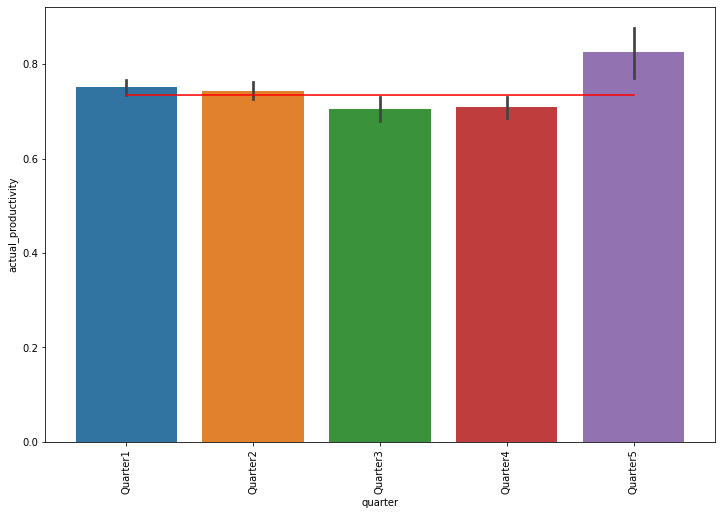

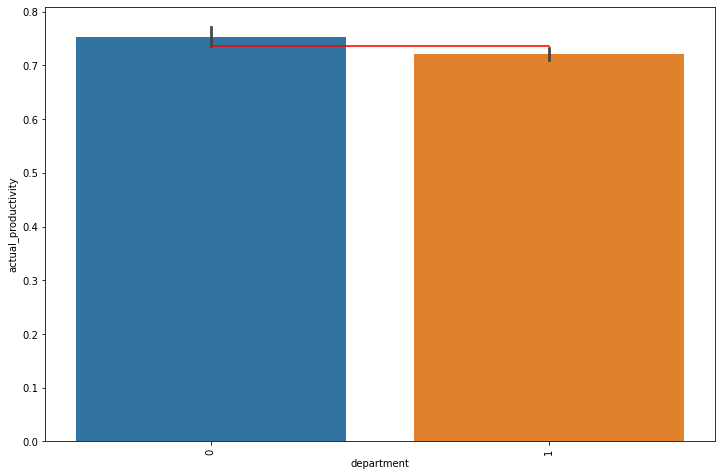

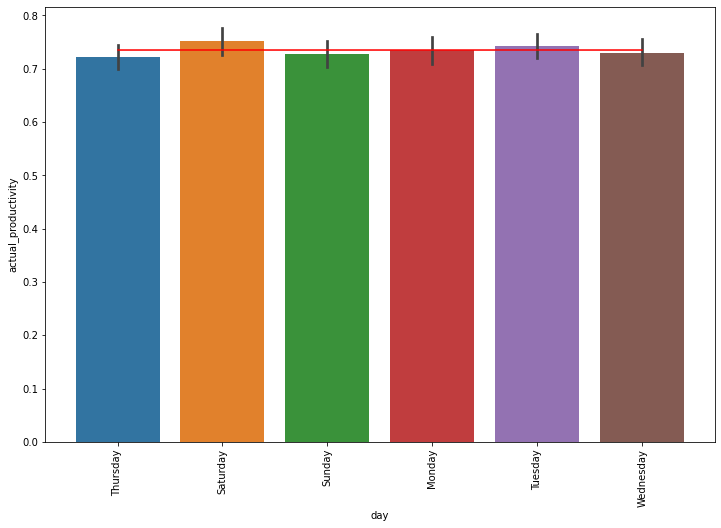

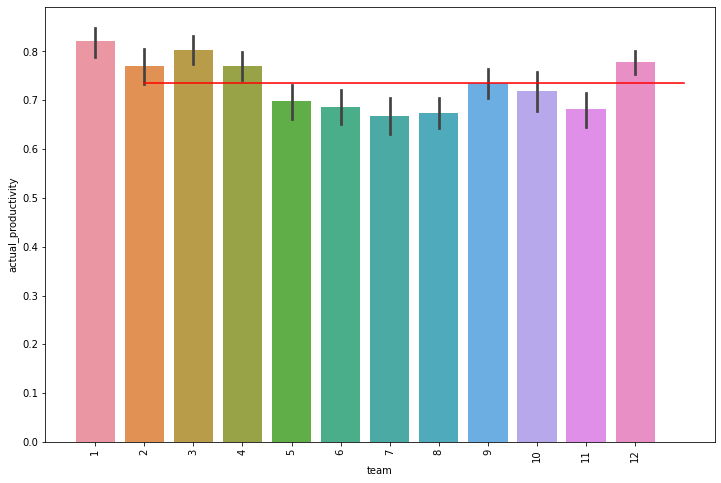

In [13]:
for col in cat_cols:
    plt.figure(figsize = (12,8))
    sns.barplot(data = d4gmt, x = col, y = 'actual_productivity')
    sns.lineplot(data = d4gmt, x = col, y = d4gmt['actual_productivity'].mean(), color = 'red')
    plt.xticks(rotation = 90)
    plt.show()

#### Observations

1. None of the categorical variables seem like good predictors of the actual_productivity. 
2. However, since the dataset does not have many features, will run the model with current features, observe the feature importances and then decide whether to drop or not.

In [14]:
# One Hot encoding for the categorical columns.

cat_cols = cat_cols.drop(['team', 'department'])

In [15]:
print(cat_cols)

Index(['quarter', 'day'], dtype='object')


In [16]:
def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt


date  department  team  targeted_productivity    smv     wip  \
0      1/1/2015           1     8                   0.80  26.16  1108.0   
1      1/1/2015           0     1                   0.75   3.94     NaN   
2      1/1/2015           1    11                   0.80  11.41   968.0   
3      1/1/2015           1    12                   0.80  11.41   968.0   
4      1/1/2015           1     6                   0.80  25.90  1170.0   
...         ...         ...   ...                    ...    ...     ...   
1192  3/11/2015           0    10                   0.75   2.90     NaN   
1193  3/11/2015           0     8                   0.70   3.90     NaN   
1194  3/11/2015           0     7                   0.65   3.90     NaN   
1195  3/11/2015           0     9                   0.75   2.90     NaN   
1196  3/11/2015           0     6                   0.70   2.90     NaN   

      over_time  incentive  idle_time  idle_men  no_of_style_change  \
0          7080         98        0.0       0.0                   0   
1           960          0        0.0       0.0                   0   
2          3660         50        0.0       0.0                   0   
3          3660         50        0.0       0.0                   0   
4          1920         50        0.0       0.0                   0   
...         ...        ...        ...       ...                 ...   
1192        960          0        0.0       0.0                   0   
1193        960          0        0.0       0.0                   0   
1194        960          0        0.0       0.0                   0   
1195       1800          0        0.0       0.0                   0   
1196        720          0        0.0       0.0                   0   

      no_of_workers  actual_productivity  Quarter2  Quarter3  Quarter4  \
0              59.0             0.940725         0         0         0   
1               8.0             0.886500         0         0         0   
2              30.5             0.800570         0         0         0   
3              30.5             0.800570         0         0         0   
4              56.0             0.800382         0         0         0   
...             ...                  ...       ...       ...       ...   
1192            8.0             0.628333         1         0         0   
1193            8.0             0.625625         1         0         0   
1194            8.0             0.625625         1         0         0   
1195           15.0             0.505889         1         0         0   
1196            7.0             0.394722         1         0         0   

      Quarter5  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0            0         0       0         1        0          0  
1            0         0       0         1        0          0  
2            0         0       0         1        0          0  
3            0         0       0         1        0          0  
4            0         0       0         1        0          0  
...        ...       ...     ...       ...      ...        ...  
1192         0         0       0         0        0          1  
1193         0         0       0         0        0          1  
1194         0         0       0         0        0          1  
1195         0         0       0         0        0          1  
1196         0         0       0         0        0          1  

[1197 rows x 22 columns]

In [17]:
# Checking for null values

d4gmt_null = pd.DataFrame(d4gmt.isnull().sum())
d4gmt_null['Pct_missing'] = d4gmt.isnull().mean()

print(d4gmt_null)

                         0  Pct_missing
date                     0     0.000000
department               0     0.000000
team                     0     0.000000
targeted_productivity    0     0.000000
smv                      0     0.000000
wip                    506     0.422723
over_time                0     0.000000
incentive                0     0.000000
idle_time                0     0.000000
idle_men                 0     0.000000
no_of_style_change       0     0.000000
no_of_workers            0     0.000000
actual_productivity      0     0.000000
Quarter2                 0     0.000000
Quarter3                 0     0.000000
Quarter4                 0     0.000000
Quarter5                 0     0.000000
Saturday                 0     0.000000
Sunday                   0     0.000000
Thursday                 0     0.000000
Tuesday                  0     0.000000
Wednesday                0     0.000000


In [18]:
# Only Work in Progress ('wip') column seems to have a significant number of missing values. Evaluating the available values.

print(d4gmt['wip'].nunique(), d4gmt['wip'].unique())
print(d4gmt['wip'].mean())

536 [1108.     nan  968.  1170.   984.   795.   733.   681.   872.   578.
  668.   861.   772.   913.  1261.   844.  1005.   659.  1152.  1138.
  610.   944.   544.  1072.   539.  1278.  1227.  1039.   878.  1033.
  782.  1216.   513.   734.  1202.   884.  1255.  1047.   678.   712.
 1037.   757.   759.  1083.   666.  1187.  1305.   716.   925.   963.
 1101.  1035.   910.  1209.   590.   808.  1179.  1324.  1135.   776.
  990.   986.   924.  1120.  1066.  1144.   413.   568.  1189.   942.
 1050.  1026.   783.   857.   548.   411.   287.   724.  1122.   970.
 1158.   660.   749.   893.   887.  1335.  1082.  1075.   966.  1095.
 1383.  1012.   896.   805.   762.  1043.   831.   562.  1208.  1099.
 1093.  1031.  1233.   941.   843.   760.   737.   381.  1141.  1004.
  581.  1073.  1156.  1211.  1126.  1063.   723.   465.   530.  1297.
  715.  1150.  1232.  1218.  1159.   972.  1092.   965.   816.   947.
  838.  1086.  1160.  1177.  1281.  1369.  1084.   391.  1102.  1076.
  917.  1044.  1

In [19]:
## Dropping the Work in Progress['WIP'] column. With 42% missing values, a high possibility of distorting the model.
## Imputing mean in 42% missing data will not work. No discernible pattern either to be able to impute using KNN either.

d4gmt = d4gmt.drop('wip', axis = 1)

print(d4gmt.head())
d4gmt.shape

       date  department  team  targeted_productivity    smv  over_time  \
0  1/1/2015           1     8                   0.80  26.16       7080   
1  1/1/2015           0     1                   0.75   3.94        960   
2  1/1/2015           1    11                   0.80  11.41       3660   
3  1/1/2015           1    12                   0.80  11.41       3660   
4  1/1/2015           1     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0       0.0                   0           59.0   
1          0        0.0       0.0                   0            8.0   
2         50        0.0       0.0                   0           30.5   
3         50        0.0       0.0                   0           30.5   
4         50        0.0       0.0                   0           56.0   

   actual_productivity  Quarter2  Quarter3  Quarter4  Quarter5  Saturday  \
0             0.940725         0         0    

(1197, 21)

In [20]:
# Print unique values for numerical columns

num_cols = d4gmt.columns[2:11]

for col in num_cols:
    print(col, d4gmt[col].nunique())


team 12
targeted_productivity 6
smv 61
over_time 134
incentive 41
idle_time 4
idle_men 4
no_of_style_change 3
no_of_workers 55


In [21]:
num_cols2 = ['idle_time', 'idle_men', 'no_of_style_change']

for col in num_cols2:
    print(col, d4gmt[col].unique())

idle_time [0.  4.  2.  3.5]
idle_men [ 0.  10.  15.  15.2]
no_of_style_change [0 1 2]


In [22]:
d4gmt_cormat = round(d4gmt.corr(),2)
d4gmt_cormat

department  team  targeted_productivity   smv  \
department                   1.00  0.03                  -0.07  0.88   
team                         0.03  1.00                   0.04 -0.11   
targeted_productivity       -0.07  0.04                   1.00 -0.08   
smv                          0.88 -0.11                  -0.08  1.00   
over_time                    0.70 -0.10                  -0.08  0.71   
incentive                    0.66 -0.06                   0.22  0.56   
idle_time                    0.10  0.02                  -0.06  0.12   
idle_men                     0.10  0.02                  -0.05  0.13   
no_of_style_change           0.30 -0.01                  -0.23  0.32   
no_of_workers                0.94 -0.08                  -0.09  0.92   
actual_productivity         -0.09 -0.15                   0.44 -0.12   
Quarter2                    -0.02 -0.01                   0.04 -0.01   
Quarter3                     0.03  0.03                  -0.06  0.03   
Quarter4                    -0.01  0.01                  -0.09 -0.00   
Quarter5                    -0.02  0.00                  -0.04 -0.02   
Saturday                    -0.02 -0.01                   0.01 -0.02   
Sunday                      -0.01  0.00                   0.02  0.00   
Thursday                     0.01 -0.01                  -0.03  0.01   
Tuesday                      0.01  0.00                  -0.01  0.01   
Wednesday                   -0.00 -0.00                   0.00 -0.00   

                       over_time  incentive  idle_time  idle_men  \
department                  0.70       0.66       0.10      0.10   
team                       -0.10      -0.06       0.02      0.02   
targeted_productivity      -0.08       0.22      -0.06     -0.05   
smv                         0.71       0.56       0.12      0.13   
over_time                   1.00       0.49      -0.02     -0.02   
incentive                   0.49       1.00      -0.06     -0.06   
idle_time                  -0.02      -0.06       1.00      0.99   
idle_men                   -0.02      -0.06       0.99      1.00   
no_of_style_change          0.07      -0.01       0.13      0.14   
no_of_workers               0.76       0.64       0.12      0.12   
actual_productivity        -0.05       0.30      -0.18     -0.18   
Quarter2                   -0.05       0.04      -0.08     -0.08   
Quarter3                    0.05      -0.05       0.08      0.08   
Quarter4                    0.04      -0.03      -0.03     -0.03   
Quarter5                   -0.05       0.04      -0.02     -0.02   
Saturday                    0.02       0.00      -0.01     -0.01   
Sunday                      0.01      -0.04       0.03      0.03   
Thursday                    0.07      -0.01       0.00      0.00   
Tuesday                    -0.01       0.00       0.00      0.00   
Wednesday                  -0.05      -0.02       0.02      0.01   

                       no_of_style_change  no_of_workers  actual_productivity  \
department                           0.30           0.94                -0.09   
team                                -0.01          -0.08                -0.15   
targeted_productivity               -0.23          -0.09                 0.44   
smv                                  0.32           0.92                -0.12   
over_time                            0.07           0.76                -0.05   
incentive                           -0.01           0.64                 0.30   
idle_time                            0.13           0.12                -0.18   
idle_men                             0.14           0.12                -0.18   
no_of_style_change                   1.00           0.33                -0.21   
no_of_workers                        0.33           1.00                -0.06   
actual_productivity                 -0.21          -0.06                 1.00   
Quarter2                            -0.01          -0.02                 0.03   
Quarter3                    

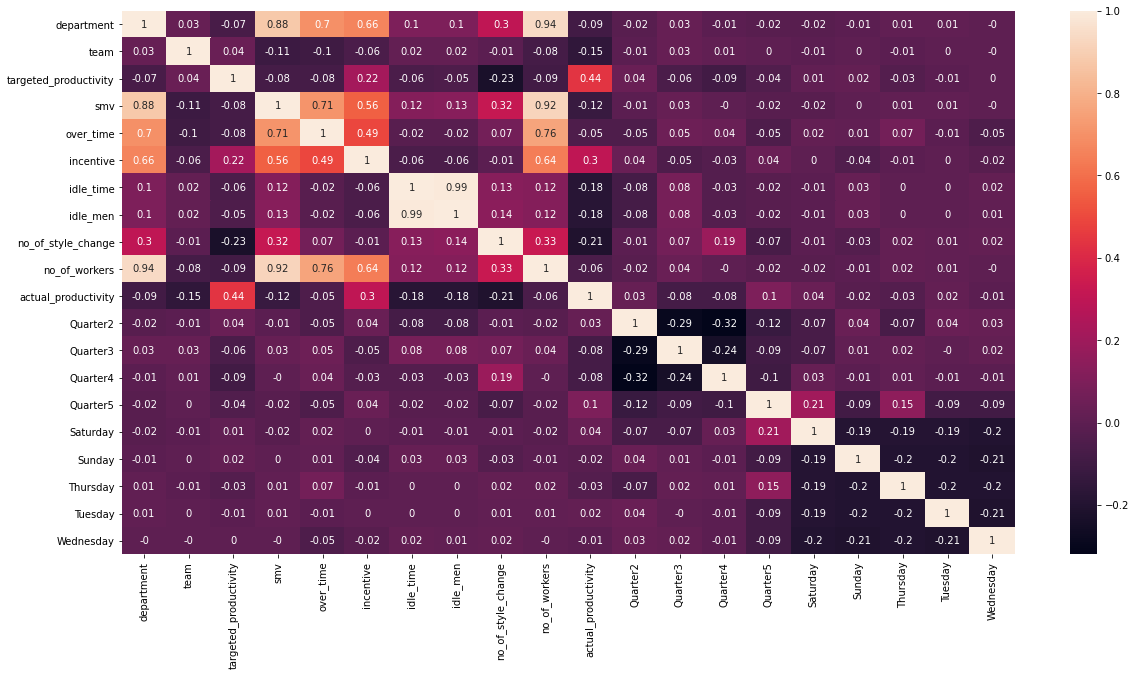

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(data = d4gmt_cormat, annot=True)
plt.show()

#### Observations

1. Standard Minute Value, Department(finishing, sewing) and No. of workers seem to be showing a high corelation between them. Overtime is showing a fairly high(0.67 to 0.73 coefficient) with these columns. However, SMV, Department and No. of workers do not seem to have a high corelation with the target value i.e., actual_productivity. This is worth exploring with the business. How are Standard Minute Values calculated?

- Is it that sewing requires more workers and more time that is why the corelation to SMV is high? If so, is this number optimized since optimizing this would give a better corelation to actual productivity. Inversely, finishing requires less time?
- Another interpretation could be that the SVM, no of workers and department wise allocation can be improved to better reflect productivity. Else, why would overtime also have relatively high corelation with the rest of these columns?

2. Targeted Productivity and Actual Productivity had very similar means - 0.73 to 0.735. Expected a better corelation coefficient between the two. 

For now, leaving all the columns in the dataset. Will re-evaluate upon seeing the feature importances from the model. 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = d4gmt[['smv', 'department', 'no_of_workers', 'over_time']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

         feature        VIF
0            smv  20.430355
1     department  17.236824
2  no_of_workers  39.205983
3      over_time   6.805766


##### Even VIF seems to be indicating dropping columns between smv, department and no_of_workers. However, since this should not influence the results of the model too much (only the interpretability), decided to run the model once and figure out the feature importances then decide which of the columns to drop if any. 

In [25]:
d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

#d4gmt.head()

# d4gmt['date'].nunique()
# #d4gmt['date'].unique()

#### Visualising the Data

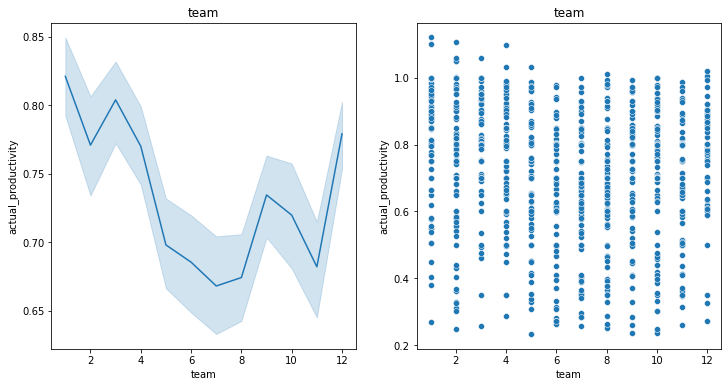

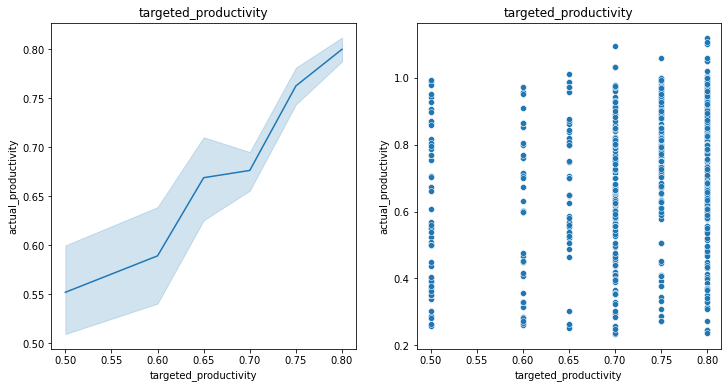

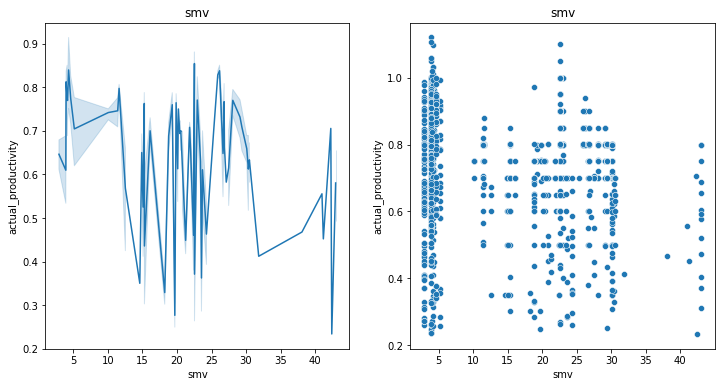

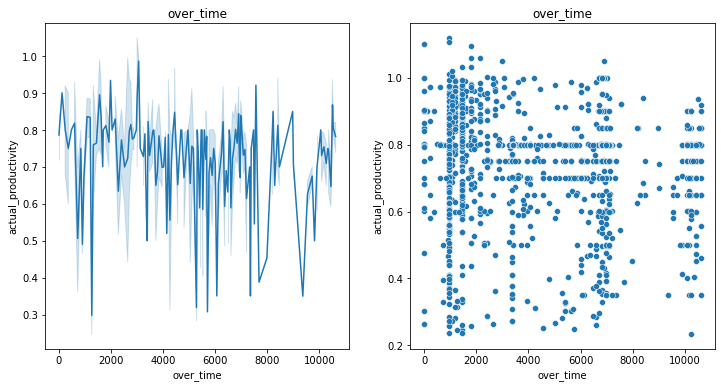

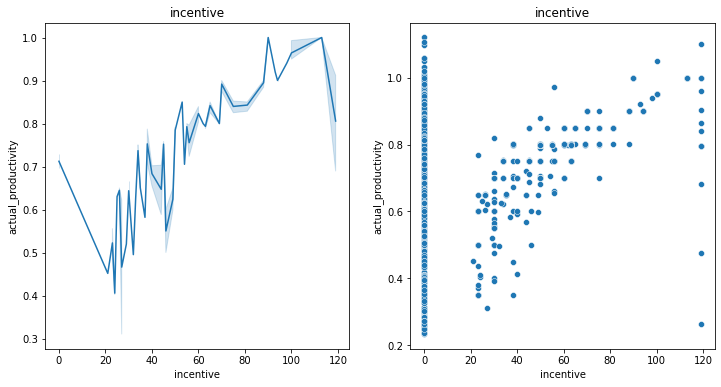

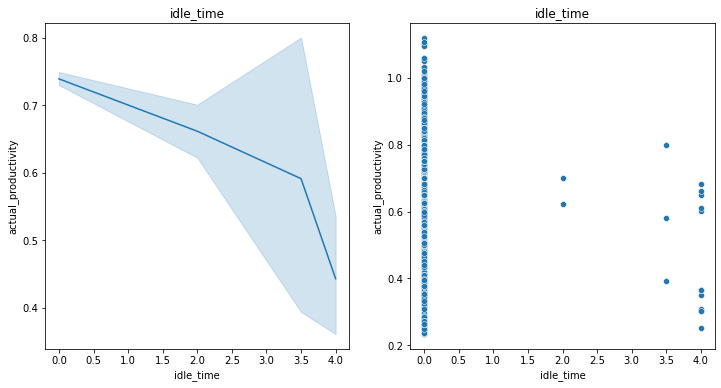

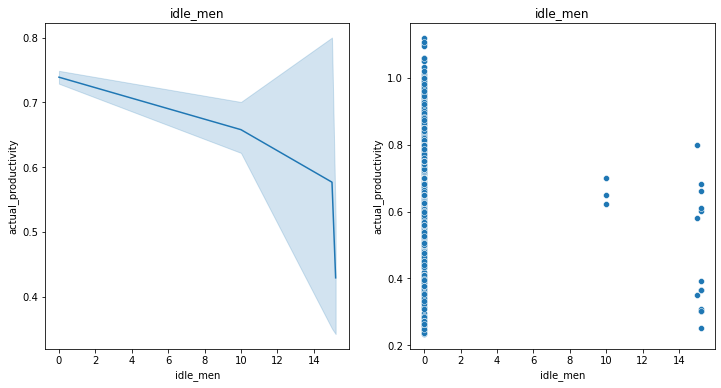

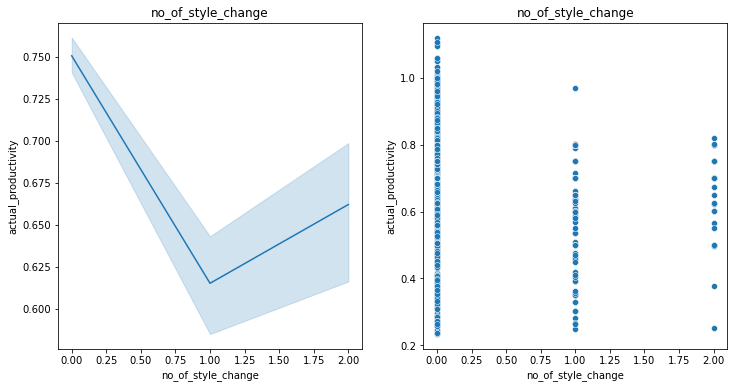

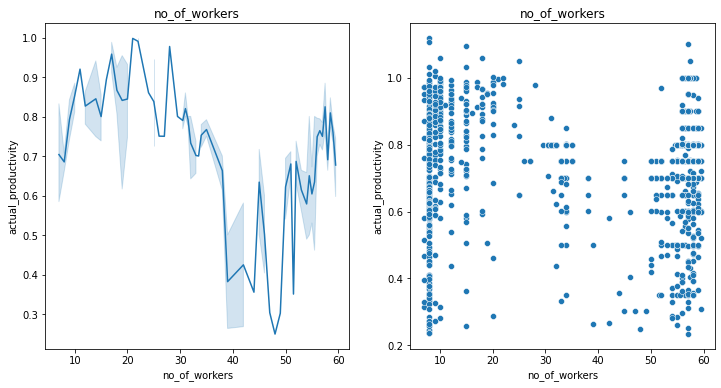

In [26]:
for cols in num_cols:
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.lineplot(data = d4gmt, x = cols, y = 'actual_productivity')
    plt.title(cols)
    plt.subplot(1,2,2)
    sns.scatterplot(data = d4gmt, x = cols, y = 'actual_productivity')
    plt.title(cols)
    plt.show()

#### Observations

1. Teams 5,6,7,8 and 11 are not very productive and may need a reshuffle. Also, as seen by the no_of_workers graph - keeping the teams below 30 seems to have the highest productivity. 
2. Targeted productivity, smv and overtime do not seem to give much insight. 
3. Incenctive - shows a clear trend. Incentive between 60 and 100 shows the highest productivity. Above 100 also productivity sharply declines to almost average productivity and it may not be worth increasing incentives beyond 100. 
4. As expected, idle_time and idle_men decreases productivity. 
5. Strangely, 1 style change produces the maximum decline in productivity. 2 Style changes results in declined productivity BUT the productivity drop is less than productivity drop from 1 style change which is counter-intuitive. This could be a fluke or due to insufficient data. Further analysis required along with data for 3 or more style changes.


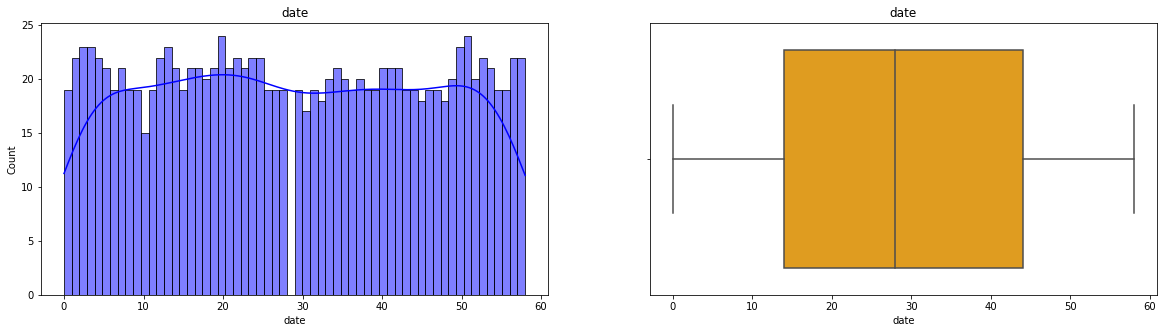

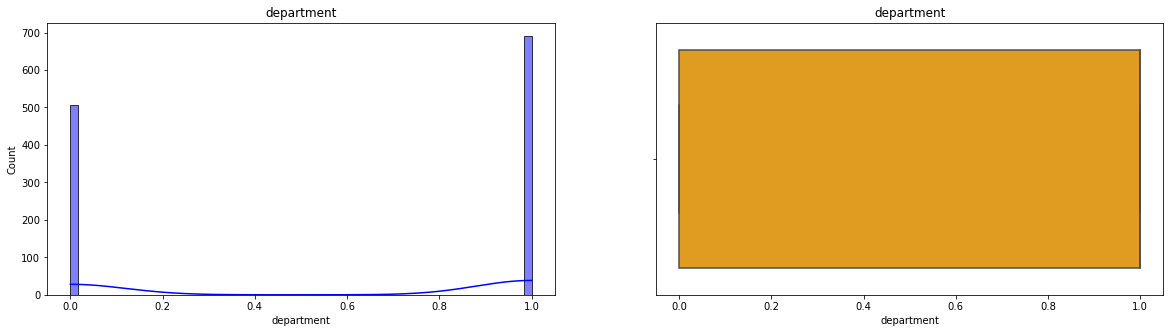

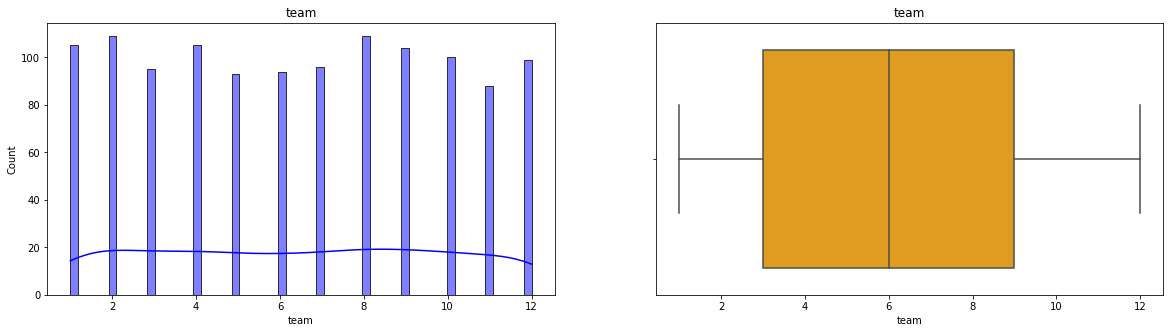

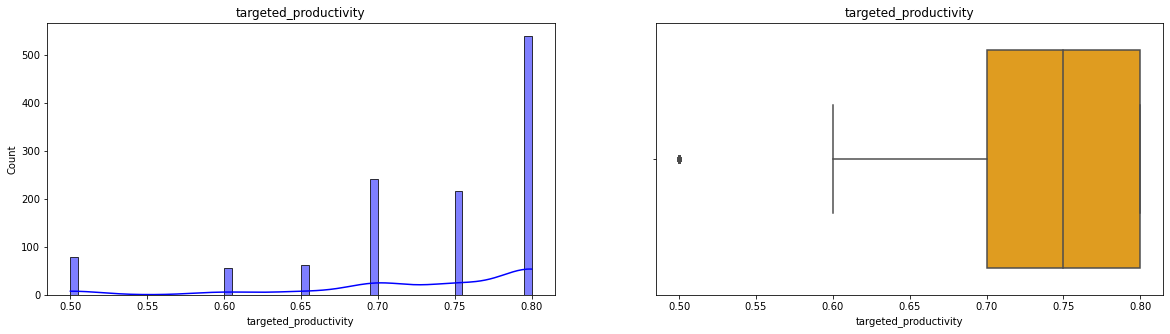

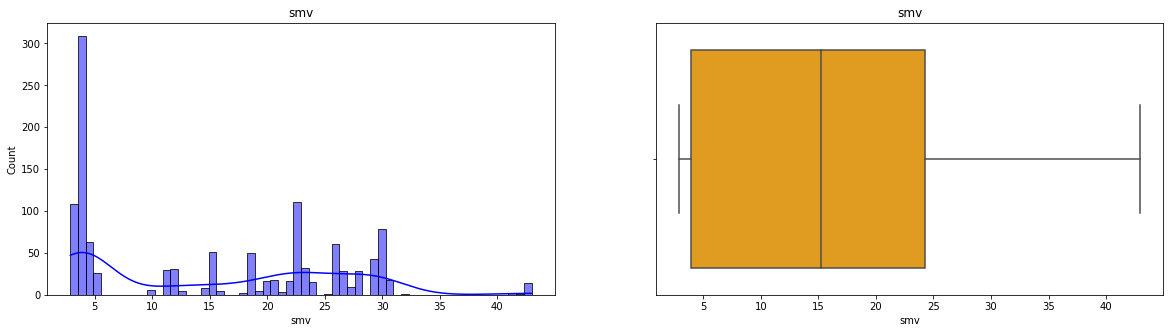

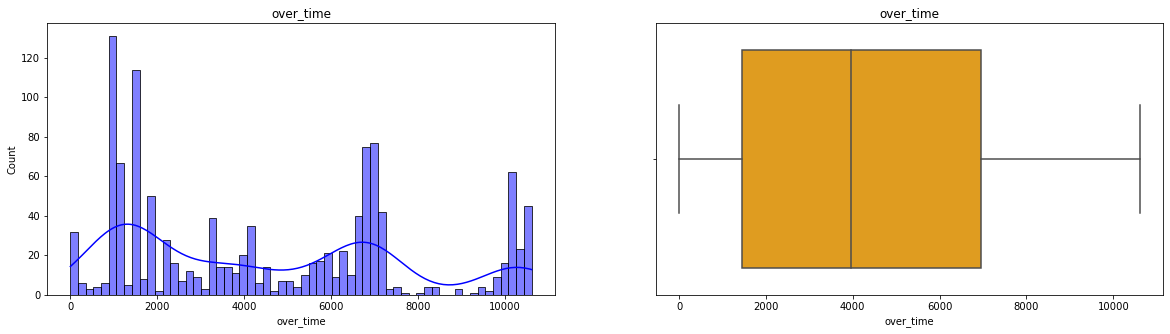

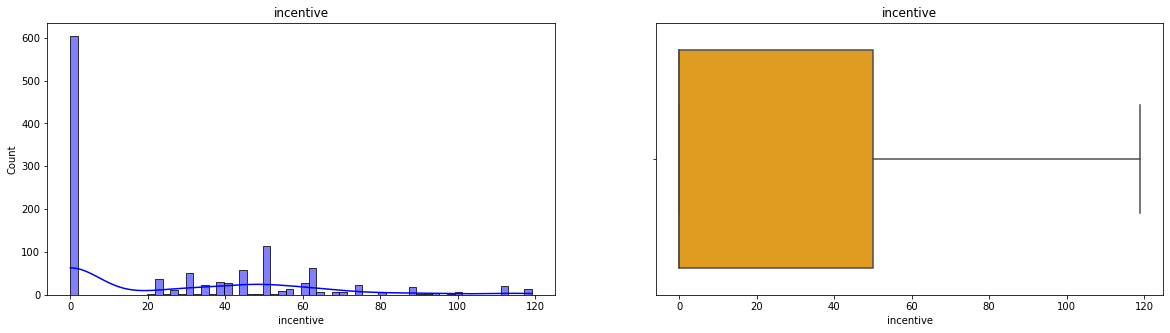

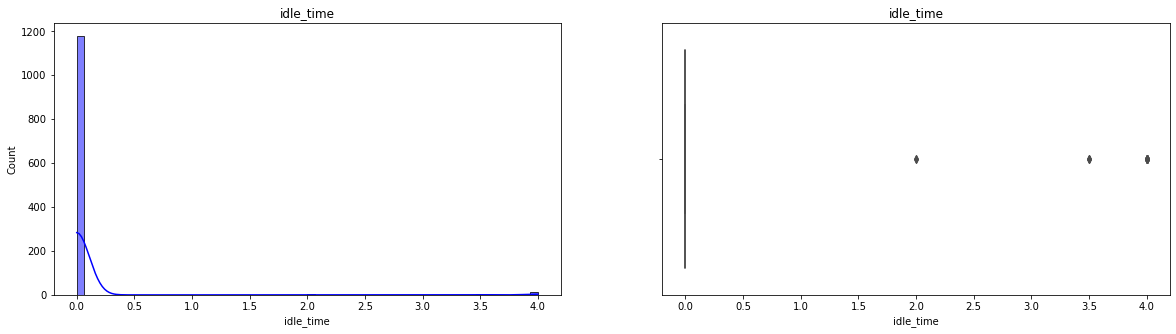

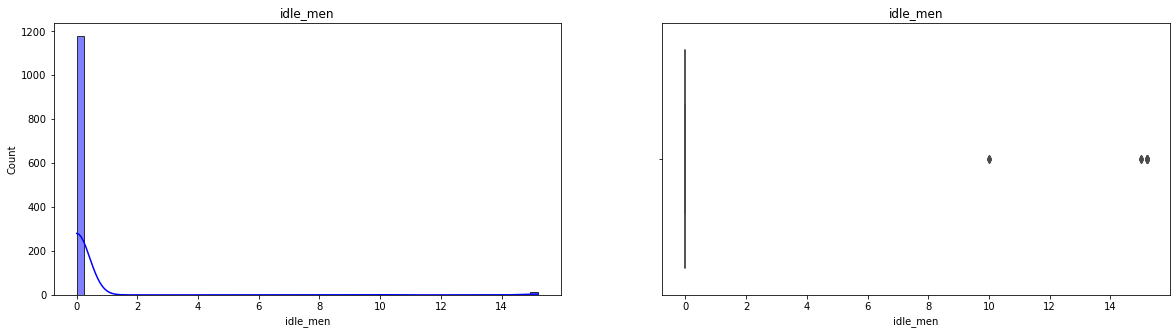

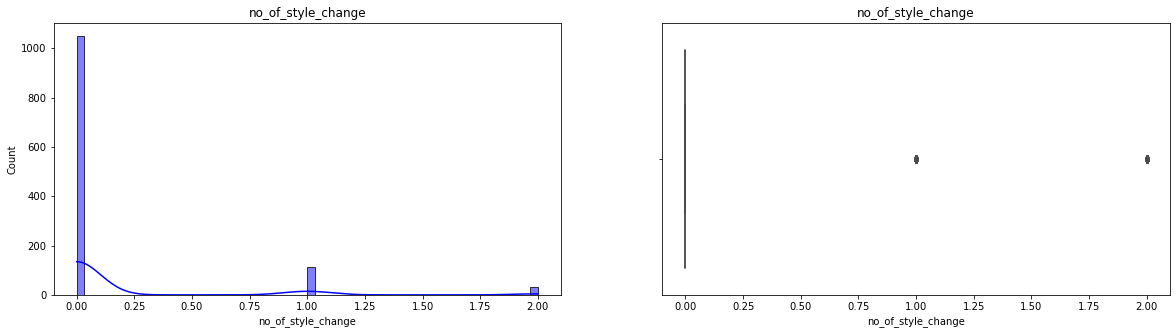

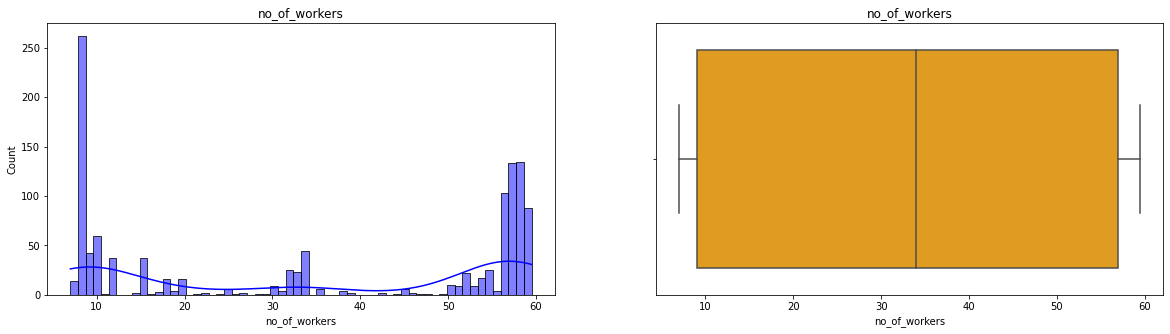

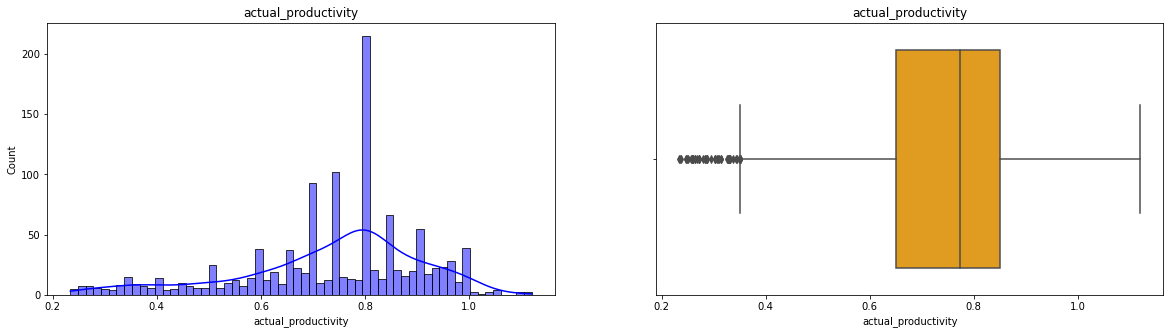

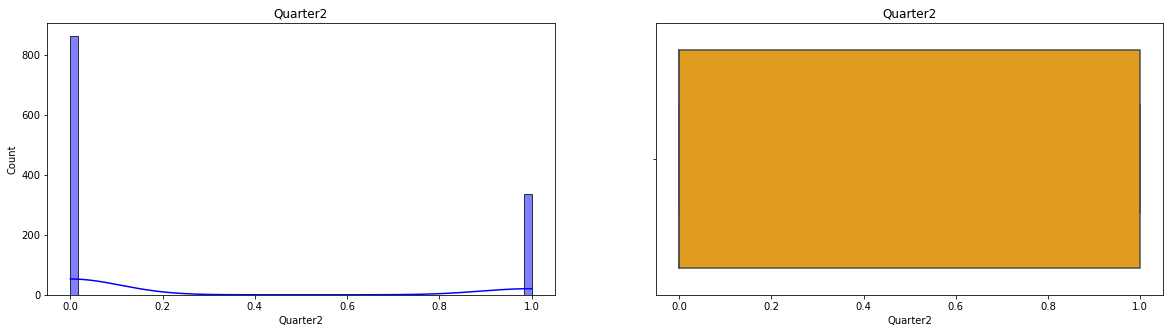

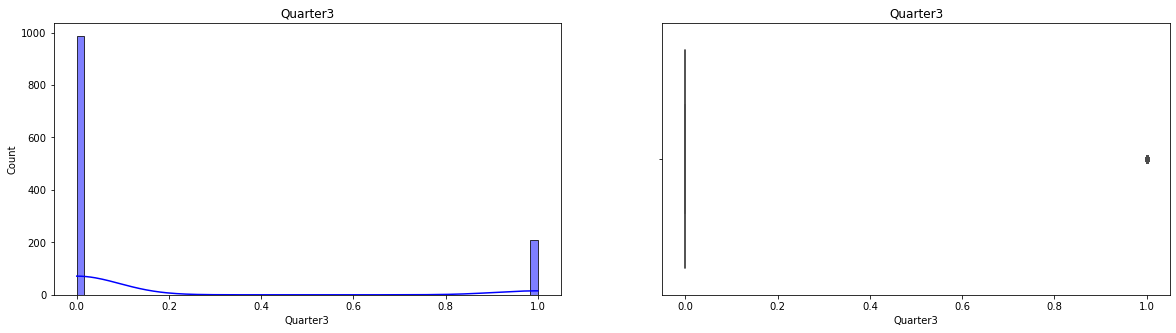

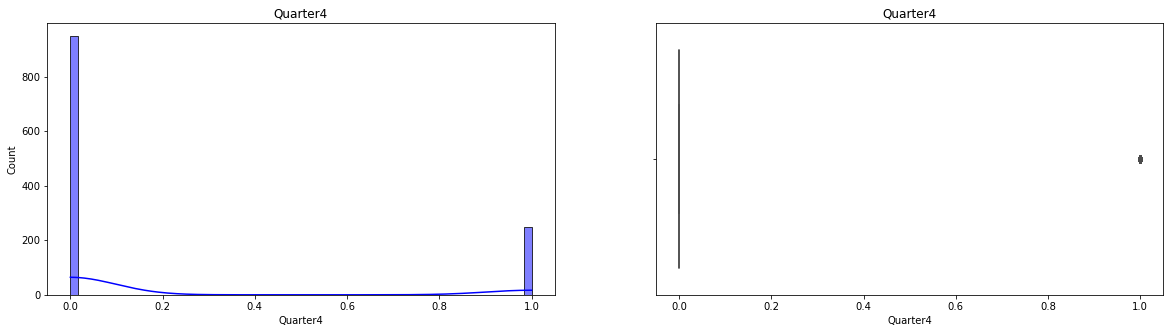

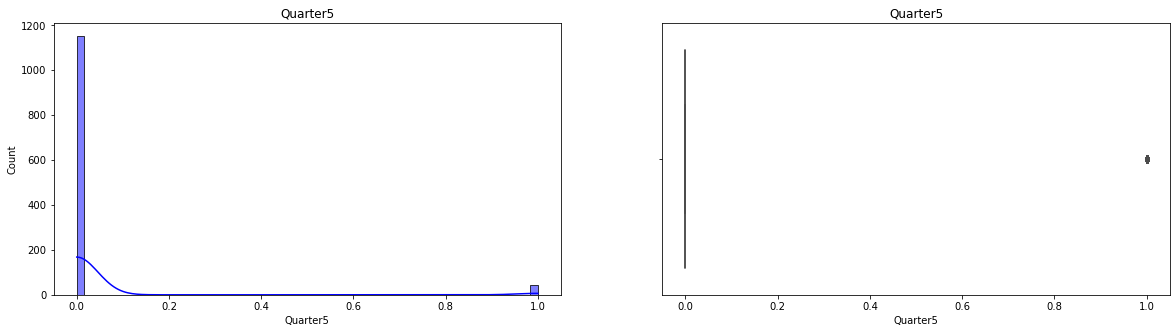

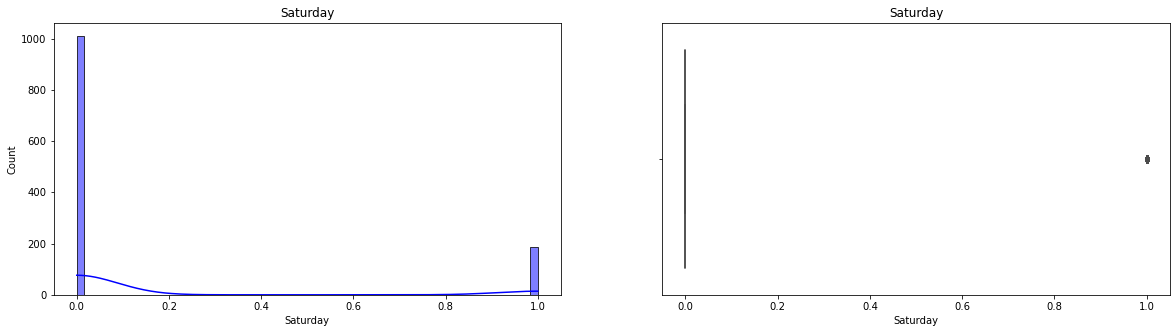

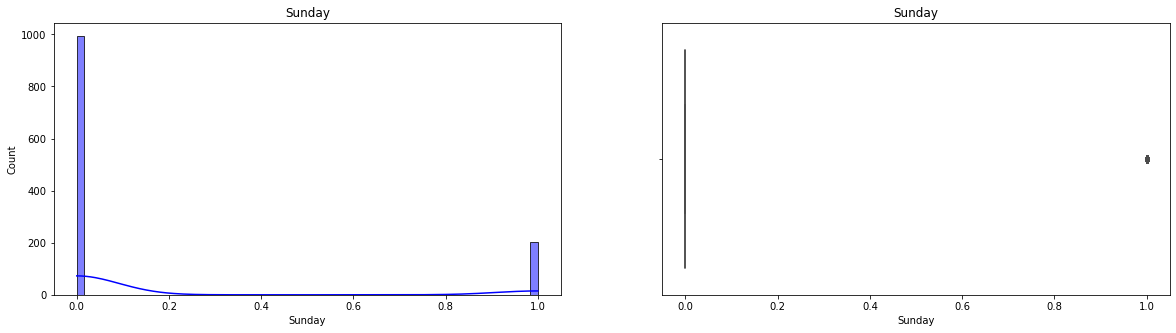

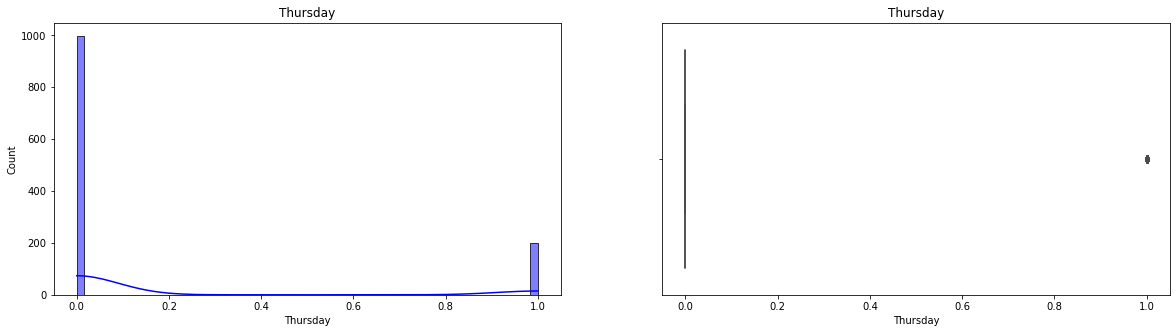

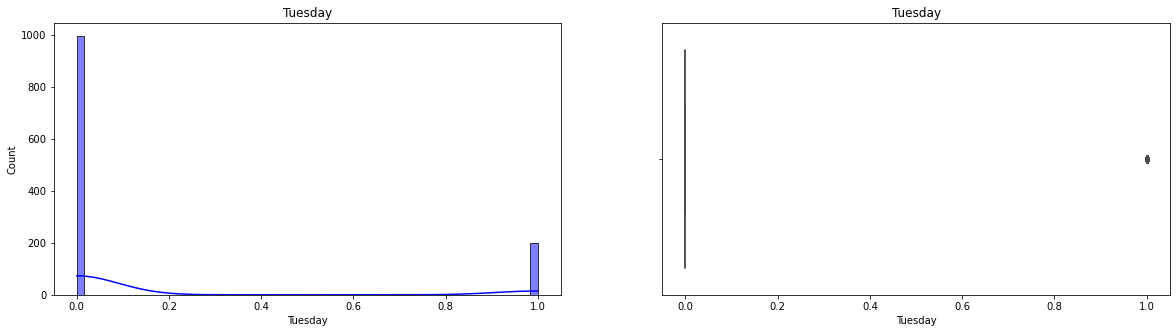

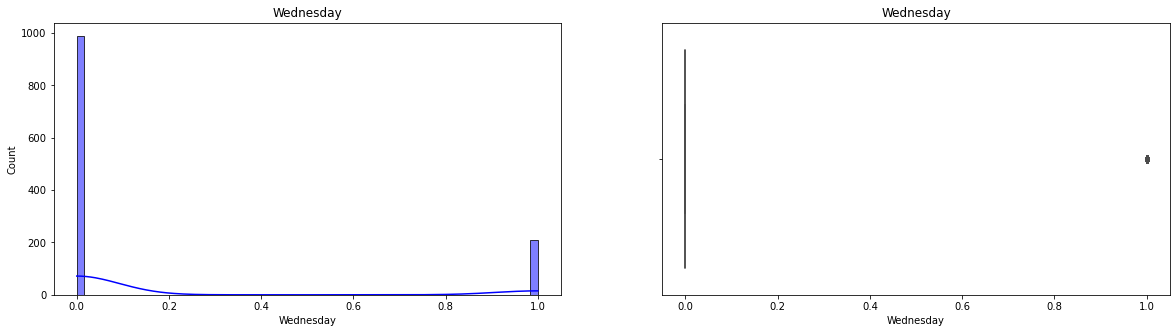

In [27]:
for col in d4gmt.columns:
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    sns.histplot(data = d4gmt, x = col, bins = 60, color = 'blue', kde=True)
    plt.title(col)
    plt.subplot(1,2,2)
    sns.boxplot(data = d4gmt, x = col, color = 'orange')
    plt.title(col)
    plt.show()

#### Observations

- Most of the features are abnormally distributed making it challenging to be able to build any relaiable models.
- Outlier removal - more than a certain point does not seem to be an option since all the features seem to be multi-modal.
- Models based on linear regression(linear, poly, lasso, ridge etc.) are not likely to be successful
- A better chance of success is likely to be found through tree based models. 
- Build different kinds of models (including models based on linear regression) and compare

### Building the models

#### Split Dependent and Independent Variables

In [28]:
Y = d4gmt['actual_productivity']
X = d4gmt
X.drop('actual_productivity', axis = 1, inplace = True)

In [29]:
print(X.shape)
print(Y.shape)

(1197, 20)
(1197,)


#### Standardizing the features

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = preprocessing.RobustScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = X.columns)
print(X_Scaled.head())

       date  department      team  targeted_productivity       smv  over_time  \
0 -0.933333         0.0  0.333333                    0.5  0.536417   0.565217   
1 -0.933333        -1.0 -0.833333                    0.0 -0.557087  -0.543478   
2 -0.933333         0.0  0.833333                    0.5 -0.189469  -0.054348   
3 -0.933333         0.0  1.000000                    0.5 -0.189469  -0.054348   
4 -0.933333         0.0  0.000000                    0.5  0.523622  -0.369565   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0       1.96        0.0       0.0                 0.0       0.520833   
1       0.00        0.0       0.0                 0.0      -0.541667   
2       1.00        0.0       0.0                 0.0      -0.072917   
3       1.00        0.0       0.0                 0.0      -0.072917   
4       1.00        0.0       0.0                 0.0       0.458333   

   Quarter2  Quarter3  Quarter4  Quarter5  Saturday  Sunday  Thursday  \
0      

#### Train Test Split

In [31]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, Y, test_size = 0.25, random_state = 20)

In [32]:
print(f'X_Train size is : {X_Train.shape}.')
print(f'X_Test size is : {X_Test.shape}.')
print(f'Y_Train size is : {Y_Train.shape} and average productivity is : {Y_Train.mean()}.')
print(f'Y_Test size is : {Y_Test.shape} and average productivity is : {Y_Test.mean()}.')

X_Train size is : (897, 20).
X_Test size is : (300, 20).
Y_Train size is : (897,) and average productivity is : 0.7352512746633224.
Y_Test size is : (300,) and average productivity is : 0.7346121657033333.


#### Linear Regression Model

In [33]:
from sklearn.metrics import r2_score
lm_d4gmt = LinearRegression(n_jobs = -1)
lm_d4gmt.fit(X_Train, Y_Train)
print(lm_d4gmt.score(X_Test, Y_Test))
lm_train_R2 = lm_d4gmt.score(X_Train, Y_Train) 
Y_Pred_lm = lm_d4gmt.predict(X_Test)
lm_R2 = r2_score(Y_Test, Y_Pred_lm)
print(lm_R2)
print(lm_train_R2)

0.37625563757609204
0.37625563757609204
0.366638215751217


In [34]:
d4gmt_coef = pd.DataFrame()
d4gmt_coef["Columns"] = X_Train.columns
d4gmt_coef['LM Coefficient Estimate'] = pd.Series(lm_d4gmt.coef_)
print(d4gmt_coef)

                  Columns  LM Coefficient Estimate
0                    date                -0.015260
1              department                -0.117628
2                    team                -0.044470
3   targeted_productivity                 0.066408
4                     smv                -0.091332
5               over_time                -0.016003
6               incentive                 0.115224
7               idle_time                 0.051462
8                idle_men                -0.025243
9      no_of_style_change                 0.006114
10          no_of_workers                 0.125396
11               Quarter2                -0.009655
12               Quarter3                -0.014047
13               Quarter4                -0.016826
14               Quarter5                 0.049842
15               Saturday                 0.012394
16                 Sunday                 0.003463
17               Thursday                -0.004569
18                Tuesday      

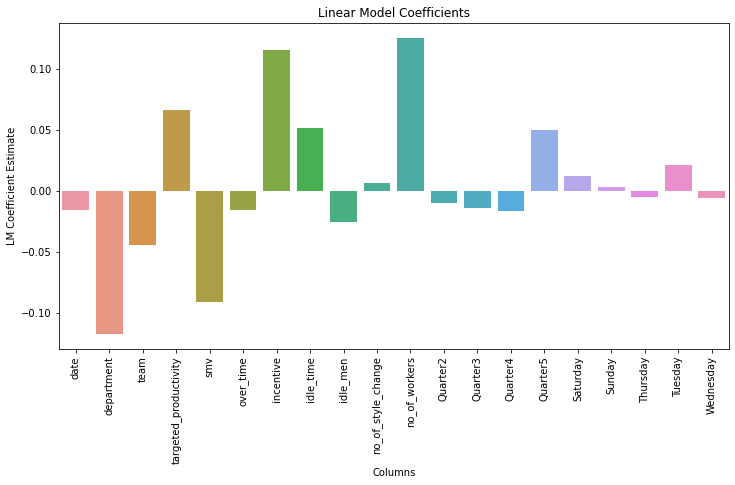

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(data = d4gmt_coef, x = 'Columns', y = 'LM Coefficient Estimate')
plt.title('Linear Model Coefficients')
plt.xticks(rotation = 90)
plt.show()

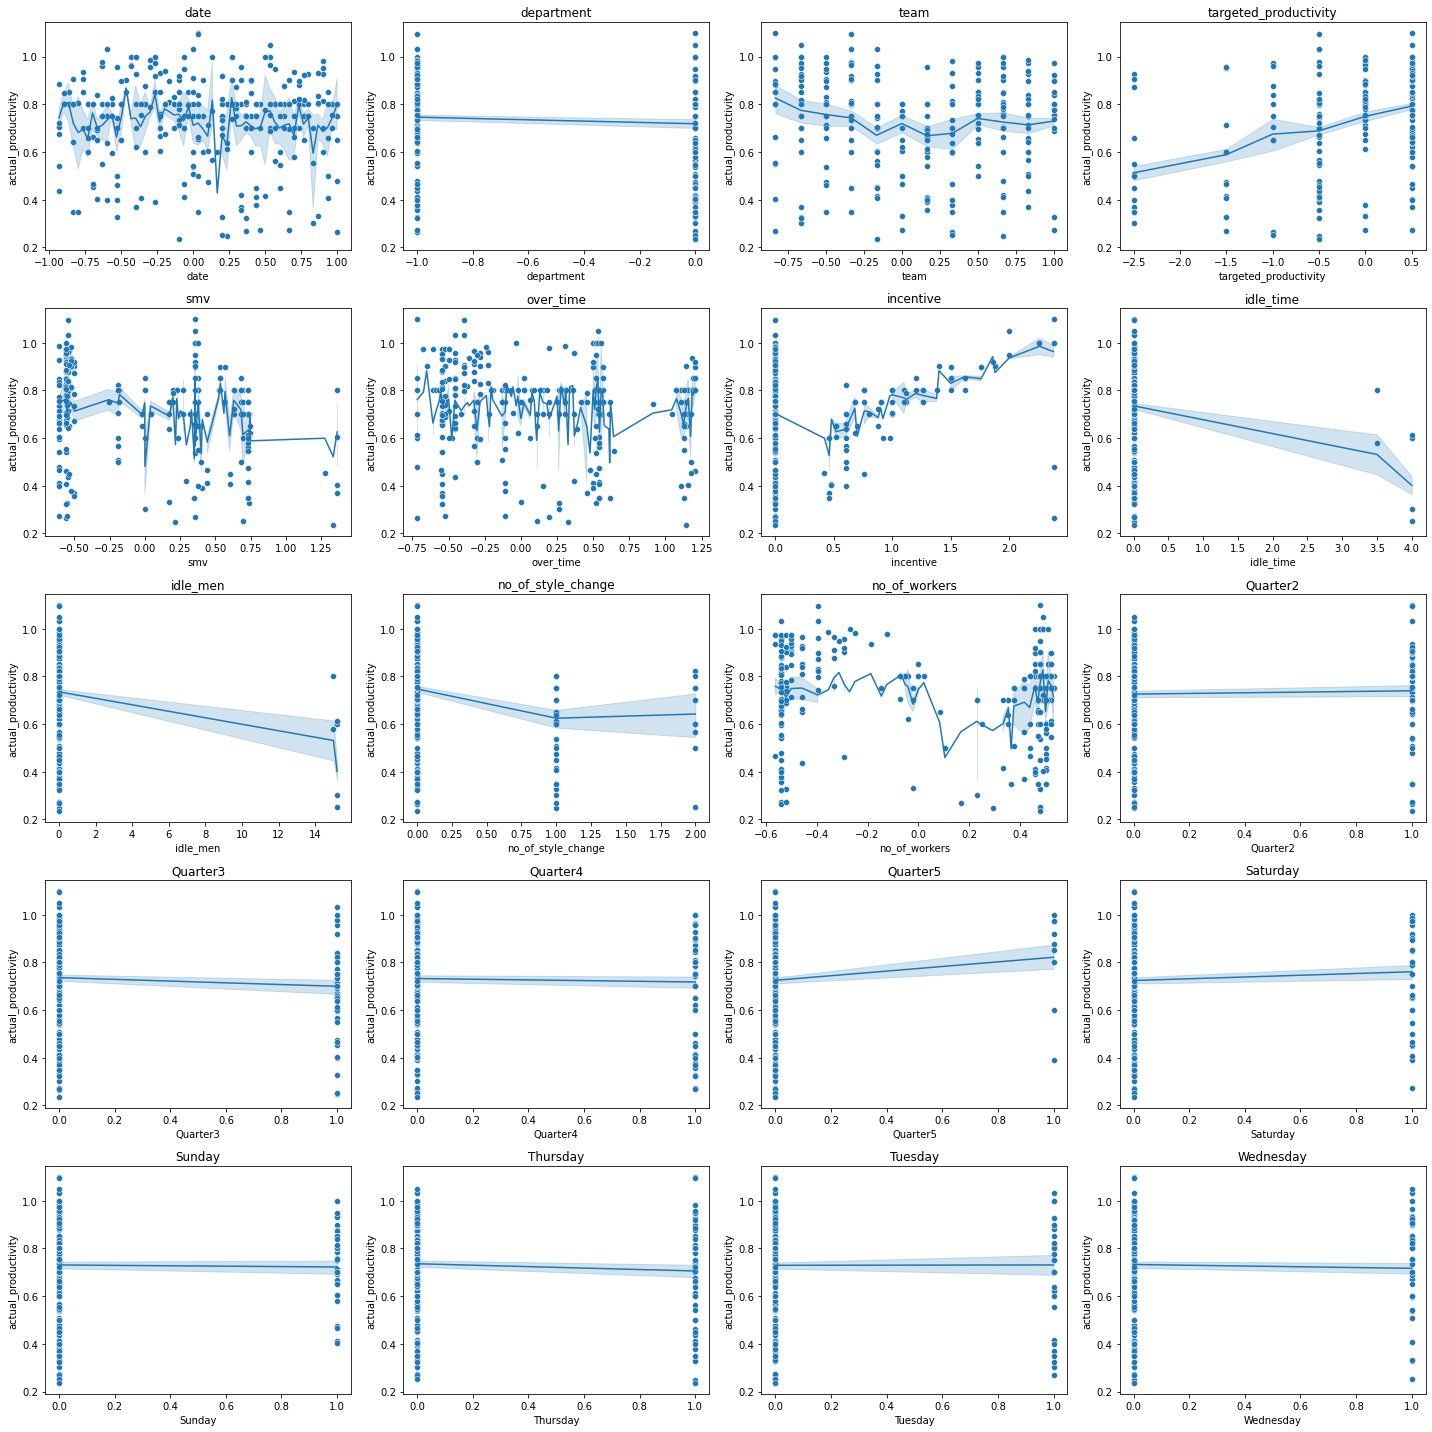

In [36]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_lm)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### Polynomial Regression Model

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# define the pipeline and train model
pm_d4gmt = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
pm_d4gmt.fit(X_Train, Y_Train)

# print(pm_d4gmt.score(X_Poly_Test, Y_Test))
pm2_train_R2 = pm_d4gmt.score(X_Train, Y_Train)
Y_Pred_pm2 = pm_d4gmt.predict(X_Test)
pm2_R2 = r2_score(Y_Test, Y_Pred_pm2)
print(pm2_R2)
print(pm2_train_R2)

-0.09888549780763034
0.5484809706372651


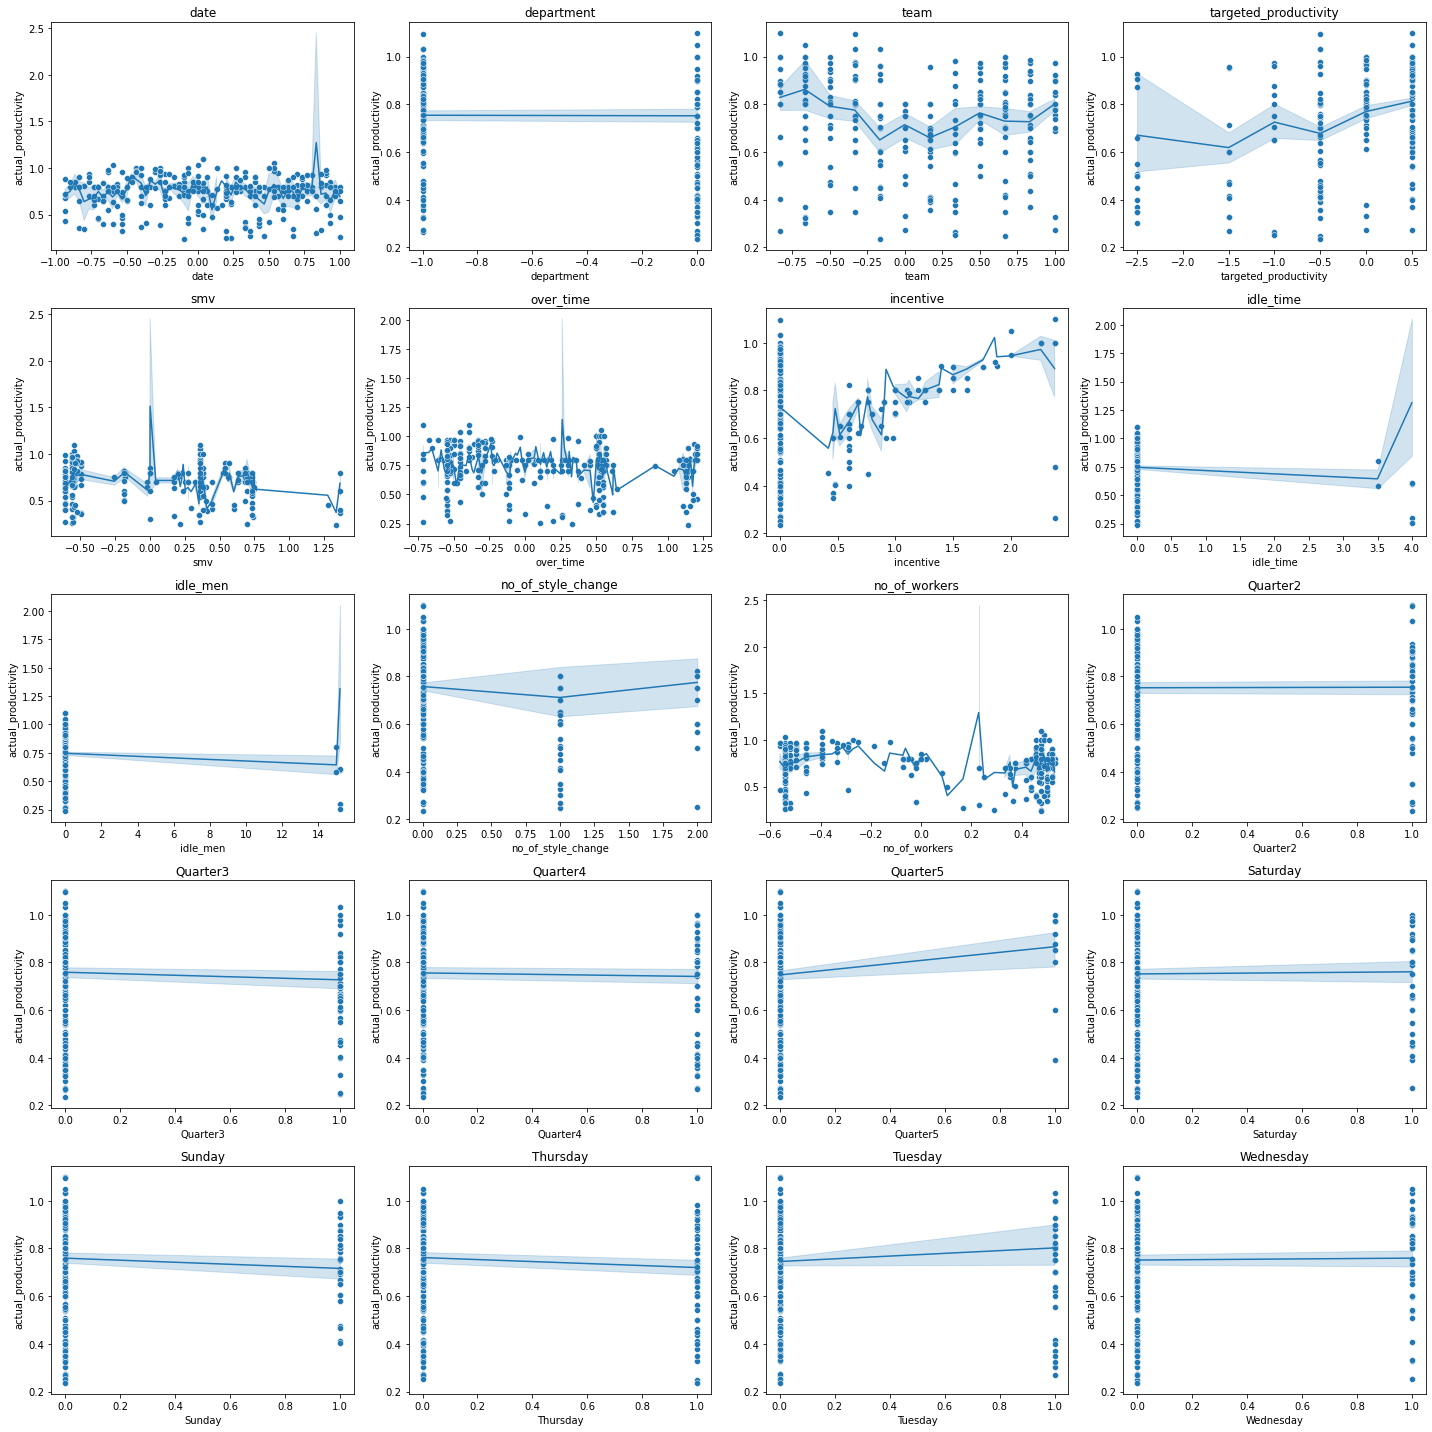

In [38]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_pm2)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

In [39]:
# With PolynomialFeatures of Degree 3 instead of 2

pm_d4gmt = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
pm_d4gmt.fit(X_Train, Y_Train)

# print(pm_d4gmt.score(X_Poly_Test, Y_Test))
Y_Pred_pm3 = pm_d4gmt.predict(X_Test)
pm3_R2 = r2_score(Y_Test, Y_Pred_pm2)
pm3_train_R2 = pm_d4gmt.score(X_Train, Y_Train)
print(pm3_R2)
print(pm3_train_R2)

-0.09888549780763034
0.9142833719333099


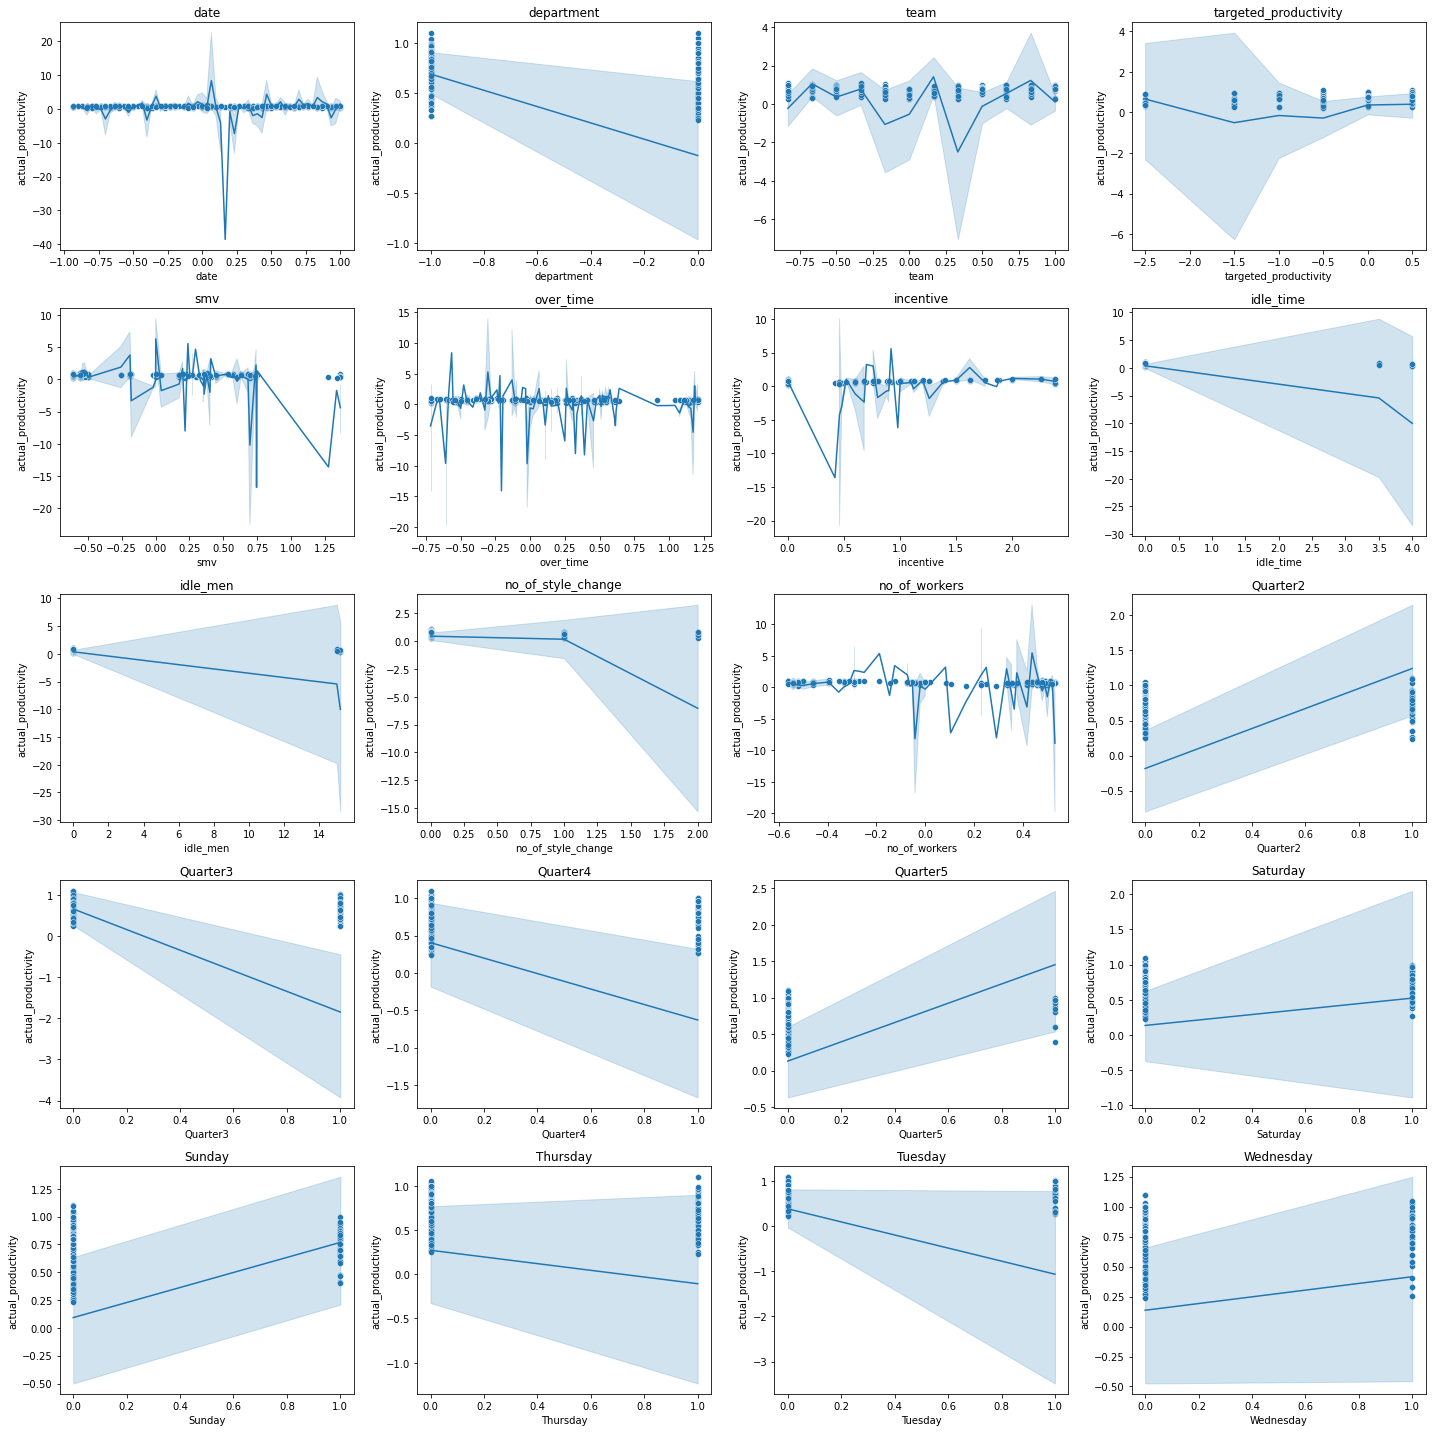

In [40]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_pm3)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### Ridge Regression Model

In [41]:
rm_d4gmt = Ridge(alpha = 0.1)
rm_d4gmt.fit(X_Train, Y_Train)

print(rm_d4gmt.score(X_Test, Y_Test))

Y_Pred_rm = rm_d4gmt.predict(X_Test)
rm_R2 = r2_score(Y_Test, Y_Pred_rm)
rm_train_R2 = rm_d4gmt.score(X_Train, Y_Train)
print(rm_R2)
print(rm_train_R2)

0.37600604045805597
0.37600604045805597
0.36663623396230993


In [42]:
d4gmt_coef['RM Coefficient Estimate'] = pd.Series(rm_d4gmt.coef_)
print(d4gmt_coef)

                  Columns  LM Coefficient Estimate  RM Coefficient Estimate
0                    date                -0.015260                -0.015241
1              department                -0.117628                -0.116559
2                    team                -0.044470                -0.044550
3   targeted_productivity                 0.066408                 0.066392
4                     smv                -0.091332                -0.090789
5               over_time                -0.016003                -0.015876
6               incentive                 0.115224                 0.115159
7               idle_time                 0.051462                 0.049465
8                idle_men                -0.025243                -0.024717
9      no_of_style_change                 0.006114                 0.006077
10          no_of_workers                 0.125396                 0.123603
11               Quarter2                -0.009655                -0.009662
12          

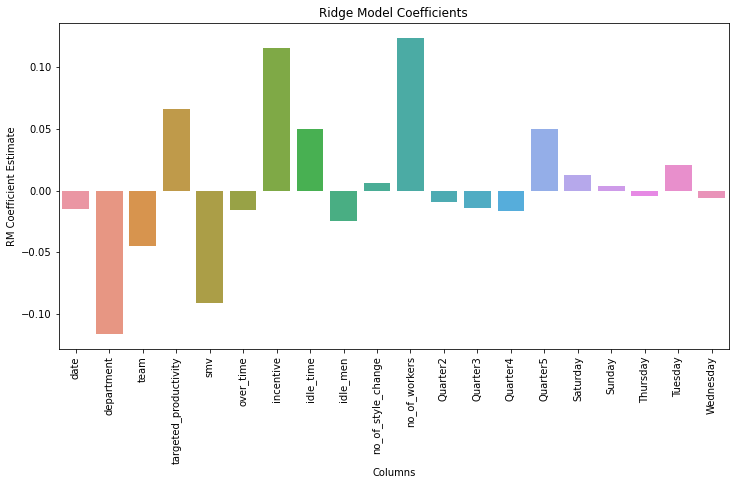

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(data = d4gmt_coef, x = 'Columns', y = 'RM Coefficient Estimate')
plt.title('Ridge Model Coefficients')
plt.xticks(rotation = 90)
plt.show()

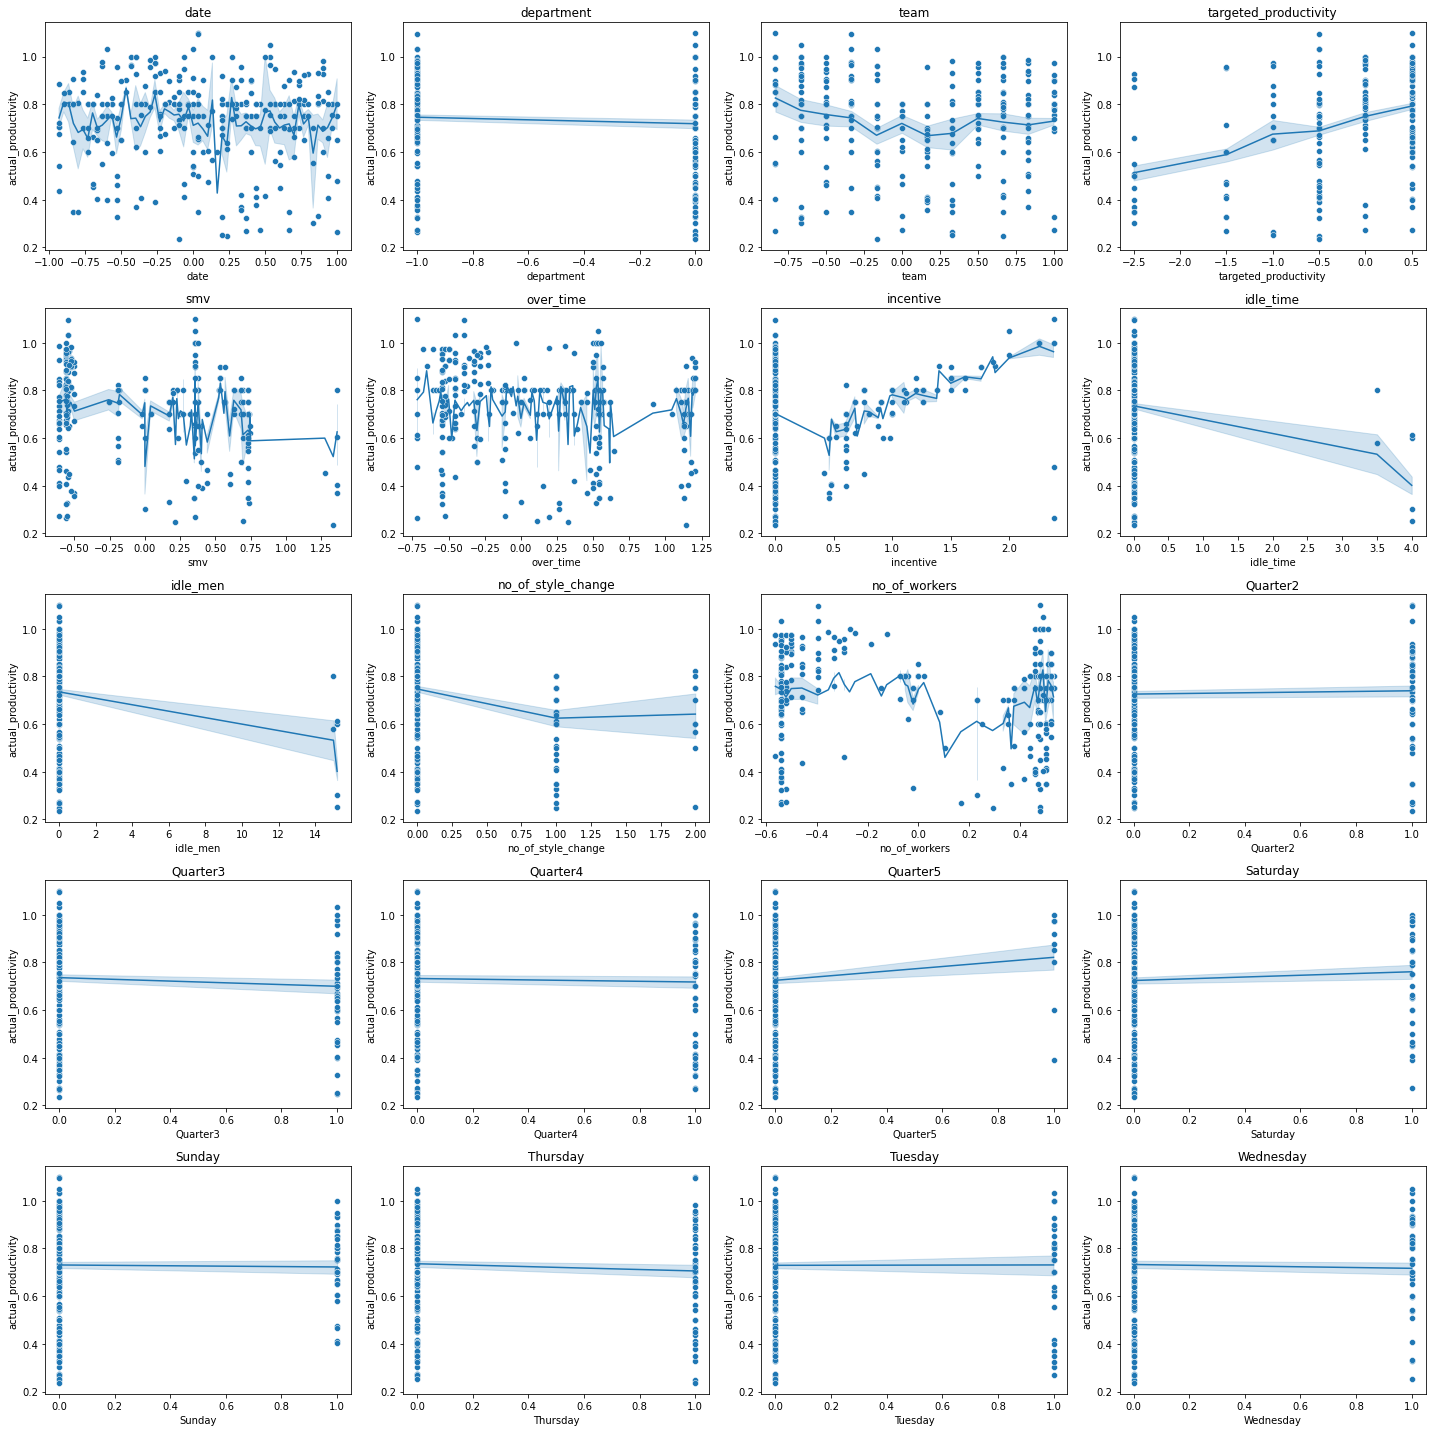

In [44]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_rm)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### Lasso Regression Model

In [45]:
lasso_d4gmt = Lasso(alpha = 0.0001, max_iter = 10000)
lasso_d4gmt.fit(X_Train, Y_Train)

print(lasso_d4gmt.score(X_Test, Y_Test))

Y_Pred_lasso = lasso_d4gmt.predict(X_Test)
lasso_R2 = r2_score(Y_Test, Y_Pred_lasso)
lasso_train_R2 = lasso_d4gmt.score(X_Train, Y_Train)
print(lasso_R2)
print(lasso_train_R2)

0.37451870082426
0.37451870082426
0.366311838530623


In [46]:
print(lasso_d4gmt.coef_)
d4gmt_coef['Lasso Coefficient Estimate'] = pd.Series(lasso_d4gmt.coef_)
print(d4gmt_coef)

[-0.01407861 -0.10948214 -0.0449506   0.06621899 -0.08672266 -0.01460142
  0.11428335  0.01000234 -0.0143514   0.00375037  0.11181288 -0.00820727
 -0.01246307 -0.01498447  0.04750883  0.01173736  0.00197743 -0.00391142
  0.01983749 -0.00564622]
                  Columns  LM Coefficient Estimate  RM Coefficient Estimate  \
0                    date                -0.015260                -0.015241   
1              department                -0.117628                -0.116559   
2                    team                -0.044470                -0.044550   
3   targeted_productivity                 0.066408                 0.066392   
4                     smv                -0.091332                -0.090789   
5               over_time                -0.016003                -0.015876   
6               incentive                 0.115224                 0.115159   
7               idle_time                 0.051462                 0.049465   
8                idle_men                -0.

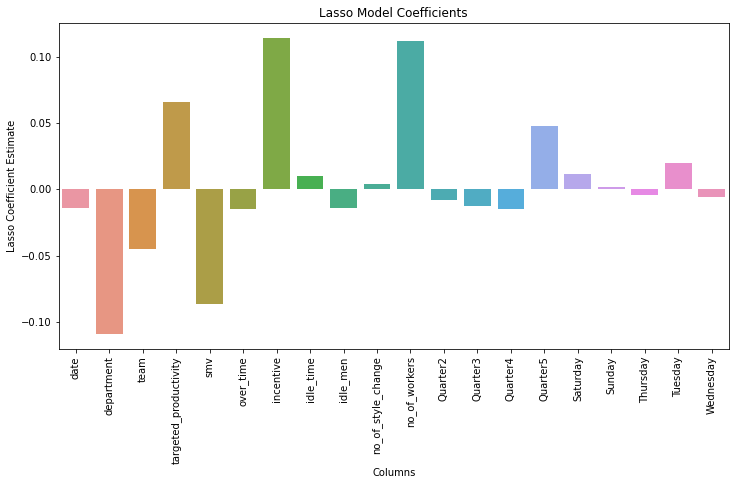

In [47]:
plt.figure(figsize = (12,6))
sns.barplot(data = d4gmt_coef, x = 'Columns', y = 'Lasso Coefficient Estimate')
plt.title('Lasso Model Coefficients')
plt.xticks(rotation = 90)
plt.show()

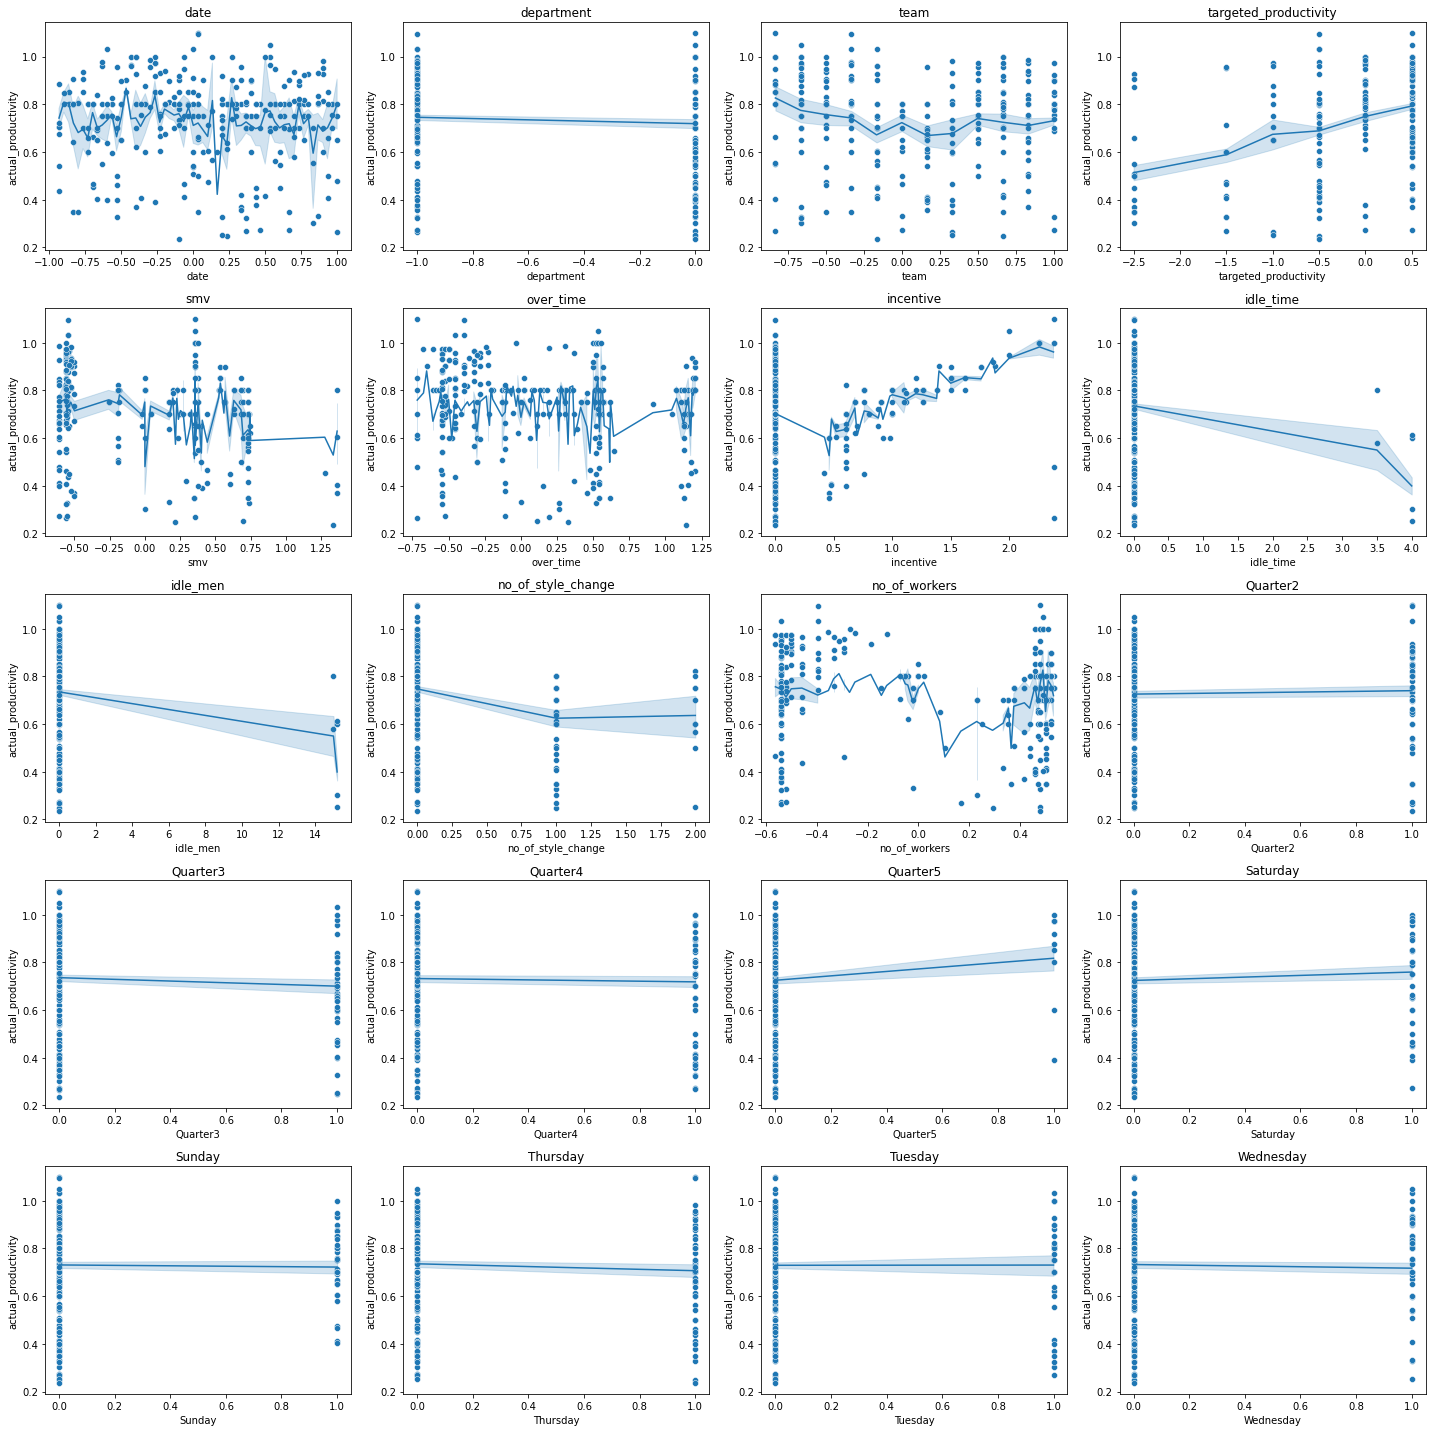

In [48]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_lasso)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### ElasticNet Regression Model

In [49]:
en_d4gmt = ElasticNet(alpha = 0.0001, max_iter = 10000)
en_d4gmt.fit(X_Train, Y_Train)

print(en_d4gmt.score(X_Test, Y_Test))

Y_Pred_EN = en_d4gmt.predict(X_Test)
EN_train_R2 = en_d4gmt.score(X_Train, Y_Train)
EN_R2 = r2_score(Y_Test, Y_Pred_EN)
print(EN_R2)
print(EN_train_R2)

0.3753287139365957
0.3753287139365957
0.36654812436652484


In [50]:
print(en_d4gmt.coef_)
d4gmt_coef['ElasticNet Coefficient Estimate'] = pd.Series(en_d4gmt.coef_)
print(d4gmt_coef)

[-0.01466193 -0.1130957  -0.04474365  0.0663069  -0.08879263 -0.01524621
  0.11472684  0.03014012 -0.01964054  0.00492173  0.11782857 -0.00893377
 -0.01325742 -0.01590117  0.04859408  0.01205853  0.00270434 -0.00424037
  0.02034577 -0.00586894]
                  Columns  LM Coefficient Estimate  RM Coefficient Estimate  \
0                    date                -0.015260                -0.015241   
1              department                -0.117628                -0.116559   
2                    team                -0.044470                -0.044550   
3   targeted_productivity                 0.066408                 0.066392   
4                     smv                -0.091332                -0.090789   
5               over_time                -0.016003                -0.015876   
6               incentive                 0.115224                 0.115159   
7               idle_time                 0.051462                 0.049465   
8                idle_men                -0.

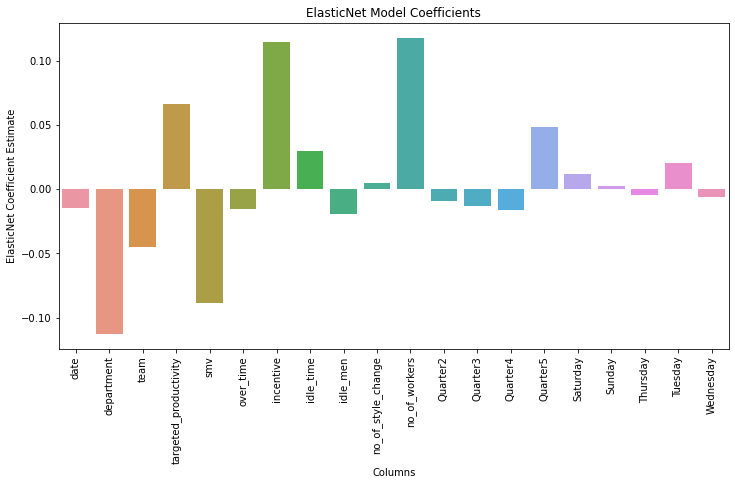

In [51]:
plt.figure(figsize = (12,6))
sns.barplot(data = d4gmt_coef, x = 'Columns', y = 'ElasticNet Coefficient Estimate')
plt.title('ElasticNet Model Coefficients')
plt.xticks(rotation = 90)
plt.show()

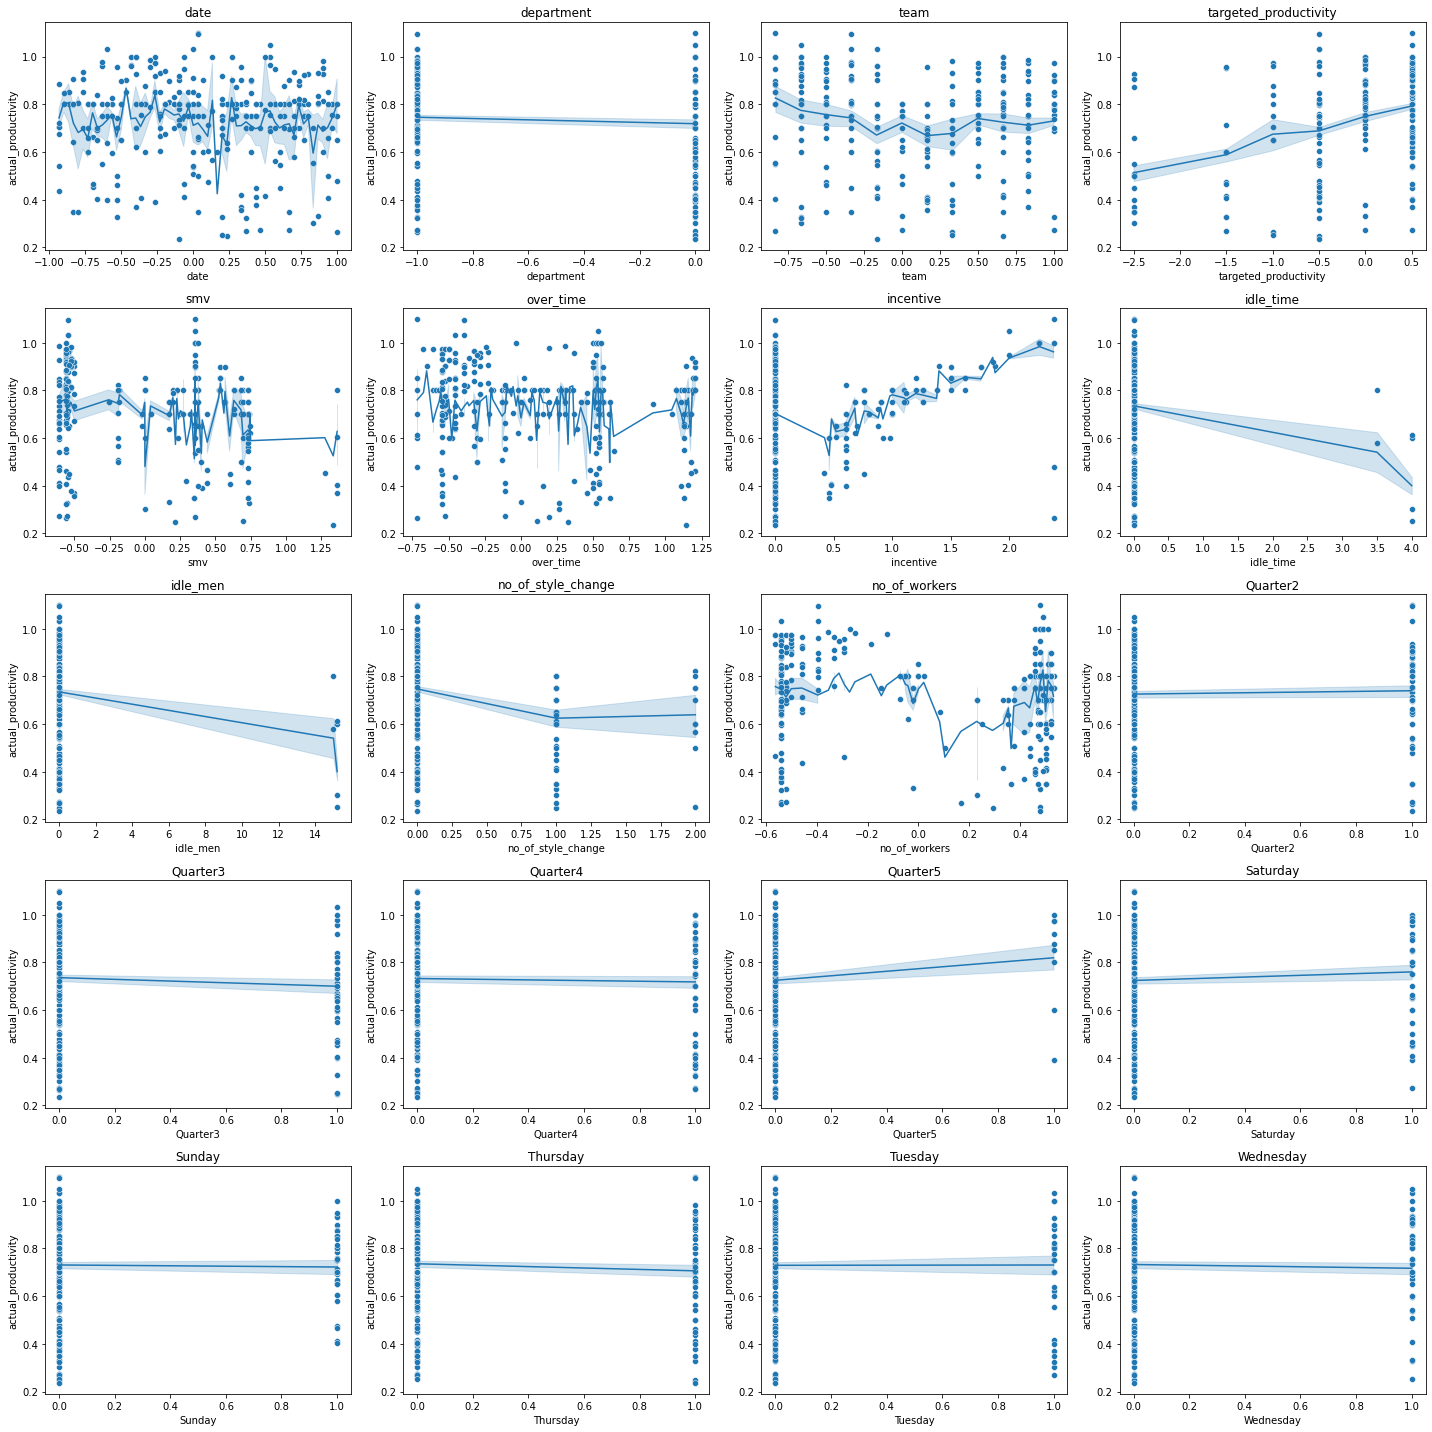

In [52]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_EN)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### RANSACRegressor

In [53]:
from sklearn.linear_model import RANSACRegressor

# Set RANSAC hyperparameters
ransac_d4gmt = RANSACRegressor(LinearRegression(),max_trials=4,min_samples=2, loss='absolute_loss', residual_threshold=10)

# Train model
ransac_d4gmt.fit(X_Train, Y_Train)

print(ransac_d4gmt.score(X_Test, Y_Test))

Y_Pred_ransac = ransac_d4gmt.predict(X_Test)
ransac_train_R2 = ransac_d4gmt.score(X_Train, Y_Train)
ransac_R2 = r2_score(Y_Test, Y_Pred_ransac)
print(ransac_R2)
print(ransac_train_R2)

0.37625563757609193
0.37625563757609193
0.366638215751217


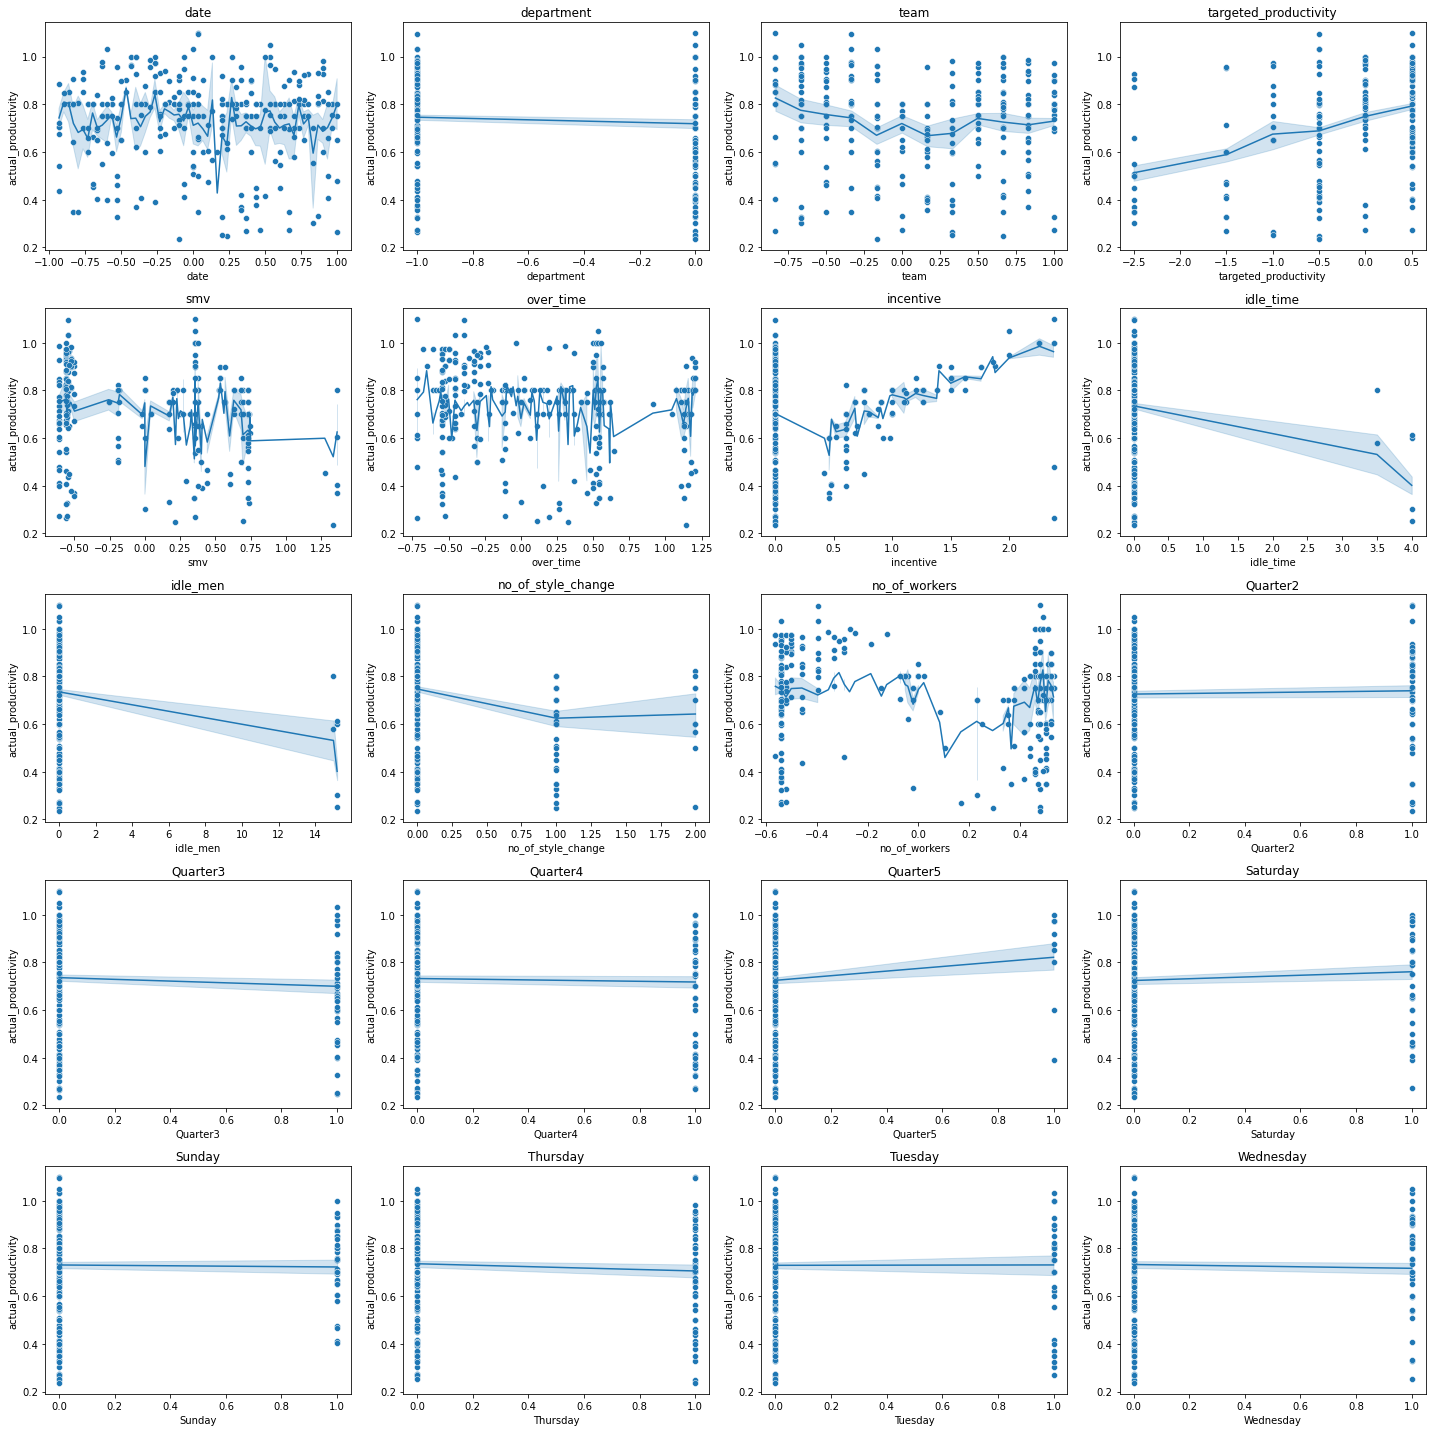

In [54]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_ransac)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### Support Vector Regression Model

In [55]:
from sklearn.svm import SVR

SVR_d4gmt_trial = SVR()

param_grid_SVR = {'kernel' : ['linear', 'poly', 'rbf'], 'gamma' : ['scale', 'auto'], 'C' : [0.2,0.4,0.5,0.6,0.8,1,2,5,10], 'epsilon' : [0.1, 0.2, 0.5, 0.80, 1, 1.5, 2, 3]}
SVR_model_grid = GridSearchCV(SVR_d4gmt_trial, param_grid = param_grid_SVR, n_jobs = -1, return_train_score = True, scoring = 'r2')
SVR_model_grid.fit(X_Train, Y_Train)
print(f'Best parameters for the SVR Model are : \n : {SVR_model_grid.best_params_}.')

SVR_d4gmt=SVR(**SVR_model_grid.best_params_)

SVR_d4gmt.fit(X_Train, Y_Train)
print(SVR_d4gmt.score(X_Test, Y_Test))
SVR_train_R2 = SVR_d4gmt.score(X_Train, Y_Train)
Y_Pred_SVR = SVR_d4gmt.predict(X_Test)
SVR_R2 = r2_score(Y_Test, Y_Pred_SVR)
print(SVR_R2)
print(SVR_train_R2)

Best parameters for the SVR Model are : 
 : {'C': 0.2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}.
0.45178190510829963
0.45178190510829963
0.4696934357275131


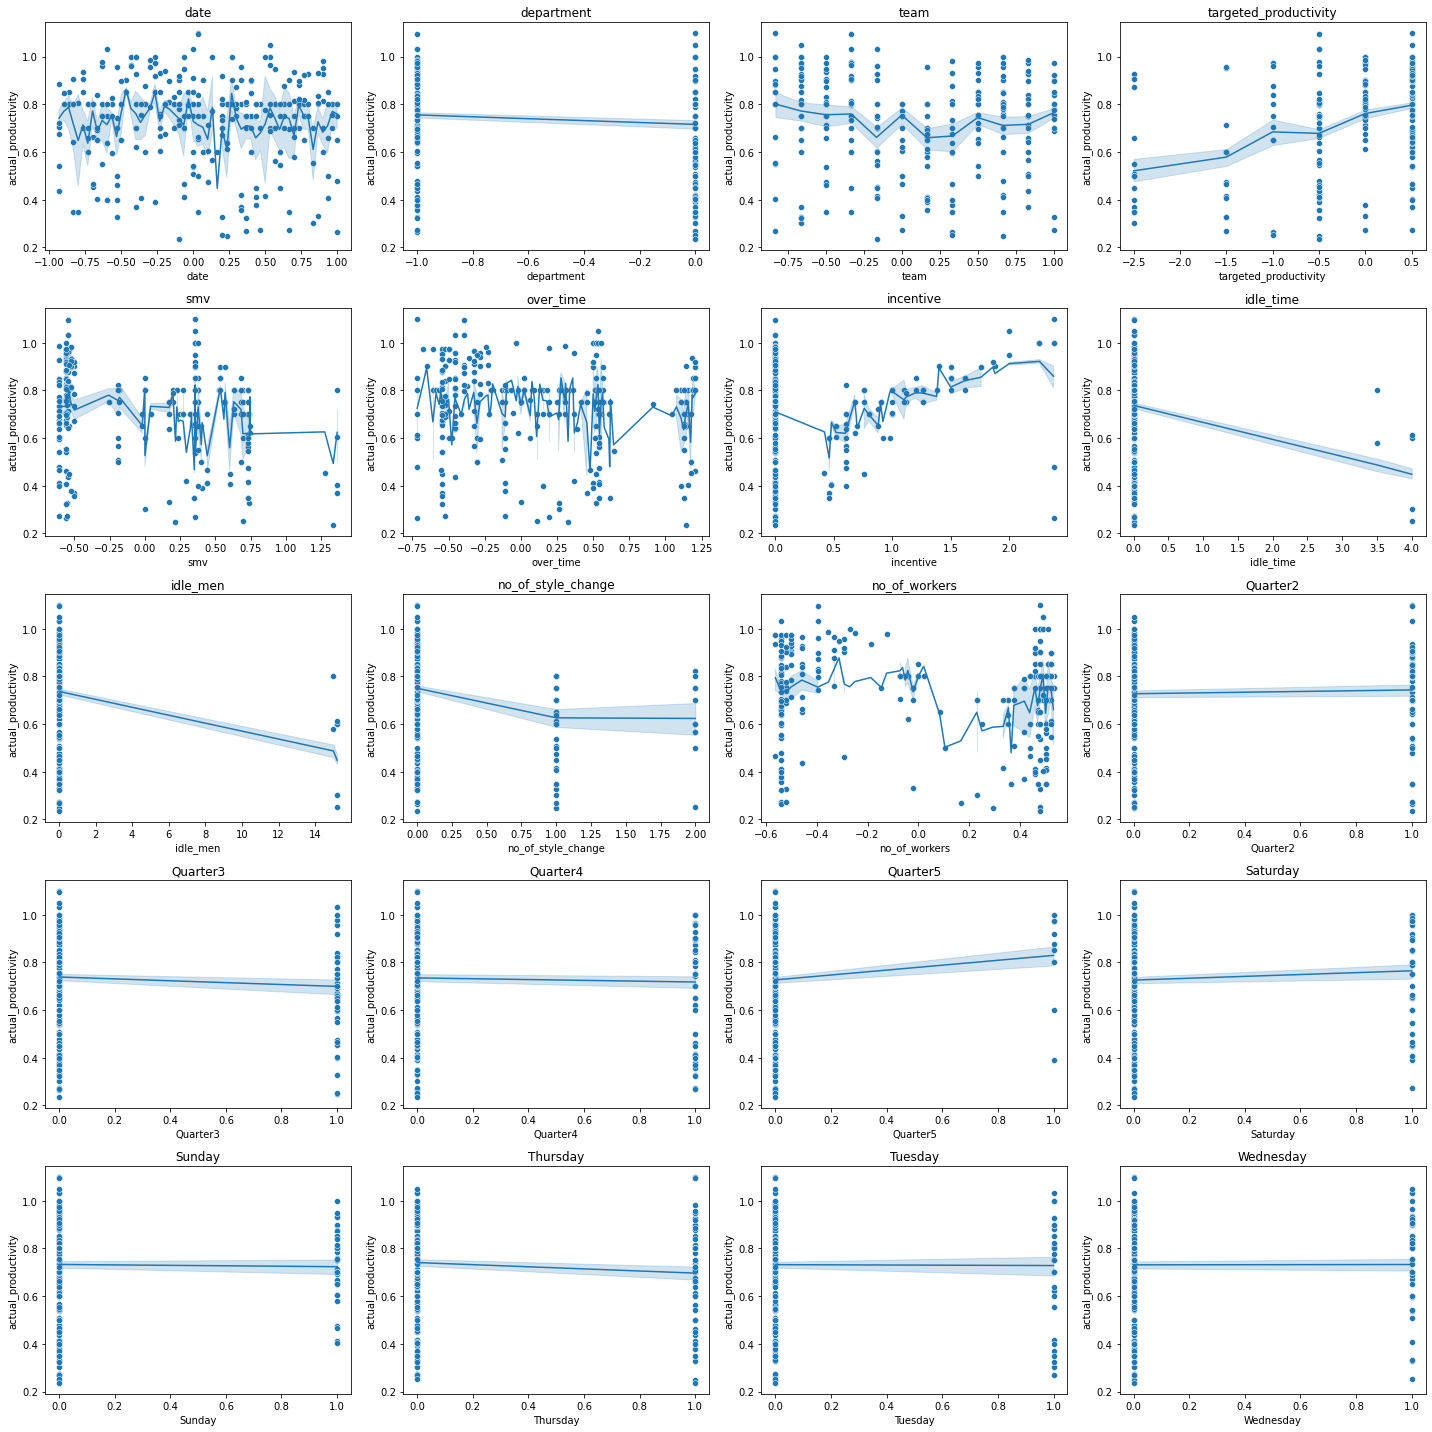

In [56]:
figure = 1
plt.figure(figsize = (20,20))
for col in X_Test.columns:
        plt.subplot(5,4,figure)
        sns.scatterplot(data = X_Test, x = X_Test[col], y = Y_Test)
        sns.lineplot(data = X_Test, x = X_Test[col], y = Y_Pred_SVR)
        plt.title(col)
        plt.tight_layout()
        figure += 1

plt.show()

#### Train Test Split without Standardisation

In [57]:
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X,Y,test_size = 0.25, random_state = 20)

print(f'X_Train size is : {X_train_new.shape}.')
print(f'X_Test size is : {X_test_new.shape}.')
print(f'Y_Train size is : {Y_train_new.shape} and average productivity is : {Y_train_new.mean()}.')
print(f'Y_Test size is : {Y_test_new.shape} and average productivity is : {Y_test_new.mean()}.')


X_Train size is : (897, 20).
X_Test size is : (300, 20).
Y_Train size is : (897,) and average productivity is : 0.7352512746633224.
Y_Test size is : (300,) and average productivity is : 0.7346121657033333.


#### Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
DT_d4gmt=DecisionTreeRegressor(random_state = 20)

param_grid = {'max_depth' : [3,4,5,10,20,50,100], 'min_samples_split' : [25,50,100,200,250]}
dt_model_grid = GridSearchCV(DT_d4gmt, cv = 10, param_grid = param_grid, n_jobs = -1, return_train_score = True, scoring = 'r2')
dt_model_grid.fit(X_train_new, Y_train_new)
print('Best parameters using grid search are \n', dt_model_grid.best_params_)

DT_d4gmt_final = DecisionTreeRegressor(random_state = 20, **dt_model_grid.best_params_)
DT_d4gmt_final.fit(X_train_new, Y_train_new)

print(DT_d4gmt_final.score(X_test_new, Y_test_new))
DT_train_R2 = DT_d4gmt_final.score(X_train_new, Y_train_new)
Y_Pred_DT = DT_d4gmt_final.predict(X_test_new)
DT_R2 = r2_score(Y_test_new, Y_Pred_DT)
print(DT_R2)
print(DT_train_R2)

Best parameters using grid search are 
 {'max_depth': 20, 'min_samples_split': 25}
0.40633570529857843
0.40633570529857843
0.5973100051131898


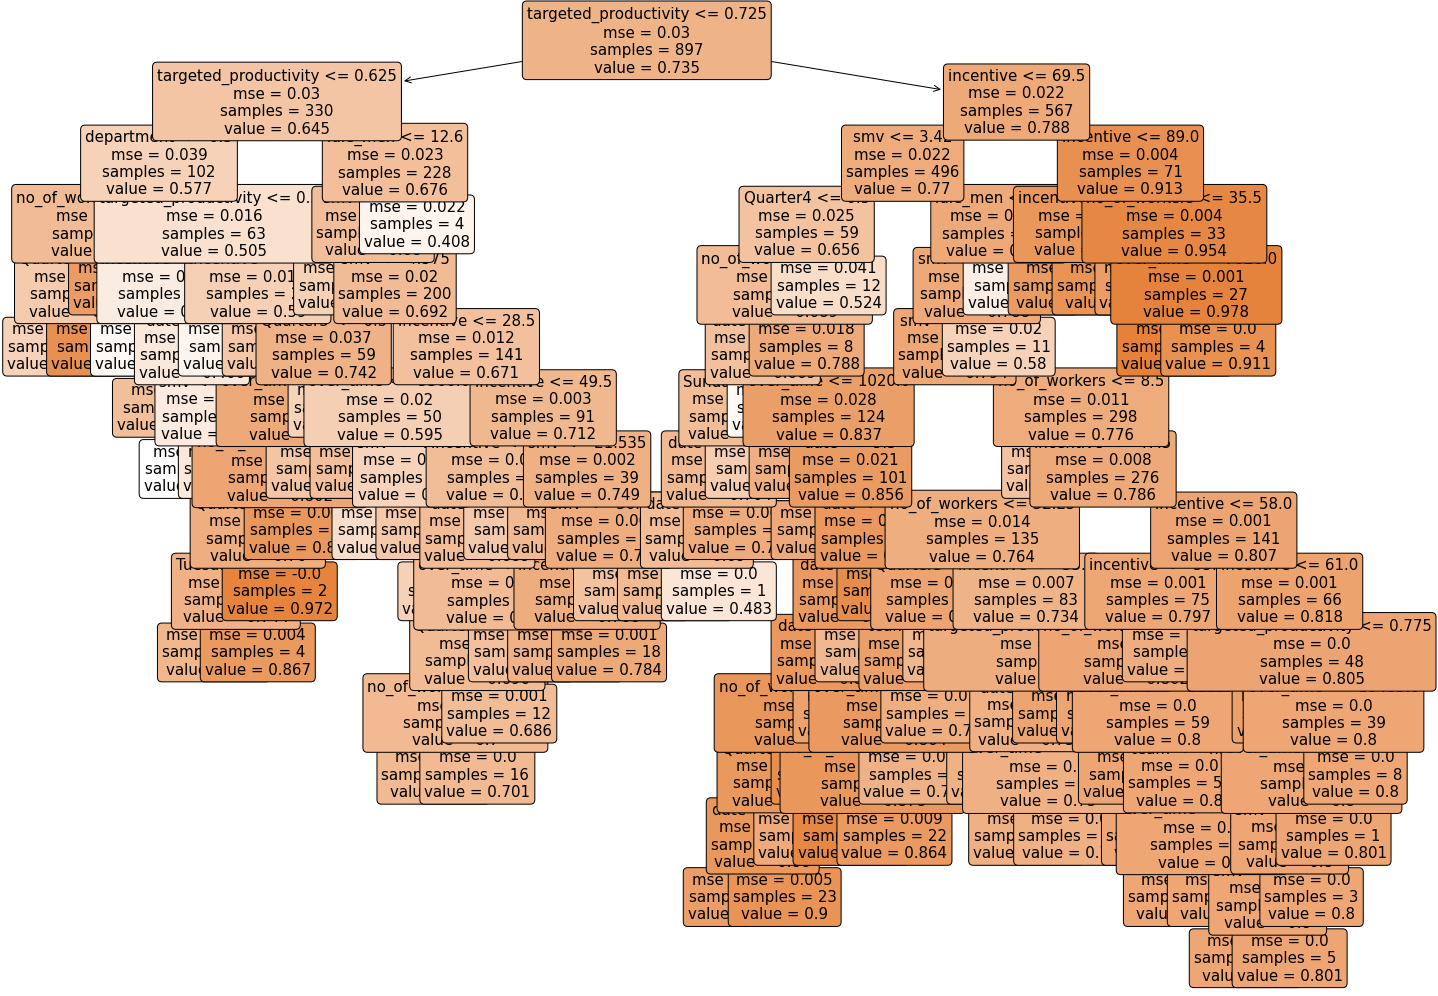

In [59]:
from sklearn import tree

plt.figure(figsize = (24, 18))
tree.plot_tree(DT_d4gmt_final, filled = True, fontsize = 15, rounded=True, feature_names = X_train_new.columns)
plt.show()

#### Random Forest Regression Model

In [60]:
from sklearn.ensemble import RandomForestRegressor

# define used regressor
RF_d4gmt = RandomForestRegressor()

param_grid = {'max_depth' : [3,4,5,10,20,50,100], 'min_samples_split' : [25,50,100,200,250], 'n_estimators' : [5,10,20,50,100,200,500]}
RF_model_grid = GridSearchCV(RF_d4gmt, cv = 10, param_grid = param_grid, n_jobs = -1, return_train_score = True, scoring = 'r2')
RF_model_grid.fit(X_train_new, Y_train_new)
print('Best parameters using grid search are \n', RF_model_grid.best_params_)

RF_d4gmt_final = RandomForestRegressor(**RF_model_grid.best_params_)

RF_d4gmt_final.fit(X_train_new,Y_train_new)

print(RF_d4gmt_final.score(X_test_new, Y_test_new))
RF_train_R2 = RF_d4gmt_final.score(X_train_new, Y_train_new)
Y_Pred_RF = RF_d4gmt_final.predict(X_test_new)
RF_R2 = r2_score(Y_test_new, Y_Pred_RF)
print(RF_R2)
print(RF_train_R2)

Best parameters using grid search are 
 {'max_depth': 20, 'min_samples_split': 25, 'n_estimators': 50}
0.5033839677549353
0.5033839677549353
0.6600479376220707


   date  department  team  targeted_productivity    smv  over_time  incentive  \
0     0           1     8                   0.80  26.16       7080         98   
1     0           0     1                   0.75   3.94        960          0   
2     0           1    11                   0.80  11.41       3660         50   
3     0           1    12                   0.80  11.41       3660         50   
4     0           1     6                   0.80  25.90       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  Quarter2  Quarter3  \
0        0.0       0.0                   0           59.0         0         0   
1        0.0       0.0                   0            8.0         0         0   
2        0.0       0.0                   0           30.5         0         0   
3        0.0       0.0                   0           30.5         0         0   
4        0.0       0.0                   0           56.0         0         0   

   Quarter4  Quarter5  Sat

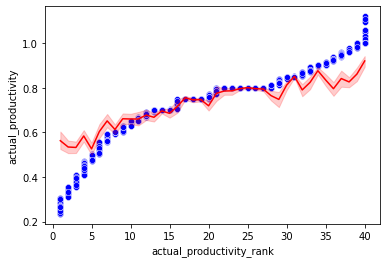

   error_percentage
0          0.007434
1          0.082401
2          0.005817
3          0.005817
4          0.000084


In [61]:
Y_Pred_RF_Full = RF_d4gmt_final.predict(X)

data_eval=pd.concat([X,Y],axis=1,join="inner")
data_eval['actual_productivity_rank']=pd.qcut(data_eval['actual_productivity'].rank(method='first').values,40,duplicates='drop').codes+1

data_eval['lin_mod_pred'] = pd.DataFrame(Y_Pred_RF_Full, index = X.index)                                         
print(data_eval.head())


ax=sns.scatterplot(x="actual_productivity_rank",y="actual_productivity",data=data_eval,color='Blue')
ax=sns.lineplot(x="actual_productivity_rank",y='lin_mod_pred',data=data_eval,color='Red')
plt.show()

data_eval['error']=data_eval['lin_mod_pred']-data_eval['actual_productivity']
data_eval['error_percentage']=(data_eval['error']/data_eval['actual_productivity']).abs()
error_df=data_eval[['error_percentage']]

print(error_df.head())

from sklearn.preprocessing import KBinsDiscretizer
bins=KBinsDiscretizer(n_bins=40,encode='ordinal',strategy='kmeans')
error_df_bin=pd.DataFrame(bins.fit_transform(error_df),index=error_df.index,columns=error_df.columns).add_suffix('_bin')
error_df=pd.concat([error_df,error_df_bin],axis=1,join="inner")



In [62]:
error_df.head()

error_percentage  error_percentage_bin
0          0.007434                   3.0
1          0.082401                   7.0
2          0.005817                   3.0
3          0.005817                   3.0
4          0.000084                   0.0

In [63]:
model_eval=error_df.groupby('error_percentage_bin')['error_percentage'].agg(['min','max','mean','count'])
model_eval['cum_count']=model_eval['count'].cumsum()
model_eval['cum_count_prop']=model_eval['cum_count']/max(model_eval['cum_count'])

model_eval

min       max      mean  count  cum_count  \
error_percentage_bin                                                   
0.0                   0.000008  0.000655  0.000303     33         33   
1.0                   0.000671  0.002263  0.001393     36         69   
2.0                   0.002330  0.005569  0.003941     81        150   
3.0                   0.005682  0.012130  0.008315    115        265   
4.0                   0.012201  0.024347  0.016894    174        439   
5.0                   0.024510  0.042157  0.032819    132        571   
6.0                   0.042484  0.066247  0.052727    105        676   
7.0                   0.067198  0.096828  0.081583     95        771   
8.0                   0.097746  0.130198  0.113006     94        865   
9.0                   0.131251  0.167040  0.147953     79        944   
10.0                  0.167927  0.212221  0.186183     61       1005   
11.0                  0.215112  0.262463  0.240756     50       1055   
12.0                  0.265244  0.310680  0.285148     35       1090   
13.0                  0.317081  0.367365  0.338081     28       1118   
14.0                  0.375714  0.427674  0.400732     10       1128   
15.0                  0.436792  0.488409  0.465906     12       1140   
16.0                  0.506588  0.543377  0.520708      7       1147   
17.0                  0.566440  0.596216  0.577677      6       1153   
18.0                  0.609125  0.647180  0.627751      5       1158   
19.0                  0.671178  0.692642  0.679014      3       1161   
20.0                  0.700879  0.724453  0.713403      3       1164   
21.0                  0.737403  0.740605  0.738869      3       1167   
22.0                  0.770379  0.788103  0.779241      2       1169   
23.0                  0.831461  0.858081  0.846395      3       1172   
24.0                  0.907591  0.929782  0.917159      3       1175   
25.0                  0.985287  0.985287  0.985287      1       1176   
26.0                  0.998668  1.001086  0.999740      3       1179   
27.0                  1.073313  1.073313  1.073313      1       1180   
28.0                  1.100193  1.126303  1.113248      2       1182   
29.0                  1.162789  1.194120  1.177694      4       1186   
30.0                  1.256352  1.256352  1.256352      1       1187   
31.0                  1.268129  1.268129  1.268129      1       1188   
32.0                  1.355802  1.355802  1.355802      1       1189   
33.0                  1.401214  1.401214  1.401214      1       1190   
34.0                  1.468746  1.468746  1.468746      1       1191   
35.0                  1.546527  1.546527  1.546527      1       1192   
36.0                  1.758472  1.758472  1.758472      1       1193   
37.0                  1.875081  1.886607  1.880844      2       1195   
38.0                  1.991171  1.991171  1.991171      1       1196   
39.0                  2.199926  2.199926  2.199926      1       1197   

                      cum_count_prop  
error_percentage_bin                  
0.0                         0.027569  
1.0                         0.057644  
2.0                         0.125313  
3.0                         0.221387  
4.0                         0.366750  
5.0                         0.477026  
6.0                         0.564745  
7.0                         0.644110  
8.0                         0.722640  
9.0                         0.788638  
10.0                        0.839599  
11.0                        0.881370  
12.0                        0.910610  
13.0                        0.934002  
14.0                        0.942356  
15.0                        0.952381  
16.0                        0.958229  
17.0                        0.963241  
18.0                        0.967419  
19.0                        0.969925  
20.0                        0.972431  
21.0                        0.974937  
22.0                        0.976608  
23.0                       

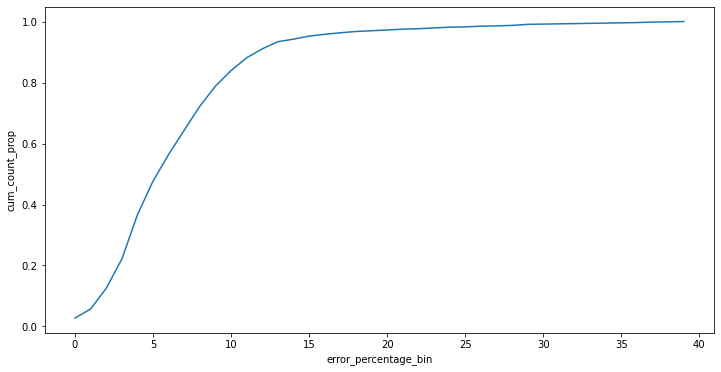

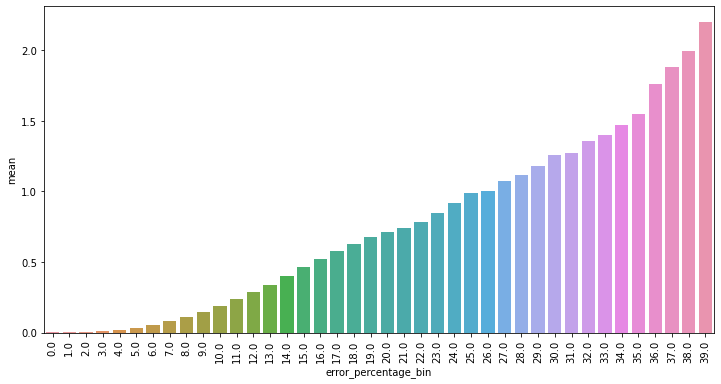

In [64]:
plt.figure(figsize = (12,6))
ax=sns.lineplot(x=model_eval.index,y='cum_count_prop',data=model_eval)
plt.show()

plt.figure(figsize = (12,6))
ax=sns.barplot(x=model_eval.index,y='mean',data=model_eval)
plt.xticks(rotation = 90)
plt.show()

#### Gradient Boosting Regressor

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

GB_d4gmt = GradientBoostingRegressor()

param_grid = {'max_depth' : [3,4,5,10,20,50,100], 'min_samples_split' : [25,50,100,200,250], 'n_estimators' : [5,10,20,50,100,200,500]}
GB_model_grid = GridSearchCV(GB_d4gmt, cv = 10, param_grid = param_grid, n_jobs = -1, return_train_score = True, scoring = 'r2')
GB_model_grid.fit(X_train_new, Y_train_new)
print('Best parameters using grid search are \n', GB_model_grid.best_params_)

Best parameters using grid search are 
 {'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 100}


In [66]:
GB_d4gmt_final = GradientBoostingRegressor(**GB_model_grid.best_params_)

GB_d4gmt_final.fit(X_train_new,Y_train_new)

print(GB_d4gmt_final.score(X_test_new, Y_test_new))
GB_train_R2 = GB_d4gmt_final.score(X_train_new, Y_train_new)
Y_Pred_GB = GB_d4gmt_final.predict(X_test_new)
GB_R2 = r2_score(Y_test_new, Y_Pred_GB)
print(GB_R2)
print(GB_train_R2)

0.5038806987821367
0.5038806987821367
0.782761084384257


#### XGBoost Regressor

In [67]:
import xgboost as xg
XGB_d4gmt = xg.XGBRegressor(objective ='reg:squarederror')

param_grid = {'max_depth' : [3,4,5,10,20,50,100], 'n_estimators' : [5,10,20,50,100,200,500]}
XGB_model_grid = GridSearchCV(XGB_d4gmt, cv = 10, param_grid = param_grid, n_jobs = -1, return_train_score = True, scoring = 'r2')
XGB_model_grid.fit(X_train_new, Y_train_new)
print('Best parameters using grid search are \n', XGB_model_grid.best_params_)

Best parameters using grid search are 
 {'max_depth': 5, 'n_estimators': 20}


In [68]:
XGB_d4gmt_final = xg.XGBRegressor(objective = 'reg:squarederror', **XGB_model_grid.best_params_)

XGB_d4gmt_final.fit(X_train_new,Y_train_new)

print(XGB_d4gmt_final.score(X_test_new, Y_test_new))
XGB_train_R2 = GB_d4gmt_final.score(X_train_new, Y_train_new)
Y_Pred_XGB = XGB_d4gmt_final.predict(X_test_new)
XGB_R2 = r2_score(Y_test_new, Y_Pred_XGB)
print(XGB_R2)
print(XGB_train_R2)

0.5257869747966315
0.5257869747966315
0.782761084384257


   date  department  team  targeted_productivity    smv  over_time  incentive  \
0     0           1     8                   0.80  26.16       7080         98   
1     0           0     1                   0.75   3.94        960          0   
2     0           1    11                   0.80  11.41       3660         50   
3     0           1    12                   0.80  11.41       3660         50   
4     0           1     6                   0.80  25.90       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  Quarter2  Quarter3  \
0        0.0       0.0                   0           59.0         0         0   
1        0.0       0.0                   0            8.0         0         0   
2        0.0       0.0                   0           30.5         0         0   
3        0.0       0.0                   0           30.5         0         0   
4        0.0       0.0                   0           56.0         0         0   

   Quarter4  Quarter5  Sat

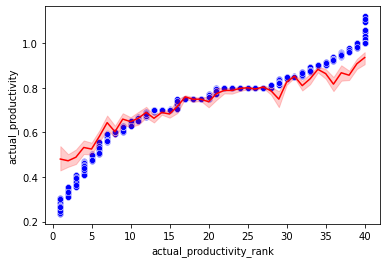

   error_percentage
0          0.001755
1          0.173707
2          0.023591
3          0.003191
4          0.008381


In [69]:
Y_Pred_XB_Full = XGB_d4gmt_final.predict(X)

data_eval=pd.concat([X,Y],axis=1,join="inner")
data_eval['actual_productivity_rank']=pd.qcut(data_eval['actual_productivity'].rank(method='first').values,40,duplicates='drop').codes+1

data_eval['XB_mod_pred'] = pd.DataFrame(Y_Pred_XB_Full, index = X.index)                                         
print(data_eval.head())


ax=sns.scatterplot(x="actual_productivity_rank",y="actual_productivity",data=data_eval,color='Blue')
ax=sns.lineplot(x="actual_productivity_rank",y='XB_mod_pred',data=data_eval,color='Red')
plt.show()

data_eval['error']=data_eval['XB_mod_pred']-data_eval['actual_productivity']
data_eval['error_percentage']=(data_eval['error']/data_eval['actual_productivity']).abs()
error_df=data_eval[['error_percentage']]

print(error_df.head())

bins=KBinsDiscretizer(n_bins=40,encode='ordinal',strategy='kmeans')
error_df_bin=pd.DataFrame(bins.fit_transform(error_df),index=error_df.index,columns=error_df.columns).add_suffix('_bin')
error_df=pd.concat([error_df,error_df_bin],axis=1,join="inner")



In [70]:
error_df.head()

error_percentage  error_percentage_bin
0          0.001755                   2.0
1          0.173707                  15.0
2          0.023591                   7.0
3          0.003191                   3.0
4          0.008381                   5.0

In [71]:
model_eval=error_df.groupby('error_percentage_bin')['error_percentage'].agg(['min','max','mean','count'])
model_eval['cum_count']=model_eval['count'].cumsum()
model_eval['cum_count_prop']=model_eval['cum_count']/max(model_eval['cum_count'])

model_eval

min       max      mean  count  cum_count  \
error_percentage_bin                                                   
0.0                   0.000009  0.000137  0.000089      5          5   
1.0                   0.000319  0.000670  0.000500      7         12   
2.0                   0.000698  0.001760  0.001263     20         32   
3.0                   0.001854  0.003859  0.002867     42         74   
4.0                   0.003882  0.007550  0.005747     86        160   
5.0                   0.007638  0.013239  0.010619    123        283   
6.0                   0.013312  0.022035  0.017247    150        433   
7.0                   0.022045  0.034659  0.027773    122        555   
8.0                   0.034903  0.051453  0.042428    115        670   
9.0                   0.051675  0.070771  0.061199     97        767   
10.0                  0.071860  0.090364  0.081817     70        837   
11.0                  0.091406  0.110880  0.100860     55        892   
12.0                  0.112171  0.129638  0.122041     45        937   
13.0                  0.131043  0.145578  0.138923     33        970   
14.0                  0.146363  0.160930  0.153292     23        993   
15.0                  0.163299  0.178974  0.170587     29       1022   
16.0                  0.181862  0.201222  0.191863     29       1051   
17.0                  0.202172  0.222398  0.211805     21       1072   
18.0                  0.225279  0.250451  0.237088     13       1085   
19.0                  0.252288  0.282418  0.265095     24       1109   
20.0                  0.294043  0.335386  0.314504     20       1129   
21.0                  0.336350  0.384390  0.356717     21       1150   
22.0                  0.391474  0.441378  0.417788     11       1161   
23.0                  0.480708  0.480708  0.480708      1       1162   
24.0                  0.510034  0.553498  0.533063      5       1167   
25.0                  0.584211  0.618678  0.598803      6       1173   
26.0                  0.648161  0.666655  0.657397      4       1177   
27.0                  0.683017  0.700785  0.690781      3       1180   
28.0                  0.735457  0.735457  0.735457      1       1181   
29.0                  0.857064  0.874750  0.865907      2       1183   
30.0                  0.995807  1.011020  1.003413      2       1185   
31.0                  1.042199  1.044093  1.043146      2       1187   
32.0                  1.106492  1.113726  1.110109      2       1189   
33.0                  1.171530  1.171530  1.171530      1       1190   
34.0                  1.432929  1.432929  1.432929      1       1191   
35.0                  1.487529  1.489937  1.488733      2       1193   
36.0                  1.539743  1.539743  1.539743      1       1194   
37.0                  1.901552  1.901552  1.901552      1       1195   
38.0                  1.944829  1.944829  1.944829      1       1196   
39.0                  2.240072  2.240072  2.240072      1       1197   

                      cum_count_prop  
error_percentage_bin                  
0.0                         0.004177  
1.0                         0.010025  
2.0                         0.026734  
3.0                         0.061821  
4.0                         0.133668  
5.0                         0.236424  
6.0                         0.361738  
7.0                         0.463659  
8.0                         0.559733  
9.0                         0.640769  
10.0                        0.699248  
11.0                        0.745196  
12.0                        0.782790  
13.0                        0.810359  
14.0                        0.829574  
15.0                        0.853801  
16.0                        0.878028  
17.0                        0.895572  
18.0                        0.906433  
19.0                        0.926483  
20.0                        0.943191  
21.0                        0.960735  
22.0                        0.969925  
23.0                       

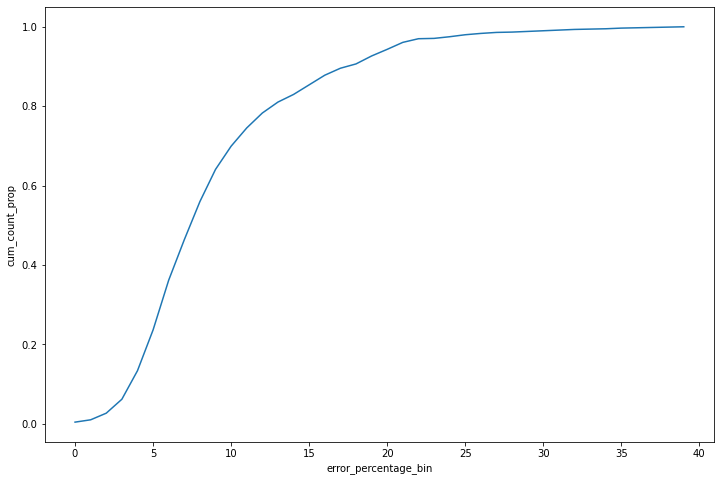

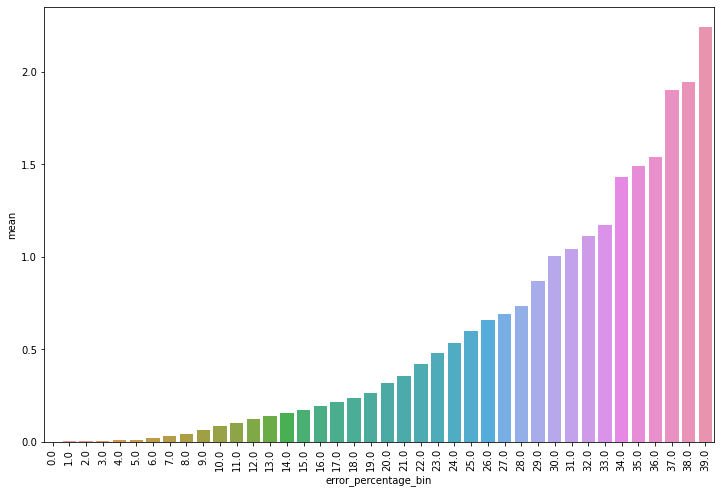

In [72]:
plt.figure(figsize = (12,8))
ax=sns.lineplot(x=model_eval.index,y='cum_count_prop',data=model_eval)
plt.show()

plt.figure(figsize = (12,8))
ax=sns.barplot(x=model_eval.index,y='mean',data=model_eval)
plt.xticks(rotation = 90)
plt.show()

#### Support Vector Regression

In [73]:
SVR_d4gmt_no_stand_trial = SVR()
SVR_model_grid_no_stand = GridSearchCV(SVR_d4gmt_no_stand_trial, param_grid = param_grid_SVR, n_jobs = -1, return_train_score = True, scoring = 'r2')
SVR_model_grid_no_stand.fit(X_Train, Y_Train)
print(f'Best parameters for the SVR Model are : \n : {SVR_model_grid_no_stand.best_params_}.')

Best parameters for the SVR Model are : 
 : {'C': 0.2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}.


In [74]:
SVR_d4gmt_no_stand =SVR(**SVR_model_grid_no_stand.best_params_)

SVR_d4gmt_no_stand.fit(X_train_new, Y_train_new)
print(SVR_d4gmt_no_stand.score(X_test_new, Y_test_new))
SVR_train_R2_no_stand = SVR_d4gmt_no_stand.score(X_train_new, Y_train_new)
Y_Pred_SVR_no_stand = SVR_d4gmt_no_stand.predict(X_test_new)
SVR_R2_no_stand = r2_score(Y_test_new, Y_Pred_SVR_no_stand)
print(SVR_R2_no_stand)
print(SVR_train_R2_no_stand)

0.018200849249666695
0.018200849249666695
0.0017971276720488705


#### Evaluation Metrics Table

In [75]:
init_data = {'Model' : ['Linear', 'Polynomial Degree 2', 'Polynomial Degree 3', 'Ridge', 'Lasso', 'ElasticNet', 'Ransac', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Extreme Gradient Boost', 'SVR Without Standardisation'], 
             'Orig Train R2' : [lm_train_R2, pm2_train_R2, pm3_train_R2, rm_train_R2, lasso_train_R2, EN_train_R2, ransac_train_R2, SVR_train_R2, DT_train_R2, RF_train_R2, GB_train_R2, XGB_train_R2, SVR_train_R2_no_stand],
             'Original Test R2' : [lm_R2, pm2_R2, pm3_R2, rm_R2, lasso_R2, EN_R2, ransac_R2, SVR_R2, DT_R2, RF_R2, GB_R2, XGB_R2, SVR_R2_no_stand]}

metrics_table = pd.DataFrame(init_data)
print(metrics_table)

                          Model  Orig Train R2  Original Test R2
0                        Linear       0.366638          0.376256
1           Polynomial Degree 2       0.548481         -0.098885
2           Polynomial Degree 3       0.914283         -0.098885
3                         Ridge       0.366636          0.376006
4                         Lasso       0.366312          0.374519
5                    ElasticNet       0.366548          0.375329
6                        Ransac       0.366638          0.376256
7                           SVR       0.469693          0.451782
8                 Decision Tree       0.597310          0.406336
9                 Random Forest       0.660048          0.503384
10            Gradient Boosting       0.782761          0.503881
11       Extreme Gradient Boost       0.782761          0.525787
12  SVR Without Standardisation       0.001797          0.018201


#### Pipeline for all the models

In [76]:
def standard_model(X):
    scaler = preprocessing.RobustScaler()
    X_Scaled = scaler.fit_transform(X)
    X_Scaled = pd.DataFrame(X_Scaled, columns = X.columns)
    return X_Scaled


In [77]:
def lin_model(X_Train, X_Test, Y_Train, Y_Test):
    lm_d4gmt = LinearRegression(n_jobs = -1)
    lm_d4gmt.fit(X_Train, Y_Train)
    lm_train_R2 = lm_d4gmt.score(X_Train, Y_Train) 
    Y_Pred_lm = lm_d4gmt.predict(X_Test)
    lm_R2 = r2_score(Y_Test, Y_Pred_lm)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-lm_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    coef_est = pd.DataFrame()
    coef_est['Columns'] = X_Train.columns
    coef_est['LM Coefficient Estimate'] = pd.Series(lm_d4gmt.coef_)
    plt.figure(figsize = (12,6))
    sns.barplot(data = coef_est, x = 'Columns', y = 'LM Coefficient Estimate')
    plt.title('Linear Model Coefficients')
    plt.xticks(rotation = 90)
    plt.show()
    return lm_train_R2, lm_R2, adj_R2, coef_est['LM Coefficient Estimate']


In [78]:
def poly2_model(X_Train, X_Test, Y_Train, Y_Test):
    pm_d4gmt = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
    pm_d4gmt.fit(X_Train, Y_Train)
    pm2_train_R2 = pm_d4gmt.score(X_Train, Y_Train)
    Y_Pred_pm2 = pm_d4gmt.predict(X_Test)
    pm2_R2 = r2_score(Y_Test, Y_Pred_pm2)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-pm2_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return pm2_train_R2, pm2_R2, adj_R2



In [79]:
def poly3_model(X_Train, X_Test, Y_Train, Y_Test):
    pm_d4gmt = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
    pm_d4gmt.fit(X_Train, Y_Train)
    pm3_train_R2 = pm_d4gmt.score(X_Train, Y_Train)
    Y_Pred_pm3 = pm_d4gmt.predict(X_Test)
    pm3_R2 = r2_score(Y_Test, Y_Pred_pm3)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-pm3_train_R3)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return pm3_train_R2, pm3_R2, adj_R2



In [80]:
def ridge_model(X_Train, X_Test, Y_Train, Y_Test):
    rm_d4gmt = Ridge(alpha = 0.1)
    rm_d4gmt.fit(X_Train, Y_Train)
    Y_Pred_rm = rm_d4gmt.predict(X_Test)
    rm_R2 = r2_score(Y_Test, Y_Pred_rm)
    rm_train_R2 = rm_d4gmt.score(X_Train, Y_Train)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-rm_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    coef_est = pd.DataFrame()
    coef_est['Columns'] = X_Train.columns
    coef_est['RM Coefficient Estimate'] = pd.Series(rm_d4gmt.coef_)
    plt.figure(figsize = (12,6))
    sns.barplot(data = coef_est, x = 'Columns', y = 'RM Coefficient Estimate')
    plt.title('Ridge Model Coefficients')
    plt.xticks(rotation = 90)
    plt.show()    
    return rm_train_R2, rm_R2, adj_R2, coef_est['RM Coefficient Estimate']




In [81]:
def lasso_model(X_Train, X_Test, Y_Train, Y_Test):
    lasso_d4gmt = Lasso(alpha = 0.0001, max_iter = 10000)
    lasso_d4gmt.fit(X_Train, Y_Train)
    Y_Pred_lasso = lasso_d4gmt.predict(X_Test)
    lasso_R2 = r2_score(Y_Test, Y_Pred_lasso)
    lasso_train_R2 = lasso_d4gmt.score(X_Train, Y_Train)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-lasso_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    coef_est = pd.DataFrame()
    coef_est['Columns'] = X_Train.columns
    coef_est['Lasso Coefficient Estimate'] = pd.Series(lasso_d4gmt.coef_)
    plt.figure(figsize = (12,6))
    sns.barplot(data = coef_est, x = 'Columns', y = 'Lasso Coefficient Estimate')
    plt.title('Lasso Model Coefficients')
    plt.xticks(rotation = 90)
    plt.show()    
    return lasso_train_R2, lasso_R2, adj_R2, coef_est['Lasso Coefficient Estimate']



In [82]:
def elasticnet_model(X_Train, X_Test, Y_Train, Y_Test):
    en_d4gmt = ElasticNet(alpha = 0.0001, max_iter = 10000)
    en_d4gmt.fit(X_Train, Y_Train)
    Y_Pred_EN = en_d4gmt.predict(X_Test)
    EN_train_R2 = en_d4gmt.score(X_Train, Y_Train)
    EN_R2 = r2_score(Y_Test, Y_Pred_EN)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-EN_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    coef_est = pd.DataFrame()
    coef_est['Columns'] = X_Train.columns
    coef_est['ElasticNet Coefficient Estimate'] = pd.Series(en_d4gmt.coef_)
    plt.figure(figsize = (12,6))
    sns.barplot(data = coef_est, x = 'Columns', y = 'ElasticNet Coefficient Estimate')
    plt.title('ElasticNet Model Coefficients')
    plt.xticks(rotation = 90)
    plt.show()    
    return EN_train_R2, EN_R2, adj_R2, coef_est['ElasticNet Coefficient Estimate']



In [83]:
def ransac_model(X_Train, X_Test, Y_Train, Y_Test):
    ransac_d4gmt = RANSACRegressor(LinearRegression(),max_trials=4,min_samples=2, loss='absolute_loss', residual_threshold=10)
    ransac_d4gmt.fit(X_Train, Y_Train)
    Y_Pred_ransac = ransac_d4gmt.predict(X_Test)
    ransac_train_R2 = ransac_d4gmt.score(X_Train, Y_Train)
    ransac_R2 = r2_score(Y_Test, Y_Pred_ransac)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-ransac_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return ransac_train_R2, ransac_R2, adj_R2



In [84]:
def SVM_Regressor_Model(X_Train, X_Test, Y_Train, Y_Test):
    SVR_d4gmt=SVR(**SVR_model_grid.best_params_)
    SVR_d4gmt.fit(X_Train, Y_Train)
    SVR_train_R2 = SVR_d4gmt.score(X_Train, Y_Train)
    Y_Pred_SVR = SVR_d4gmt.predict(X_Test)
    SVR_R2 = r2_score(Y_Test, Y_Pred_SVR)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-SVR_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return SVR_train_R2, SVR_R2, adj_R2



In [85]:
def decision_tree_model(X_Train, X_Test, Y_Train, Y_Test):
    DT_d4gmt_final = DecisionTreeRegressor(random_state = 20, **dt_model_grid.best_params_)
    DT_d4gmt_final.fit(X_Train, Y_Train)
    DT_train_R2 = DT_d4gmt_final.score(X_Train, Y_Train)
    Y_Pred_DT = DT_d4gmt_final.predict(X_Test)
    DT_R2 = r2_score(Y_Test, Y_Pred_DT)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-DT_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return DT_train_R2, DT_R2, adj_R2



In [86]:
def random_forest_model(X_Train, X_Test, Y_Train, Y_Test):
    RF_d4gmt_final = RandomForestRegressor(**dt_model_grid.best_params_)
    RF_d4gmt_final.fit(X_Train,Y_Train)
    RF_train_R2 = RF_d4gmt_final.score(X_Train, Y_Train)
    Y_Pred_RF = RF_d4gmt_final.predict(X_Test)
    RF_R2 = r2_score(Y_Test, Y_Pred_RF)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-RF_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return RF_train_R2, RF_R2, adj_R2



    

In [87]:
def gradient_boost_model(X_Train, X_Test, Y_Train, Y_Test):
    gb_d4gmt = GradientBoostingRegressor(**GB_model_grid.best_params_)
    gb_d4gmt.fit(X_Train, Y_Train)
    gb_train_R2 = gb_d4gmt.score(X_Train, Y_Train)
    Y_Pred_GB = gb_d4gmt.predict(X_Test)
    GB_R2 = r2_score(Y_Test, Y_Pred_GB)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-GB_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return GB_train_R2, GB_R2, adj_R2    
    

In [88]:
def xtreme_gradient_boost_model(X_Train, X_Test, Y_Train, Y_Test):
    xgb_d4gmt = xg.XGBRegressor(objective = 'reg:linear', **XGB_model_grid.best_params_)
    xgb_d4gmt.fit(X_Train, Y_Train)
    xgb_train_R2 = xgb_d4gmt.score(X_Train, Y_Train)
    Y_Pred_XGB = xgb_d4gmt.predict(X_Test)
    XGB_R2 = r2_score(Y_Test, Y_Pred_XGB)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-XGB_train_R2)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return XGB_train_R2, XGB_R2, adj_R2

In [89]:
def svr_model(X_Train, X_Test, Y_Train, Y_Test):
    SVR_d4gmt_no_stand =SVR(**SVR_model_grid_no_stand.best_params_)
    SVR_d4gmt_no_stand.fit(X_Train, Y_Train)
    SVR_train_R2_no_stand = SVR_d4gmt_no_stand.score(X_Train, Y_Train)
    Y_Pred_SVR_no_stand = SVR_d4gmt_no_stand.predict(X_Test)
    SVR_R2_no_stand = r2_score(Y_Test, Y_Pred_SVR_no_stand)
    N=X_Train.shape[0]
    p = X_Train.shape[1]
    x = (1-SVR_train_R2_no_stand)
    y = (N-1) / (N-p-1)
    adj_R2 = (1 - (x * y))
    return SVR_train_R2_no_stand, SVR_R2_no_stand, adj_R2, Y_Pred_SVR_no_stand


    

In [90]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return x

In [91]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))


d4gmt.head()

date  department  team  targeted_productivity    smv  over_time  incentive  \
0     0           1     8                   0.80  26.16       7080         98   
1     0           0     1                   0.75   3.94        960          0   
2     0           1    11                   0.80  11.41       3660         50   
3     0           1    12                   0.80  11.41       3660         50   
4     0           1     6                   0.80  25.90       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  \
0        0.0       0.0                   0           59.0   
1        0.0       0.0                   0            8.0   
2        0.0       0.0                   0           30.5   
3        0.0       0.0                   0           30.5   
4        0.0       0.0                   0           56.0   

   actual_productivity  Quarter2  Quarter3  Quarter4  Quarter5  Saturday  \
0             0.940725         0         0         0         0         0   
1             0.886500         0         0         0         0         0   
2             0.800570         0         0         0         0         0   
3             0.800570         0         0         0         0         0   
4             0.800382         0         0         0         0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         1        0          0  
1       0         1        0          0  
2       0         1        0          0  
3       0         1        0          0  
4       0         1        0          0

In [92]:
Y = d4gmt['actual_productivity']
X = d4gmt.filter(['incentive', 'no_of_workers'], axis = 1)



In [93]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


In [94]:
class counter:
    #wraps a function, to keep a running count of how many
    #times it's been called
    def __init__(self, func):
        self.func = func
        self.count = count

    def __call__(self, *args, **kwargs):
        self.count += 1
        return self.func(*args, **kwargs)

In [95]:
def model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test):
    model_pipeline_func.counter += 1
    trial_no = model_pipeline_func.counter
    Train_R2 = '(Trial' + str(trial_no) + ' TrainR2)'
    Test_R2 = '(Trial' + str(trial_no) + ' TestR2)'
    Adj_R2 = '(Trial' + str(trial_no) + ' AdjR2)'
    metrics_table[Train_R2] = ''
    metrics_table[Test_R2] = ''
    metrics_table[Adj_R2] = ''
    X_scale_train = standard_model(X_Train)
    coef_est = pd.DataFrame()
    coef_est['Columns'] = X_Train.columns
    X_scale_test = standard_model(X_Test)
    Lin_Model = lin_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[0, Train_R2] = Lin_Model[0]
    metrics_table.at[0, Test_R2] = Lin_Model[1]
    metrics_table.at[0, Adj_R2] = Lin_Model[2]
    coef_est['LM Model Coefficients'] = Lin_Model[3]
    Poly2_Model = poly2_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[1, Train_R2] = Poly2_Model[0]
    metrics_table.at[1, Test_R2] = Poly2_Model[1]
    metrics_table.at[1, Adj_R2] = Poly2_Model[2]
    Poly3_Model = poly2_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[2, Train_R2] = Poly3_Model[0]
    metrics_table.at[2, Test_R2] = Poly3_Model[1]
    metrics_table.at[2, Adj_R2] = Poly3_Model[2]
    Ridge_Model = ridge_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[3, Train_R2] = Ridge_Model[0]
    metrics_table.at[3, Test_R2] = Ridge_Model[1]
    metrics_table.at[3, Adj_R2] = Ridge_Model[2]
    coef_est['Ridge Model Coefficients'] = Ridge_Model[3]
    Lasso_Model = lasso_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[4, Train_R2] = Lasso_Model[0]
    metrics_table.at[4, Test_R2] = Lasso_Model[1]
    metrics_table.at[4, Adj_R2] = Lasso_Model[2]
    coef_est['Lasso Model Coefficients'] = Lasso_Model[3]
    ElasticNet_Model = elasticnet_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[5, Train_R2] = ElasticNet_Model[0]
    metrics_table.at[5, Test_R2] = ElasticNet_Model[1]
    metrics_table.at[5, Adj_R2] = ElasticNet_Model[2]
    coef_est['ElasticNet Model Coefficients'] = ElasticNet_Model[3]
    RANSAC_Model = ransac_model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[6, Train_R2] = RANSAC_Model[0]
    metrics_table.at[6, Test_R2] = RANSAC_Model[1]
    metrics_table.at[6, Adj_R2] = RANSAC_Model[2]
    SVR_Model = SVM_Regressor_Model(X_scale_train, X_scale_test, Y_Train, Y_Test)
    metrics_table.at[7, Train_R2] = SVR_Model[0]
    metrics_table.at[7, Test_R2] = SVR_Model[1]
    metrics_table.at[7, Adj_R2] = SVR_Model[2]
    DT_Model = decision_tree_model(X_Train, X_Test, Y_Train, Y_Test)
    metrics_table.at[8, Train_R2] = DT_Model[0]
    metrics_table.at[8, Test_R2] = DT_Model[1]
    metrics_table.at[8, Adj_R2] = DT_Model[2]
    RF_Model = random_forest_model(X_Train, X_Test, Y_Train, Y_Test)
    metrics_table.at[9, Train_R2] = RF_Model[0]
    metrics_table.at[9, Test_R2] = RF_Model[1]
    metrics_table.at[9, Adj_R2] = RF_Model[2]
    GB_Model = gradient_boost_model(X_Train, X_Test, Y_Train, Y_Test)
    metrics_table.at[10, Train_R2] = GB_Model[0]
    metrics_table.at[10, Test_R2] = GB_Model[1]
    metrics_table.at[10, Adj_R2] = GB_Model[2]
    XGB_Model = xtreme_gradient_boost_model(X_Train, X_Test, Y_Train, Y_Test)
    metrics_table.at[11, Train_R2] = XGB_Model[0]
    metrics_table.at[11, Test_R2] = XGB_Model[1]
    metrics_table.at[11, Adj_R2] = XGB_Model[2]
    SVR_Model = svr_model(X_Train, X_Test, Y_Train, Y_Test)
    metrics_table.at[12, Train_R2] = SVR_Model[0]
    metrics_table.at[12, Test_R2] = SVR_Model[1]
    metrics_table.at[12, Adj_R2] = SVR_Model[2]



    
    
    
    return coef_est

model_pipeline_func.counter = 0





#### Evaluating different permutations of Model with Data. Evaluating all the models on - 

1. All the features
2. 2 Best Features
3. 3 Best Features
4. 5 Best Features
5. 8 Best Features
6. 10 Best Features

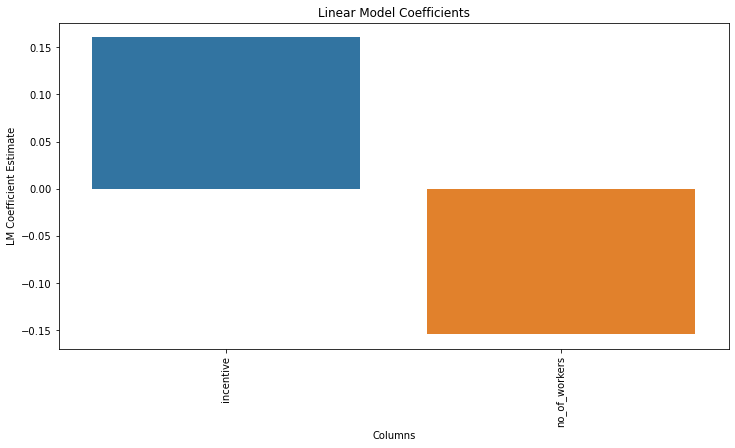

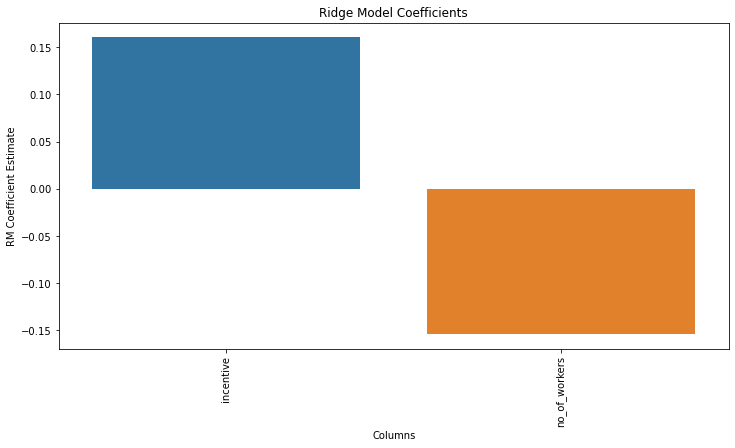

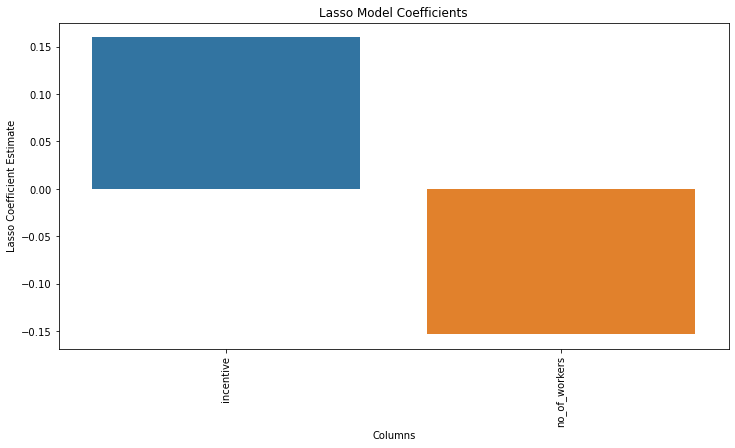

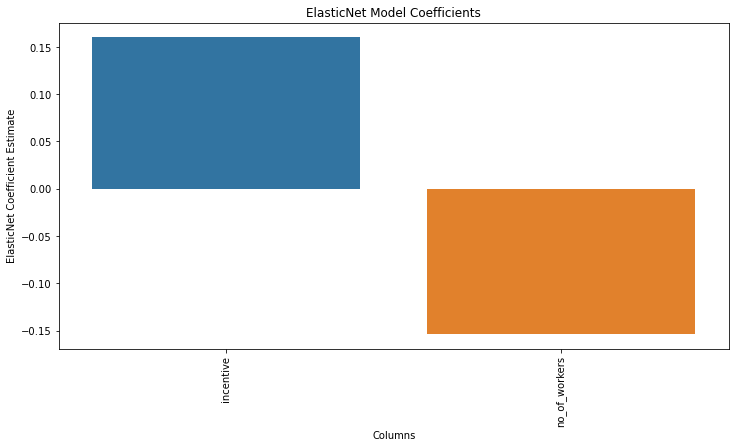

[13:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [96]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

In [97]:
Y = d4gmt['actual_productivity']
X = d4gmt.filter(['department','incentive', 'no_of_workers'], axis = 1)




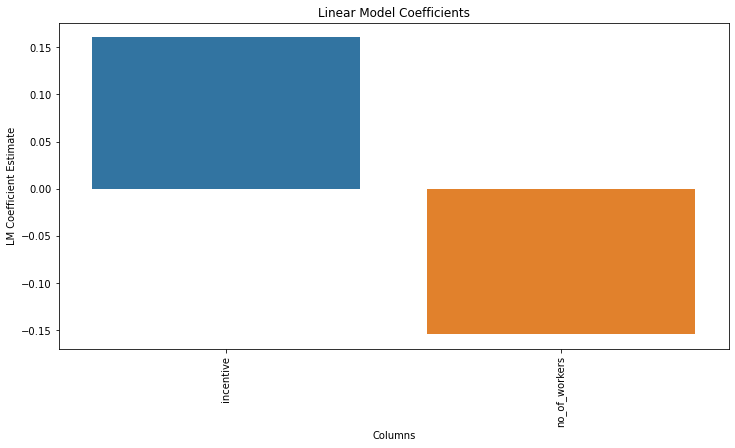

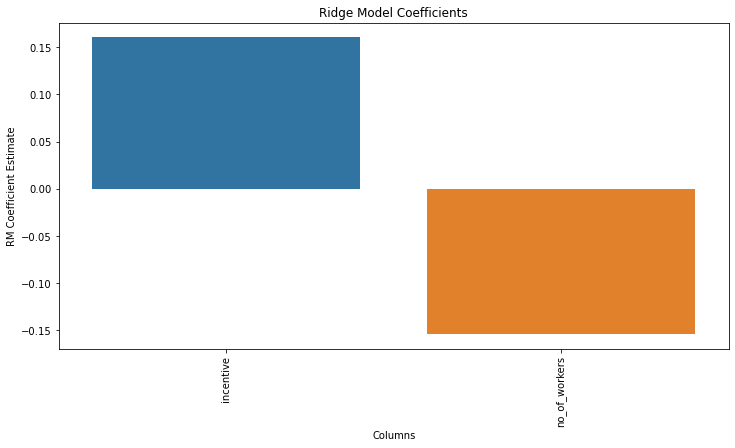

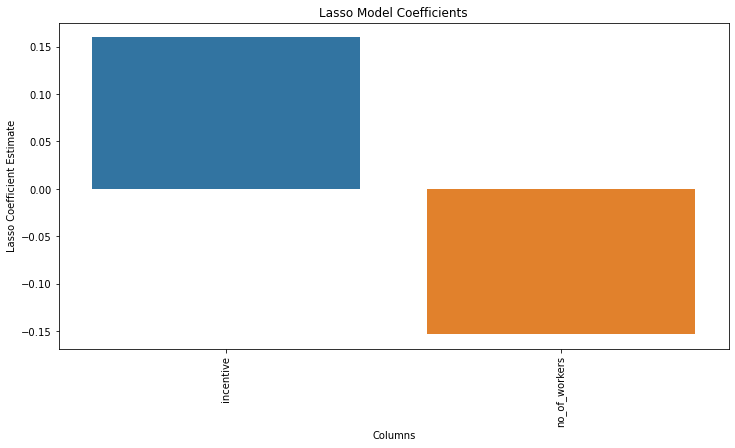

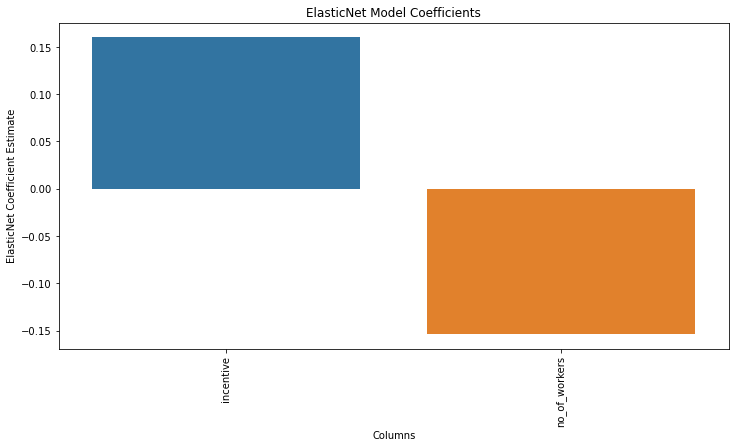

[13:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [98]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

In [99]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))


d4gmt.head()

Y = d4gmt['actual_productivity']
X = d4gmt.drop('actual_productivity', axis = 1)
X.shape

(1197, 20)

In [100]:
selector = SelectKBest(f_regression, k=10)
selector.fit_transform(X, Y)
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]
X.head()

department  team  targeted_productivity    smv  incentive  idle_time  \
0           1     8                   0.80  26.16         98        0.0   
1           0     1                   0.75   3.94          0        0.0   
2           1    11                   0.80  11.41         50        0.0   
3           1    12                   0.80  11.41         50        0.0   
4           1     6                   0.80  25.90         50        0.0   

   idle_men  no_of_style_change  Quarter3  Quarter5  
0       0.0                   0         0         0  
1       0.0                   0         0         0  
2       0.0                   0         0         0  
3       0.0                   0         0         0  
4       0.0                   0         0         0

In [101]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


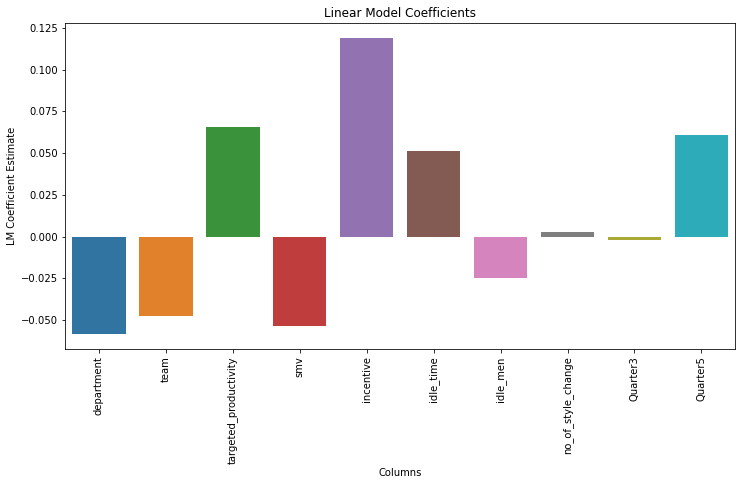

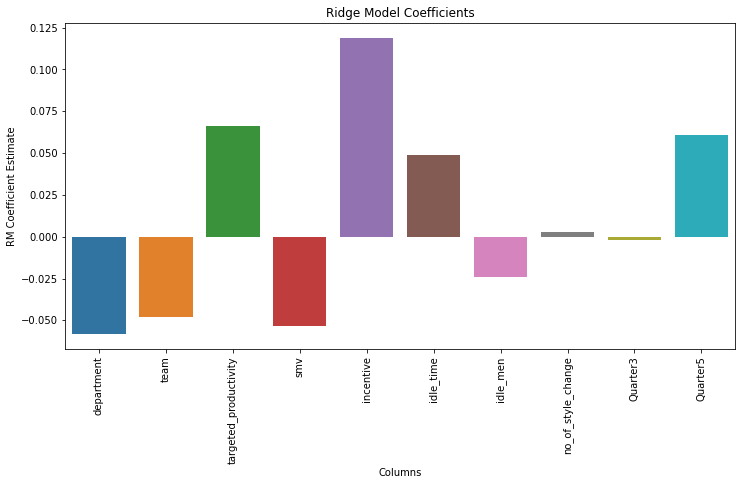

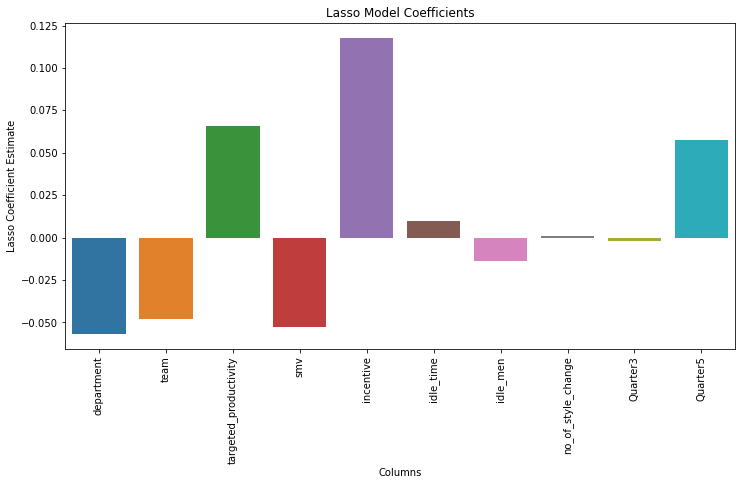

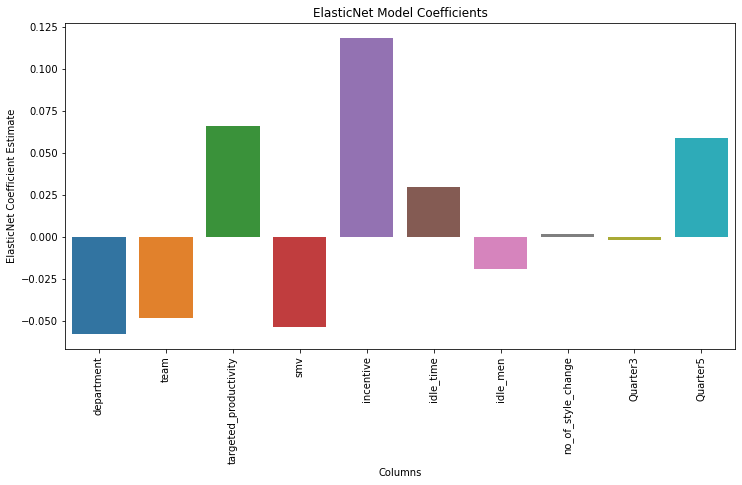

[13:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [102]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

In [103]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))


d4gmt.head()

Y = d4gmt['actual_productivity']
X = d4gmt.drop('actual_productivity', axis = 1)
X.shape

(1197, 20)

In [104]:
selector = SelectKBest(f_regression, k=5)
selector.fit_transform(X, Y)
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]
X.head()

targeted_productivity  incentive  idle_time  idle_men  no_of_style_change
0                   0.80         98        0.0       0.0                   0
1                   0.75          0        0.0       0.0                   0
2                   0.80         50        0.0       0.0                   0
3                   0.80         50        0.0       0.0                   0
4                   0.80         50        0.0       0.0                   0

In [105]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


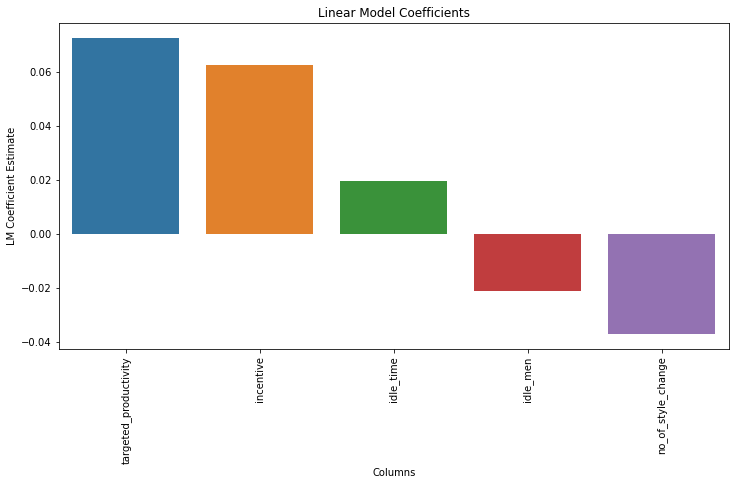

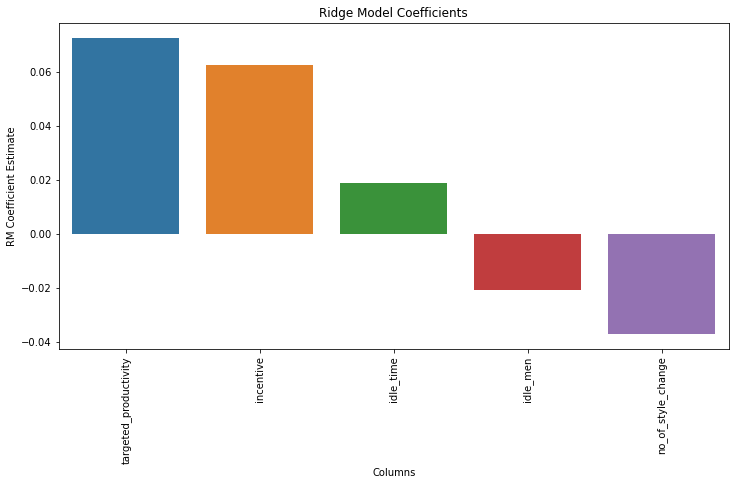

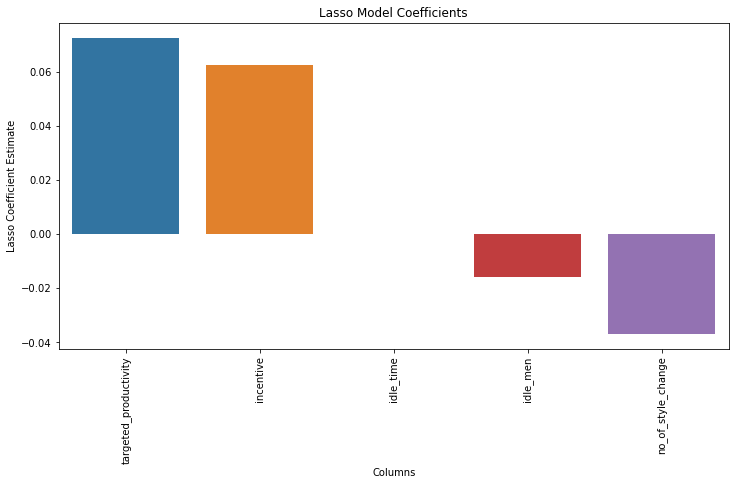

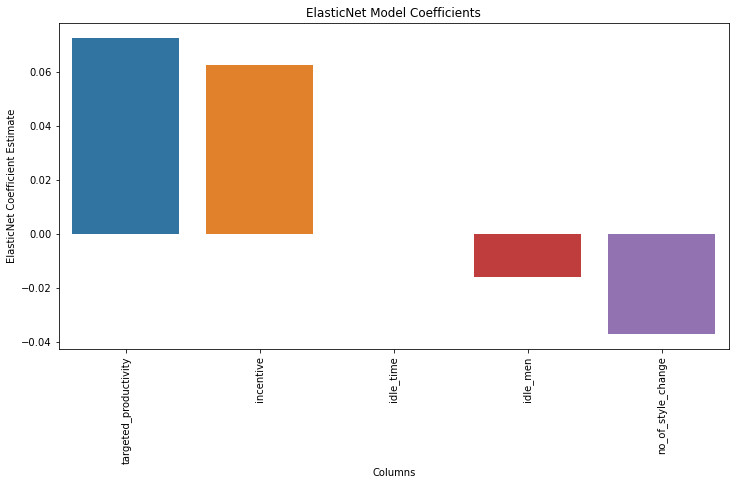

[13:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [106]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

In [107]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))


d4gmt.head()

Y = d4gmt['actual_productivity']
X = d4gmt.drop('actual_productivity', axis = 1)
X.shape

(1197, 20)

In [108]:
selector = SelectKBest(f_regression, k=3)
selector.fit_transform(X, Y)
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]
X.head()

targeted_productivity  incentive  no_of_style_change
0                   0.80         98                   0
1                   0.75          0                   0
2                   0.80         50                   0
3                   0.80         50                   0
4                   0.80         50                   0

In [109]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


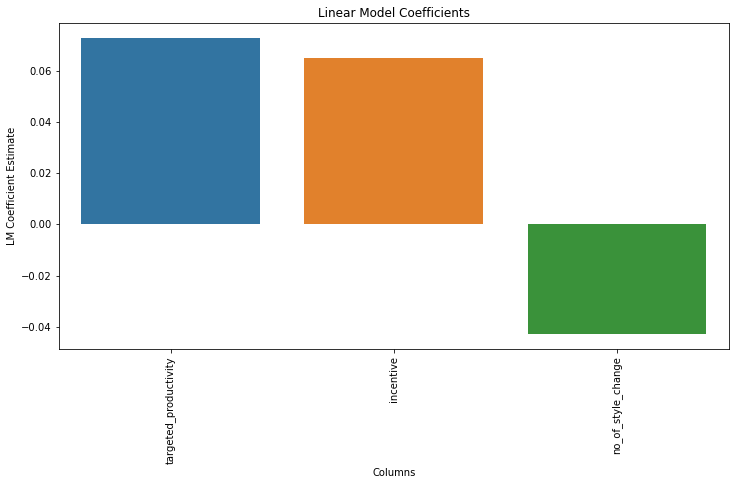

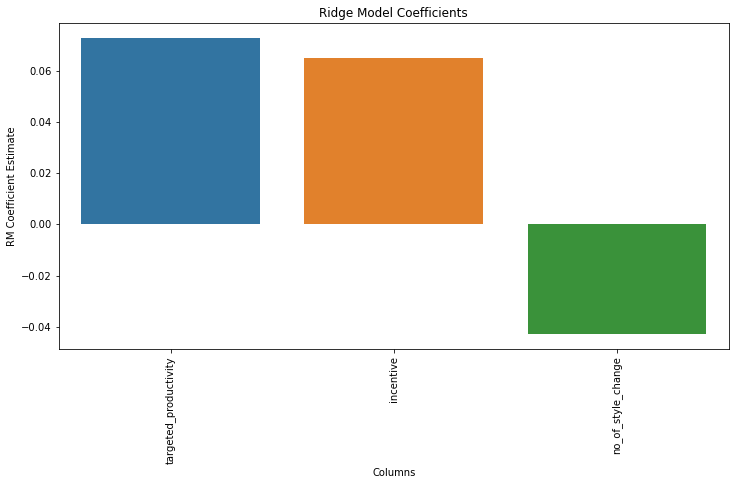

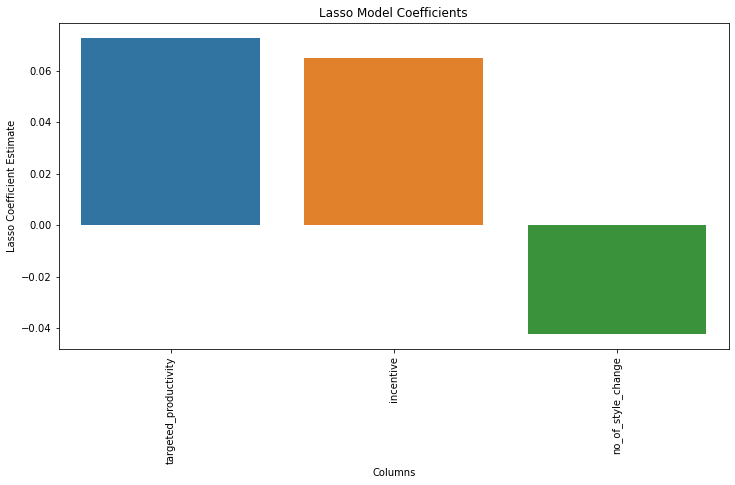

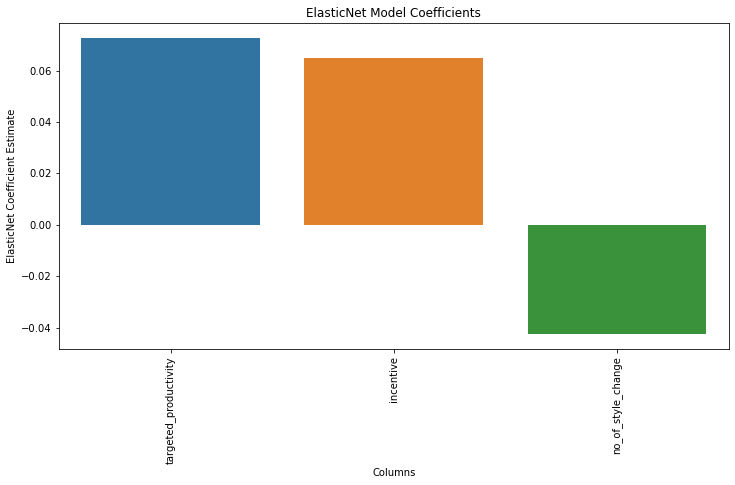

[13:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [110]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

In [111]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))

d4gmt.head()

Y = d4gmt['actual_productivity']
X = d4gmt.drop('actual_productivity', axis = 1)
X.shape

(1197, 20)

In [112]:
selector = SelectKBest(f_regression, k=8)
selector.fit_transform(X, Y)
cols = selector.get_support(indices=True)
X = X.iloc[:,cols]
X.head()

team  targeted_productivity    smv  incentive  idle_time  idle_men  \
0     8                   0.80  26.16         98        0.0       0.0   
1     1                   0.75   3.94          0        0.0       0.0   
2    11                   0.80  11.41         50        0.0       0.0   
3    12                   0.80  11.41         50        0.0       0.0   
4     6                   0.80  25.90         50        0.0       0.0   

   no_of_style_change  Quarter5  
0                   0         0  
1                   0         0  
2                   0         0  
3                   0         0  
4                   0         0

In [113]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


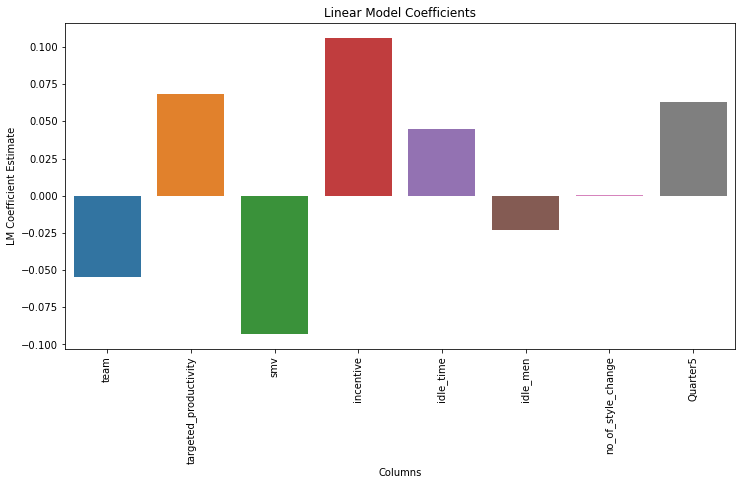

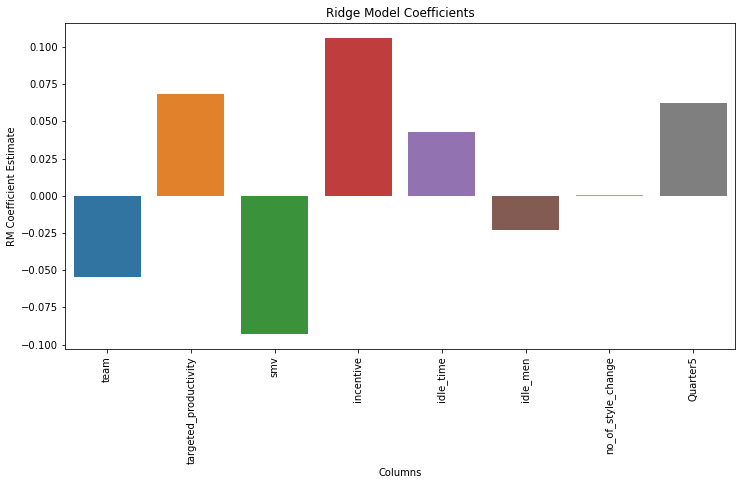

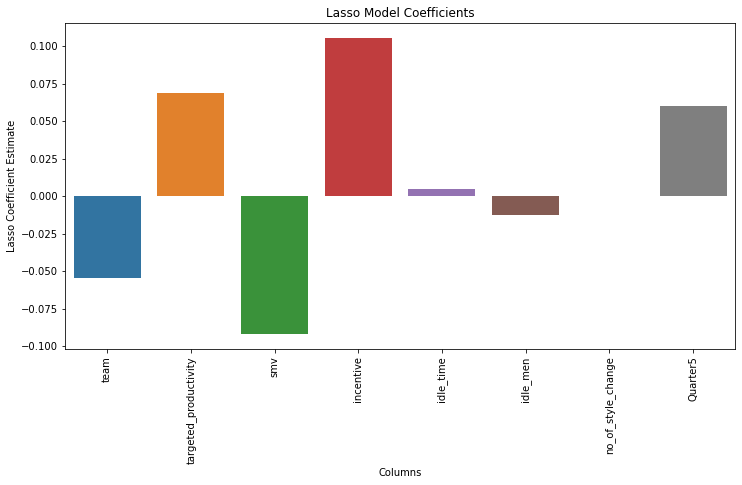

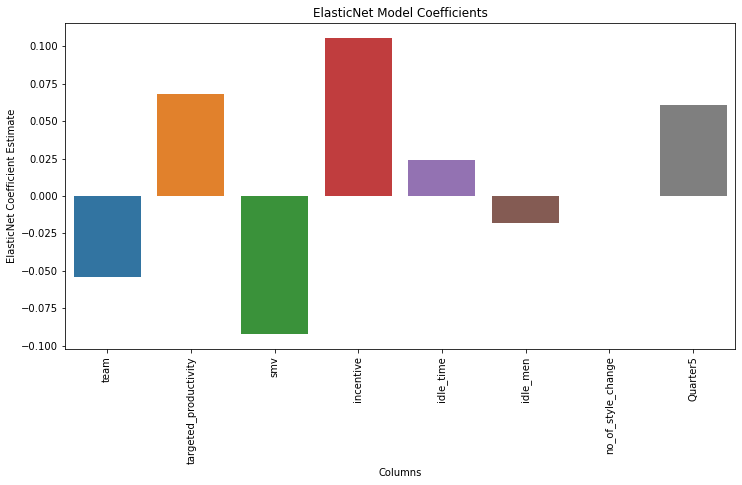

[13:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [114]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

In [115]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))


d4gmt.head()

Y = d4gmt['actual_productivity']
X = d4gmt.drop('actual_productivity', axis = 1)
X.shape

(1197, 20)

In [116]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


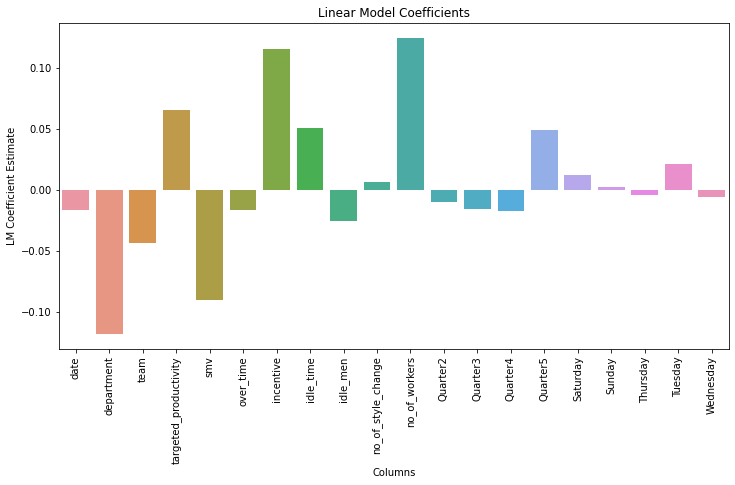

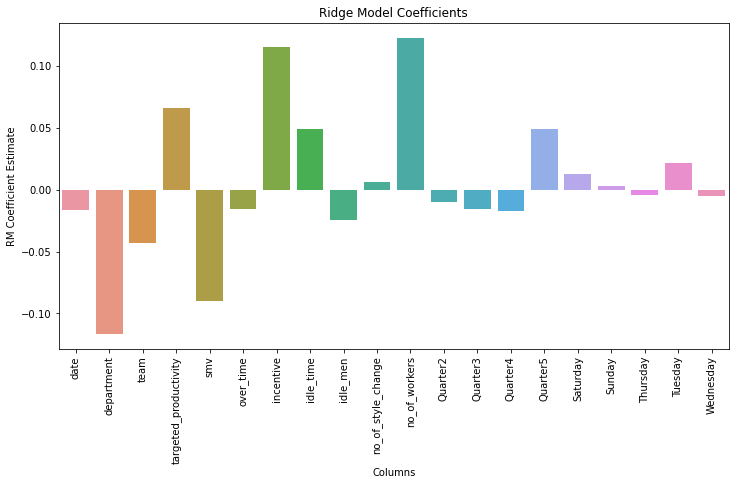

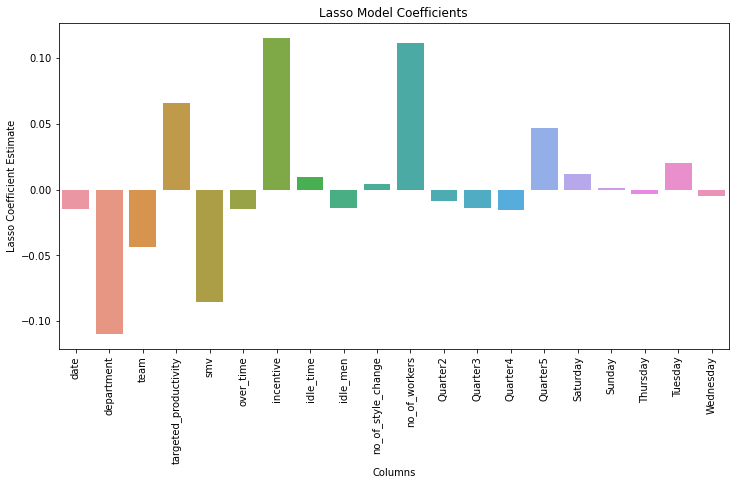

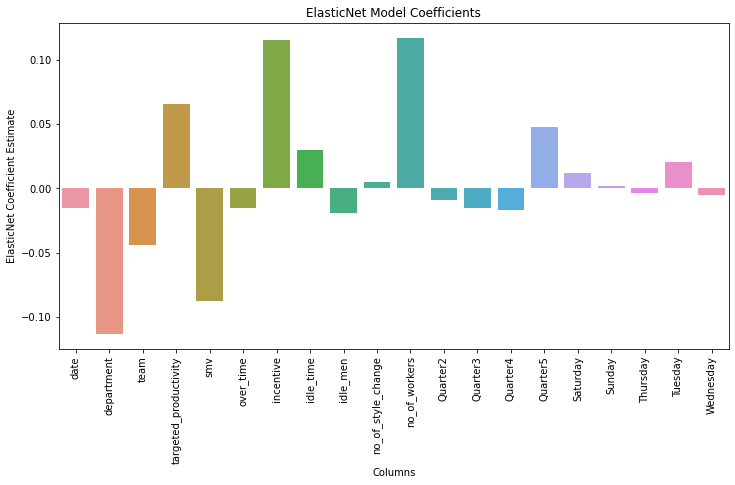

[13:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
                          Model  Orig Train R2  Original Test R2  \
0                        Linear       0.366638          0.376256   
1           Polynomial Degree 2       0.548481         -0.098885   
2           Polynomial Degree 3       0.914283         -0.098885   
3                         Ridge       0.366636          0.376006   
4                         Lasso       0.366312          0.374519   
5                    ElasticNet       0.366548          0.375329   
6                        Ransac       0.366638          0.376256   
7                           SVR       0.469693          0.451782   
8                 Decision Tree       0.597310          0.406336   
9                 Random Forest       0.660048          0.503384   
10            Gradient Boosting       0.782761          0.503881   
11     

In [117]:
coef_est = model_pipeline_func(X_Train, X_Test, Y_Train, Y_Test)

print(metrics_table)
print(coef_est)

#### The model seems to have performed best with All features present using the XGBoost Model with an R2 of 0.78 on training and 0.52 on testing. The Bias is low but Variance is high. 

#### The Support Vector Regression Model with All features present has an R2 of 0.47 on training and 0.45 on testing. 

##### Can continue trying to reduce the variance between train and test by using Stacking ensemble method.

In [118]:
d4gmt = pd.read_csv('garments_worker_productivity.csv')
d4gmt['department'] = np.where(d4gmt['department'] == 'sweing', 1, 0)
d4gmt = d4gmt.drop('wip', axis = 1)
cat_cols = d4gmt.columns[1:5]
cat_cols = cat_cols.drop(['team', 'department'])

def one_hot(dframe, cols):
    for col in cols:
        dummy = pd.get_dummies(d4gmt[col], drop_first = True)
        dframe = pd.concat([dframe, dummy], axis = 1)
        dframe = dframe.drop(col, axis = 1)
    return dframe

d4gmt = one_hot(d4gmt, cat_cols)

d4gmt['date'] = d4gmt['date'].astype('category').cat.codes

d4gmt = d4gmt.apply(lambda x : outlier_cap(x))
d4gmt['targeted_productivity'] = d4gmt['targeted_productivity'].clip(lower = d4gmt['targeted_productivity'].quantile(0.05))


d4gmt.head()

Y = d4gmt['actual_productivity']
X = d4gmt.drop('actual_productivity', axis = 1)
X.shape

(1197, 20)

In [119]:
X_scaled = standard_model(X)

In [120]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_scaled,Y,random_state = 20)
print(f'Event rate in Training set : {Y_Train.mean()}.')
print(f'Event rate in Test set : {Y_Test.mean()}.')


Event rate in Training set : 0.7349353562185068.
Event rate in Test set : 0.7338385437627999.


In [121]:
from sklearn.ensemble import StackingRegressor

In [122]:
stack_learner = [('XGB_d4gmt_final', xg.XGBRegressor(objective = 'reg:squarederror', **XGB_model_grid.best_params_)),
                 ('RF_d4gmt_final', RandomForestRegressor(**RF_model_grid.best_params_)),
                 ('SVR_d4gmt', SVR(**SVR_model_grid.best_params_))]
                      
sc_d4gmt = StackingRegressor(estimators = stack_learner, final_estimator = ElasticNet(alpha = 0.0001, max_iter = 10000), cv = 5)
sc_d4gmt.fit(X_Train, Y_Train)

StackingRegressor(cv=5,
                  estimators=[('XGB_d4gmt_final',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            mono...
                                            num_parallel_tree=None,
                            

In [123]:
print(sc_d4gmt.score(X_Test, Y_Test))
SC_train_R2 = sc_d4gmt.score(X_Train, Y_Train)
Y_Pred_SC = sc_d4gmt.predict(X_Test)
SC_R2 = r2_score(Y_Test, Y_Pred_SC)
print(SC_R2)
print(SC_train_R2)

0.5389577911327987
0.5389577911327987
0.741039019853183


#### The best result is an ensemble Stacked Regressor using -

- XGBoost as Step 1
- Random Forest Regressor as Step 2
- Support Vector Regressor as Step 3
- ElasticNet as Step 4

#### This gave the best overall result of R2 for Training at 0.7329 and Testing at 0.544

   date  department  team  targeted_productivity    smv  over_time  incentive  \
0     0           1     8                   0.80  26.16       7080         98   
1     0           0     1                   0.75   3.94        960          0   
2     0           1    11                   0.80  11.41       3660         50   
3     0           1    12                   0.80  11.41       3660         50   
4     0           1     6                   0.80  25.90       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  Quarter2  Quarter3  \
0        0.0       0.0                   0           59.0         0         0   
1        0.0       0.0                   0            8.0         0         0   
2        0.0       0.0                   0           30.5         0         0   
3        0.0       0.0                   0           30.5         0         0   
4        0.0       0.0                   0           56.0         0         0   

   Quarter4  Quarter5  Sat

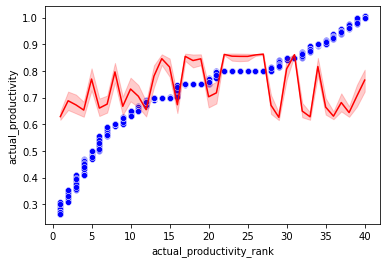

   error_percentage
0          0.082782
1          0.336074
2          0.077794
3          0.077794
4          0.078048


In [124]:
Y_Pred_SR = sc_d4gmt.predict(X)

data_eval=pd.concat([X,Y],axis=1,join="inner")
data_eval['actual_productivity_rank']=pd.qcut(data_eval['actual_productivity'].rank(method='first').values,40,duplicates='drop').codes+1

data_eval['Stack_mod_pred'] = pd.DataFrame(Y_Pred_SR, index = X.index)                                         
print(data_eval.head())


ax=sns.scatterplot(x="actual_productivity_rank",y="actual_productivity",data=data_eval,color='Blue')
ax=sns.lineplot(x="actual_productivity_rank",y='Stack_mod_pred',data=data_eval,color='Red')
plt.show()

data_eval['error']=data_eval['Stack_mod_pred']-data_eval['actual_productivity']
data_eval['error_percentage']=(data_eval['error']/data_eval['actual_productivity']).abs()
error_df=data_eval[['error_percentage']]

print(error_df.head())

bins=KBinsDiscretizer(n_bins=40,encode='ordinal',strategy='kmeans')
error_df_bin=pd.DataFrame(bins.fit_transform(error_df),index=error_df.index,columns=error_df.columns).add_suffix('_bin')
error_df=pd.concat([error_df,error_df_bin],axis=1,join="inner")



In [125]:
error_df

error_percentage  error_percentage_bin
0             0.082782                   5.0
1             0.336074                  13.0
2             0.077794                   4.0
3             0.077794                   4.0
4             0.078048                   4.0
...                ...                   ...
1192          0.049602                   3.0
1193          0.045488                   2.0
1194          0.045488                   2.0
1195          0.180430                   7.0
1196          0.512878                  18.0

[1197 rows x 2 columns]

In [126]:
model_eval=error_df.groupby('error_percentage_bin')['error_percentage'].agg(['min','max','mean','count'])
model_eval['cum_count']=model_eval['count'].cumsum()
model_eval['cum_count_prop']=model_eval['cum_count']/max(model_eval['cum_count'])

model_eval

min       max      mean  count  cum_count  \
error_percentage_bin                                                   
0.0                   0.000529  0.014246  0.008475     40         40   
1.0                   0.016642  0.027817  0.020866     42         82   
2.0                   0.030285  0.045946  0.036856     51        133   
3.0                   0.046690  0.063390  0.055813     56        189   
4.0                   0.065658  0.080454  0.074042     51        240   
5.0                   0.081011  0.113766  0.087194    177        417   
6.0                   0.117203  0.167405  0.144084    174        591   
7.0                   0.170283  0.213064  0.195458     70        661   
8.0                   0.216457  0.245661  0.233637     93        754   
9.0                   0.246848  0.268714  0.259020     40        794   
10.0                  0.269862  0.287993  0.278989     34        828   
11.0                  0.289399  0.305663  0.298001     34        862   
12.0                  0.308003  0.323511  0.316216     38        900   
13.0                  0.325113  0.339261  0.332968     40        940   
14.0                  0.340882  0.355392  0.348642     46        986   
15.0                  0.356988  0.378306  0.365386     37       1023   
16.0                  0.378694  0.409903  0.393904     25       1048   
17.0                  0.426139  0.455790  0.441675     21       1069   
18.0                  0.477416  0.515648  0.498463      8       1077   
19.0                  0.529077  0.544777  0.536597      9       1086   
20.0                  0.551583  0.560373  0.555978      2       1088   
21.0                  0.574822  0.583886  0.577437      4       1092   
22.0                  0.598355  0.626536  0.612784      5       1097   
23.0                  0.655048  0.695487  0.682148      8       1105   
24.0                  0.708564  0.748904  0.730725     18       1123   
25.0                  0.763407  0.809007  0.792593     13       1136   
26.0                  0.824913  0.840103  0.833218      5       1141   
27.0                  0.892820  0.917618  0.903660      3       1144   
28.0                  0.923932  0.965507  0.940395      8       1152   
29.0                  0.985476  1.009600  0.997538      2       1154   
30.0                  1.047413  1.071605  1.061357      3       1157   
31.0                  1.119490  1.134147  1.128543      4       1161   
32.0                  1.170155  1.207563  1.189052      5       1166   
33.0                  1.245173  1.265486  1.255149      5       1171   
34.0                  1.280053  1.317166  1.300948      5       1176   
35.0                  1.345108  1.369218  1.354319      6       1182   
36.0                  1.389970  1.435885  1.413509      8       1190   
37.0                  1.474991  1.480776  1.477262      5       1195   
38.0                  1.712427  1.712427  1.712427      1       1196   
39.0                  2.298521  2.298521  2.298521      1       1197   

                      cum_count_prop  
error_percentage_bin                  
0.0                         0.033417  
1.0                         0.068505  
2.0                         0.111111  
3.0                         0.157895  
4.0                         0.200501  
5.0                         0.348371  
6.0                         0.493734  
7.0                         0.552214  
8.0                         0.629908  
9.0                         0.663325  
10.0                        0.691729  
11.0                        0.720134  
12.0                        0.751880  
13.0                        0.785297  
14.0                        0.823726  
15.0                        0.854637  
16.0                        0.875522  
17.0                        0.893066  
18.0                        0.899749  
19.0                        0.907268  
20.0                        0.908939  
21.0                        0.912281  
22.0                        0.916458  
23.0                       

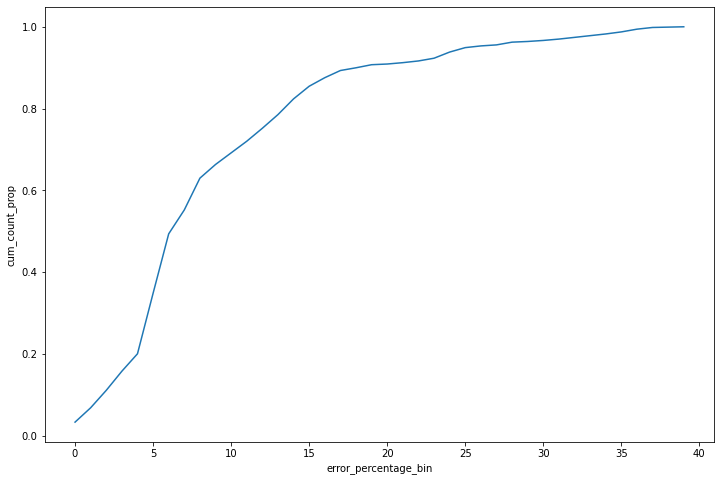

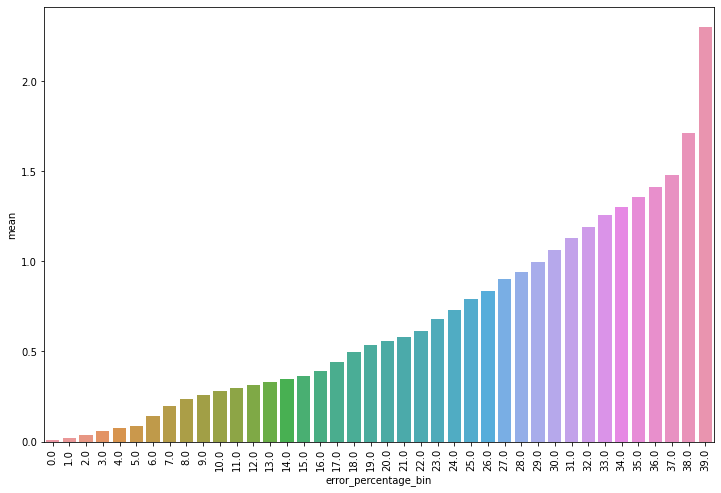

In [127]:
plt.figure(figsize = (12,8))
ax=sns.lineplot(x=model_eval.index,y='cum_count_prop',data=model_eval)
plt.show()

plt.figure(figsize = (12,8))
ax=sns.barplot(x=model_eval.index,y='mean',data=model_eval)
plt.xticks(rotation = 90)
plt.show()

#### However, as can be seen from the error percentage bins table - comparing tables for Stacking Regressor and for Random Forest and XG Boost - XGBoost should be the winning model. 

#### - Though the R2 train and test scores of the Stacking Regressor are the best - from the table we can see that at only 35% of the data is predicted to within about 8.7% error or 49.37% of the data if error threshold is increased to 14.4%.

#### - On the other hand, the XGBoost model captures 70% of the data if the error threshold is 8.18%, 74.5% of the data if the threshold is 10.09% and 82.96% if the threshold is 15.33%. The XGBoost seems to be a much more accurate model, while performing SLIGHTLY lower in the R2 train and test scores. Its clear superiority in giving closer predictions for most of the data gives it the edge. 

## Conclusion:

## Model to be used is XGBoost with all the features present